# Importación datos

In [1]:
import pandas as pd
import os
import numpy as np
import time
from unidecode import unidecode
# Especificar la ruta del archivo CSV y leer el archivo CSV
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', '2024_Accidentalidad_traficos_madrid.csv')
df24 = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', '2023_Accidentalidad.csv')
df23 = pd.read_csv(file_path, sep=';', encoding='utf-8')
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', '2022_Accidentalidad.csv')
df22 = pd.read_csv(file_path, sep=';', encoding='utf-8')
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', '2021_Accidentalidad.csv')
df21 = pd.read_csv(file_path, sep=';', encoding='utf-8')
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', '2020_Accidentalidad.csv')
df20 = pd.read_csv(file_path, sep=';', encoding='utf-8')
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', '2019_Accidentalidad.csv')
df19 = pd.read_csv(file_path, sep=';', encoding='utf-8')


# Mostrar las primeras filas del DataFrame
print(df19.head(5))

  num_expediente       fecha     hora  \
0    2018S017842  04/02/2019  9:10:00   
1    2018S017842  04/02/2019  9:10:00   
2    2019S000001  01/01/2019  3:45:00   
3    2019S000001  01/01/2019  3:45:00   
4    2019S000001  01/01/2019  3:45:00   

                                        localizacion numero  cod_distrito  \
0                          CALL. ALBERTO AGUILERA, 1      1             1   
1                          CALL. ALBERTO AGUILERA, 1      1             1   
2  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168            11   
3  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168            11   
4  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168            11   

      distrito    tipo_accidente estado_meteorológico        tipo_vehiculo  \
0       CENTRO  Colisión lateral            Despejado  Motocicleta > 125cc   
1       CENTRO  Colisión lateral            Despejado              Turismo   
2  CARABANCHEL           Alcance                  NaN   

Antes de nada, debemos evitar que existan nulos en las columnas de las coordenadas de cada dataframe

In [2]:
dfs = [df19, df20, df21, df22, df23, df24]


for i in range(len(dfs)):
    print(f'Nulos coordenadas {2019+i} : {dfs[i]['coordenada_x_utm'].isna().sum() + dfs[i]['coordenada_x_utm'].isnull().sum()}')


Nulos coordenadas 2019 : 0
Nulos coordenadas 2020 : 4
Nulos coordenadas 2021 : 0
Nulos coordenadas 2022 : 0
Nulos coordenadas 2023 : 12
Nulos coordenadas 2024 : 2


In [3]:
for i in range(len(dfs)):
    dfs[i].dropna(subset=['coordenada_y_utm'], inplace=True)
    print(f'Nulos coordenadas {2019+i} : {dfs[i]['coordenada_x_utm'].isna().sum() + dfs[i]['coordenada_x_utm'].isnull().sum()}')

Nulos coordenadas 2019 : 0
Nulos coordenadas 2020 : 0
Nulos coordenadas 2021 : 0
Nulos coordenadas 2022 : 0
Nulos coordenadas 2023 : 0
Nulos coordenadas 2024 : 0


Vamos a ver el formato de las coordenadas:

In [4]:
for i in range(len(dfs)):
    print(f'Coordenada año  {2019+i} {dfs[i]['coordenada_x_utm'].head(1)[0]}')

Coordenada año  2019 440068,049
Coordenada año  2020 444578,153
Coordenada año  2021 444976,463
Coordenada año  2022 443359,226
Coordenada año  2023 443397.166
Coordenada año  2024 444913,056


Para pasarlas a numéricas, se debe cambiar la coma por punto.

In [5]:
for i in range(len(dfs)):
    try:
        dfs[i]['coordenada_x_utm'] = dfs[i]['coordenada_x_utm'].str.replace(',', '.')
        dfs[i]['coordenada_y_utm'] = dfs[i]['coordenada_y_utm'].str.replace(',', '.')
        dfs[i]['coordenada_x_utm'] = pd.to_numeric(dfs[i]['coordenada_x_utm'], errors='coerce')
        dfs[i]['coordenada_y_utm'] = pd.to_numeric(dfs[i]['coordenada_y_utm'], errors='coerce')
    except AttributeError as e:
        print(f'Ya hecho para el año {2019+i}')

Ya hecho para el año 2023


Vamos a transformar ahora las coordenadas a longitud y latitud

In [6]:
import pandas as pd
import folium
import utm
from pyproj import Proj
p1 = Proj(proj='utm', zone=30, ellps='WGS84')
def transcoord(df):
  lons, lats = [], []
  for i in range(len(df)):
    lon, lat = p1(df.iloc[i]['coordenada_x_utm'], df.iloc[i]['coordenada_y_utm'], inverse=True)
    lons.append(lon)
    lats.append(lat)
  return lons, lats


In [7]:
for i in range(len(dfs)):
    lons, lats = transcoord(dfs[i])
    dfs[i]['longitud'] = lons
    dfs[i]['latitud'] = lats
print(df20['longitud'].head(3))

0   -3.653342
1   -3.653342
2   -3.614375
Name: longitud, dtype: float64


Por no eliminar indices se me crean coordenadas extras, que procedemos a eliminar:

In [8]:
for i in range(len(dfs)):
    dfs[i].dropna(subset=['coordenada_y_utm'], inplace=True)
    print(f'Nulos coordenadas {2019+i} : {dfs[i]['coordenada_x_utm'].isna().sum() + dfs[i]['coordenada_x_utm'].isnull().sum()}')

Nulos coordenadas 2019 : 0
Nulos coordenadas 2020 : 0
Nulos coordenadas 2021 : 0
Nulos coordenadas 2022 : 0
Nulos coordenadas 2023 : 0
Nulos coordenadas 2024 : 0


Ahora podemos descargar los datos de la ciudad de madrid con la libreria osmnx:

In [9]:
import osmnx as ox
import geopandas as gpd
# Descargar la red de calles de Madrid
G = ox.graph_from_place('Madrid, Spain', network_type='drive')
G_proj = ox.project_graph(G)
# Convertir a un GeoDataFrame para trabajar con datos tabulares
gdf = ox.graph_to_gdfs(G, nodes=False)
#ox.plot_graph(G)

In [10]:
gdf.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'reversed',
       'length', 'geometry', 'junction', 'bridge', 'width', 'access', 'ref',
       'tunnel', 'est_width'],
      dtype='object')

# Extracción características carretera

In [11]:
from types import NoneType
import osmnx as ox
import networkx as nx
from shapely.geometry import Point
import geopy.distance
def carretera_caract(df, G_proj):
  dfapoyo = pd.DataFrame()
  u_v_k_list = []
  distance_list = []
  edge_data_list = []
  # Extraer los nodos de la arista más cercana
  listaedges = ox.nearest_edges(G_proj, X=list(df['coordenada_x_utm']), Y=list(df['coordenada_y_utm']), return_dist=True)
  listanodes = ox.nearest_nodes(G_proj, X=list(df['coordenada_x_utm']), Y=list(df['coordenada_y_utm']), return_dist=True)
  for i, (u, v, k) in enumerate(listaedges[0]):
    # Obtener edge_data del grafo G
    edge_data = G[u][v][k]

    # Almacenar (u, v, k)
    u_v_k_list.append((u, v, k))

    # Almacenar la distancia correspondiente de listaedges[1]
    distance_list.append(listaedges[1][i])

    # Agregar los datos de la arista al edge_data_list
    edge_data_list.append(edge_data)

  # Crear el DataFrame
  dfapoyo = pd.DataFrame(edge_data_list)

  # Añadir la columna con las tuplas (u, v, k)
  dfapoyo['u_v_k'] = u_v_k_list

  # Añadir la columna con las distancias
  dfapoyo['edgedistance'] = distance_list
  dfapoyo['nodedistance'] = list(listanodes[1])

  return dfapoyo

In [12]:
for i in range(len(dfs)):
    %time df_caracteristicas = carretera_caract(dfs[i], G_proj)
    dfs[i] = pd.concat([dfs[i], df_caracteristicas], axis=1)

CPU times: total: 4.64 s
Wall time: 5.57 s
CPU times: total: 3.62 s
Wall time: 4.81 s
CPU times: total: 3.86 s
Wall time: 4.75 s
CPU times: total: 4.41 s
Wall time: 5.51 s
CPU times: total: 4.75 s
Wall time: 5.38 s
CPU times: total: 3.42 s
Wall time: 3.82 s


In [13]:
for i in range(len(dfs)):
    print(f'Columnas para el año {2019+i}: {dfs[i].columns}')

Columnas para el año 2019: Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'longitud', 'latitud', 'osmid', 'oneway', 'lanes',
       'name', 'highway', 'maxspeed', 'reversed', 'length', 'geometry',
       'junction', 'ref', 'tunnel', 'access', 'bridge', 'width', 'est_width',
       'u_v_k', 'edgedistance', 'nodedistance'],
      dtype='object')
Columnas para el año 2020: Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'longitud', 'lat

Nos encontramos dos columnas raras para el año 2022, ambas nulas, así que las eliminamos.

In [14]:
dfs[3].drop(columns=['Unnamed: 19', 'Unnamed: 20'], inplace = True)

Pasamos ahora la fecha en formato fecha, y conseguimos el dia, mes y año

In [15]:
for i in range(len(dfs)):
    dfs[i]['fecha'] = pd.to_datetime(dfs[i]['fecha'], dayfirst=True)
    dfs[i]['dia'] = dfs[i]['fecha'].dt.day
    dfs[i]['mes'] = dfs[i]['fecha'].dt.month
    dfs[i]['año'] = dfs[i]['fecha'].dt.year

Unimos todos los dataframes:

In [16]:
df_unido = pd.concat(dfs, ignore_index=True)

In [17]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246780 entries, 0 to 246779
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        246743 non-null  object        
 1   fecha                 246743 non-null  datetime64[ns]
 2   hora                  246743 non-null  object        
 3   localizacion          246743 non-null  object        
 4   numero                246735 non-null  object        
 5   cod_distrito          246735 non-null  float64       
 6   distrito              246735 non-null  object        
 7   tipo_accidente        246740 non-null  object        
 8   estado_meteorológico  220034 non-null  object        
 9   tipo_vehiculo         245608 non-null  object        
 10  tipo_persona          246740 non-null  object        
 11  rango_edad            246743 non-null  object        
 12  sexo                  246743 non-null  object        
 13 

Vamos a tratar ahora con las columas de geometry nulas. Esto debe ser un problema de accesibilidad a ellas con las función ox.nearest_nodes(). Por tanto, usaré los índices (u,v,k) únicos para cada arista para acceder a ellos mediante el datafram gdf.

No nos interesa aquellos accidentes sin índices (u,v,k): dropeamos 37 filas.

In [18]:
df_unido.dropna(subset=['u_v_k'], inplace = True)

In [19]:
df_unido['u_v_k'].isna().sum()

0

In [20]:
for index, row in df_unido.iterrows():
    if (pd.isna(row['geometry']) or pd.isnull(row['geometry'])):
        u, v, k = row['u_v_k']
        df_unido.at[index, 'geometry'] = gdf.at[(u, v, k), 'geometry']


In [21]:
df_unido['geometry'].isna().sum()

0

Como se ve, eliminamos todos los valores nulos en la geometría.

In [22]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246743 entries, 0 to 246779
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        246706 non-null  object        
 1   fecha                 246706 non-null  datetime64[ns]
 2   hora                  246706 non-null  object        
 3   localizacion          246706 non-null  object        
 4   numero                246698 non-null  object        
 5   cod_distrito          246698 non-null  float64       
 6   distrito              246698 non-null  object        
 7   tipo_accidente        246703 non-null  object        
 8   estado_meteorológico  220010 non-null  object        
 9   tipo_vehiculo         245571 non-null  object        
 10  tipo_persona          246703 non-null  object        
 11  rango_edad            246706 non-null  object        
 12  sexo                  246706 non-null  object        
 13  cod_

Vamos a hacer una previsualización, coloreando aquellos tramos con más accidentes

In [23]:
gdf_edges = ox.graph_to_gdfs(G,nodes=False,fill_edge_geometry=True)
dfplot = df_unido.groupby('u_v_k').count()['num_expediente']

In [24]:
import time
import numpy as np

# Crear un conjunto de índices de aristas
edges_set = set(df_unido.groupby('u_v_k').count().index)

# Crear un array de colores inicializado con ceros
colores = ['#000000'] * len(gdf_edges)
valores = np.zeros(len(gdf_edges))
# Calcular el colormap y la normalización una vez fuera del bucle
colormap = cm.get_cmap('Reds')
norm = colors.LogNorm(vmin=dfplot.min(), vmax=dfplot.max())

# Iterar sobre los índices de aristas y asignar colores
start_time = time.time()
for i, indix in enumerate(gdf_edges.index):
    if indix in edges_set:
        colores[i] = colors.to_hex(colormap(norm(dfplot[dfplot.index == indix].iloc[0])))
        valores[i] = dfplot[dfplot.index == indix].iloc[0]

elapsed_time = time.time() - start_time

print(colores)
print(f"Tiempo de ejecución: {elapsed_time} segundos")

NameError: name 'cm' is not defined

In [ ]:
len(list(dfplot))

29248

In [ ]:
gdf_edges['edge_color'] = colores
gdf_edges['Naccidentes'] = valores

import osmnx as ox
import folium

# Asumiendo que ya tienes tu gdf_edges con las columnas 'edge_color' y 'Naccidentes'

# Define el mapa centrado en la ubicación de interés
centro = [gdf_edges.unary_union.centroid.y, gdf_edges.unary_union.centroid.x]
mymap = folium.Map(location=centro, zoom_start=12)

# Itera por cada arista en gdf_edges
for idx, row in gdf_edges.iterrows():
    # Extrae las coordenadas de la geometría (línea)
    coords = [(point[1], point[0]) for point in row['geometry'].coords]

    # Color de la arista
    color = row['edge_color']

    # Valor para mostrar en el popup
    popup_text = f"Accidentes: {row['Naccidentes']}"

    # Añade la arista al mapa con el color y popup
    folium.PolyLine(
        locations=coords,
        color=color,
        weight=3,
        opacity=0.8,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(mymap)

# Muestra el mapa
#mymap.save("mapa_interactivo.html")
mymap

# Exploración datos y preprocesamiento:

## Detección de tipos de datos

In [28]:
df_respaldo=df_unido

In [29]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246743 entries, 0 to 246779
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        246706 non-null  object        
 1   fecha                 246706 non-null  datetime64[ns]
 2   hora                  246706 non-null  object        
 3   localizacion          246706 non-null  object        
 4   numero                246698 non-null  object        
 5   cod_distrito          246698 non-null  float64       
 6   distrito              246698 non-null  object        
 7   tipo_accidente        246703 non-null  object        
 8   estado_meteorológico  220010 non-null  object        
 9   tipo_vehiculo         245571 non-null  object        
 10  tipo_persona          246703 non-null  object        
 11  rango_edad            246706 non-null  object        
 12  sexo                  246706 non-null  object        
 13  cod_

Vamos mirando columna a columna el tipo de variable que nos interesa cambiar. Primero, vamos a cambiar la hora a formato tiempo:

In [30]:
print(df_unido['hora'].iloc[0])
print(type(df_unido['hora'].iloc[0]))
df_unido['hora'] = pd.to_datetime(df_unido['hora'], format='%H:%M:%S').dt.time
print(df_unido['hora'].iloc[0])
print(type(df_unido['hora'].iloc[0]))

9:10:00
<class 'str'>
09:10:00
<class 'datetime.time'>


Por el momento no quedan más columnas que cambiar de tipo. Pero existen numerosas columnas con datos nulos (hay 246743 columnas y 246706 no nulas) que conviene eliminar.

In [31]:
df_unido.dropna(subset=['num_expediente'], inplace=True)

In [32]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246706 entries, 0 to 246777
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        246706 non-null  object        
 1   fecha                 246706 non-null  datetime64[ns]
 2   hora                  246706 non-null  object        
 3   localizacion          246706 non-null  object        
 4   numero                246698 non-null  object        
 5   cod_distrito          246698 non-null  float64       
 6   distrito              246698 non-null  object        
 7   tipo_accidente        246703 non-null  object        
 8   estado_meteorológico  220010 non-null  object        
 9   tipo_vehiculo         245571 non-null  object        
 10  tipo_persona          246703 non-null  object        
 11  rango_edad            246706 non-null  object        
 12  sexo                  246706 non-null  object        
 13  cod_

## Tratamiento de valores duplicados

In [25]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246743 entries, 0 to 246779
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        246706 non-null  object        
 1   fecha                 246706 non-null  datetime64[ns]
 2   hora                  246706 non-null  object        
 3   localizacion          246706 non-null  object        
 4   numero                246698 non-null  object        
 5   cod_distrito          246698 non-null  float64       
 6   distrito              246698 non-null  object        
 7   tipo_accidente        246703 non-null  object        
 8   estado_meteorológico  220010 non-null  object        
 9   tipo_vehiculo         245571 non-null  object        
 10  tipo_persona          246703 non-null  object        
 11  rango_edad            246706 non-null  object        
 12  sexo                  246706 non-null  object        
 13  cod_

In [35]:
import pandas as pd

# Paso 1: Identificar columnas con listas
columnas_lista = [col for col in df_unido.columns if df_unido[col].apply(lambda x: isinstance(x, list)).any()]

# Paso 2: Seleccionar columnas relevantes excluyendo las que contienen listas
columnas_relevantes = [col for col in df_unido.columns if col not in columnas_lista]

# Paso 3: Identificar filas duplicadas en las columnas relevantes
filas_duplicadas = df_unido[df_unido[columnas_relevantes].duplicated(keep=False)]

# Paso 4: Filtrar filas sin valores nulos ni 'Desconocidos' en las columnas especificadas
columnas_a_verificar = ['rango_edad', 'sexo', 'cod_lesividad']
filas_filtradas = filas_duplicadas.dropna(subset=columnas_a_verificar)
for col in columnas_a_verificar:
    filas_filtradas = filas_filtradas[filas_filtradas[col] != 'Desconocido']

# Contar el número de filas duplicadas filtradas
numero_filas_duplicadas = len(filas_filtradas)

# Mostrar el número de filas duplicadas filtradas
print(f"Número de filas duplicadas sin valores nulos ni 'Desconocidos': {numero_filas_duplicadas}")

# Mostrar las primeras 5 filas duplicadas filtradas
print("Primeras 5 filas duplicadas filtradas:")
pd.set_option("display.max_columns", None)
print(filas_filtradas.head(5))



Número de filas duplicadas sin valores nulos ni 'Desconocidos': 3061
Primeras 5 filas duplicadas filtradas:
   num_expediente      fecha      hora  \
22    2019S000007 2019-01-01   8:05:00   
23    2019S000007 2019-01-01   8:05:00   
26    2019S000007 2019-01-01   8:05:00   
27    2019S000007 2019-01-01   8:05:00   
59    2019S000028 2019-01-01  19:15:00   

                                         localizacion numero  cod_distrito  \
22  CALL. ARROYO FONTARRON / CALL. HACIENDA DE PAV...      1          14.0   
23  CALL. ARROYO FONTARRON / CALL. HACIENDA DE PAV...      1          14.0   
26  CALL. ARROYO FONTARRON / CALL. HACIENDA DE PAV...      1          14.0   
27  CALL. ARROYO FONTARRON / CALL. HACIENDA DE PAV...      1          14.0   
59                        PASEO RECOLETOS-PLAZA COLON     22           4.0   

     distrito           tipo_accidente estado_meteorológico tipo_vehiculo  \
22  MORATALAZ  Colisión fronto-lateral            Despejado       Autobús   
23  MORATALAZ  C

No podemos asegurar que realmente sean datos repetidos, o que les haya ocurrido el mismo accidente a personas similares.

## Previsualización de los datos

In [30]:
df_unido['rango_edad'].value_counts()

rango_edad
Desconocido        27090
De 40 a 44 años    25478
De 25 a 29 años    25454
De 30 a 34 años    25234
De 35 a 39 años    24260
De 45 a 49 años    24066
De 50 a 54 años    20831
De 55 a 59 años    16676
De 21 a 24 años    16578
De 60 a 64 años    10879
De 18 a 20 años     7703
Más de 74 años      5386
De 65 a 69 años     5251
De 70 a 74 años     3514
Menor de 5 años     2431
De 10 a 14 años     2330
De 15 a 17 años     1944
De 6 a 9 años       1601
Name: count, dtype: int64

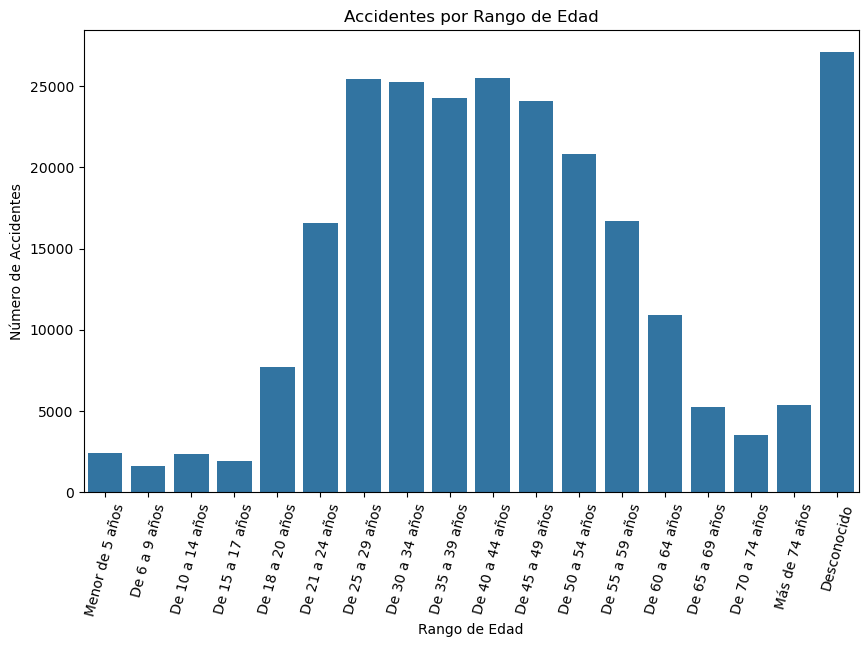

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer el primer número de cada rango de edad
df_unido['edad_numerica'] = df_unido['rango_edad'].str.extract(r'De (\d+)').astype(float)

# Reemplazar valores específicos para edades extremas
df_unido.loc[df_unido['rango_edad'] == 'Menor de 5 años', 'edad_numerica'] = 2
df_unido.loc[df_unido['rango_edad'] == 'Más de 74 años', 'edad_numerica'] = 100

# Ordenar el DataFrame por 'edad_numerica'
df_unido = df_unido.sort_values('edad_numerica')

# Agrupar los datos por rango de edad y contar la frecuencia
age_counts = df_unido.groupby('rango_edad').size().reset_index(name='counts')

# Ordenar 'rango_edad' según 'edad_numerica'
age_counts = age_counts.merge(df_unido[['rango_edad', 'edad_numerica']].drop_duplicates(), on='rango_edad')
age_counts = age_counts.sort_values('edad_numerica')

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras con Seaborn
sns.barplot(x='rango_edad', y='counts', data=age_counts, ax=ax)

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Rango de Edad')
ax.set_ylabel('Número de Accidentes')
ax.set_title('Accidentes por Rango de Edad')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=75)
df_unido.drop(columns=['edad_numerica'])
# Mostrar el gráfico
plt.show()


In [32]:
df_unido = df_unido.sort_index()

In [33]:
# Convertir la columna 'fecha' y 'hora' a formato datetime
df_unido['fecha_hora'] = ''
for index, row in df_unido.iterrows():
    df_unido['fecha_hora'].at[index] = str(df_unido['fecha'].at[index]).split(' ')[0] + ' ' + str(df_unido['hora'].at[index])
df_unido['fecha_hora']

0         2019-02-04 09:10:00
1         2019-02-04 09:10:00
2         2019-01-01 03:45:00
3         2019-01-01 03:45:00
4         2019-01-01 03:45:00
                 ...         
246773    2024-06-01 03:28:00
246774    2024-05-17 15:15:00
246775    2024-05-17 15:15:00
246776    2024-06-03 13:10:00
246777    2024-06-03 13:10:00
Name: fecha_hora, Length: 246706, dtype: object

In [34]:
df_unido['fecha_hora'] = pd.to_datetime(df_unido['fecha_hora'], format='%Y-%m-%d %H:%M:%S')
df_unido['fecha_hora']

0        2019-02-04 09:10:00
1        2019-02-04 09:10:00
2        2019-01-01 03:45:00
3        2019-01-01 03:45:00
4        2019-01-01 03:45:00
                 ...        
246773   2024-06-01 03:28:00
246774   2024-05-17 15:15:00
246775   2024-05-17 15:15:00
246776   2024-06-03 13:10:00
246777   2024-06-03 13:10:00
Name: fecha_hora, Length: 246706, dtype: datetime64[ns]

### Análisis temporal: 

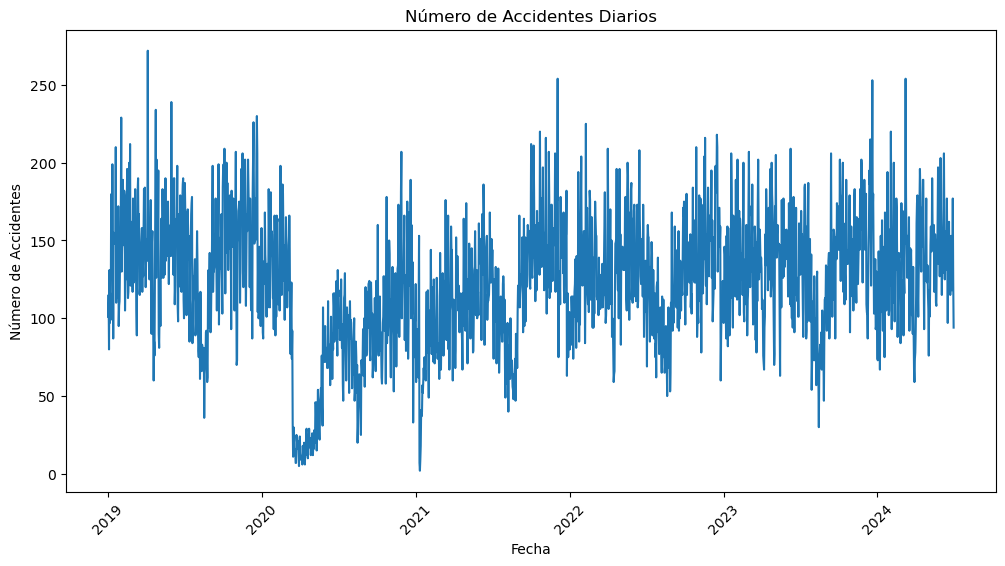

In [35]:
# Agrupar por fecha y contar el número de accidentes
accidentes_diarios = df_unido.groupby('fecha').size()

# Convertir el resultado a un DataFrame
df_accidentes_diarios = accidentes_diarios.reset_index(name='num_accidentes')

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar usando seaborn
sns.lineplot(data=df_accidentes_diarios, x='fecha', y='num_accidentes', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Accidentes')
ax.set_title('Número de Accidentes Diarios')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


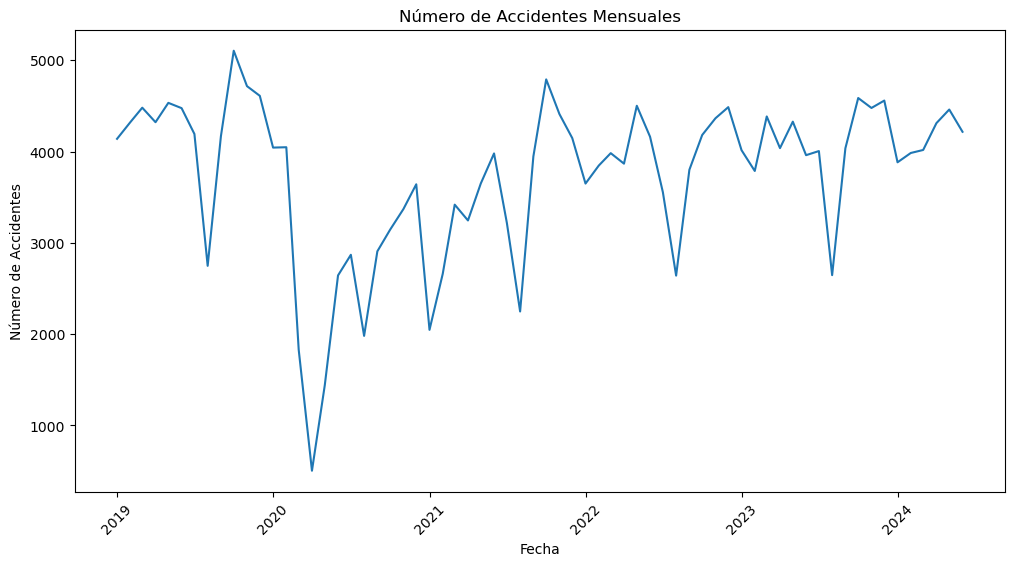

In [36]:
# Extraer el año y el mes de la columna 'fecha_hora'
df_unido['año_mes'] = df_unido['fecha_hora'].dt.to_period('M')

# Agrupar por año y mes y contar el número de accidentes
accidentes_mensuales = df_unido.groupby('año_mes').size()

# Convertir el resultado a un DataFrame
df_accidentes_mensuales = accidentes_mensuales.reset_index(name='num_accidentes')

# Convertir 'año_mes' a datetime para la visualización
df_accidentes_mensuales['año_mes'] = df_accidentes_mensuales['año_mes'].dt.to_timestamp()

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar usando seaborn
sns.lineplot(data=df_accidentes_mensuales, x='año_mes', y='num_accidentes', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Accidentes')
ax.set_title('Número de Accidentes Mensuales')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


In [37]:
df_unido.groupby(['mes']).size()

mes
1.0     21775
2.0     22646
3.0     22110
4.0     20285
5.0     22911
6.0     23435
7.0     17838
8.0     12264
9.0     18857
10.0    21806
11.0    21337
12.0    21442
dtype: int64

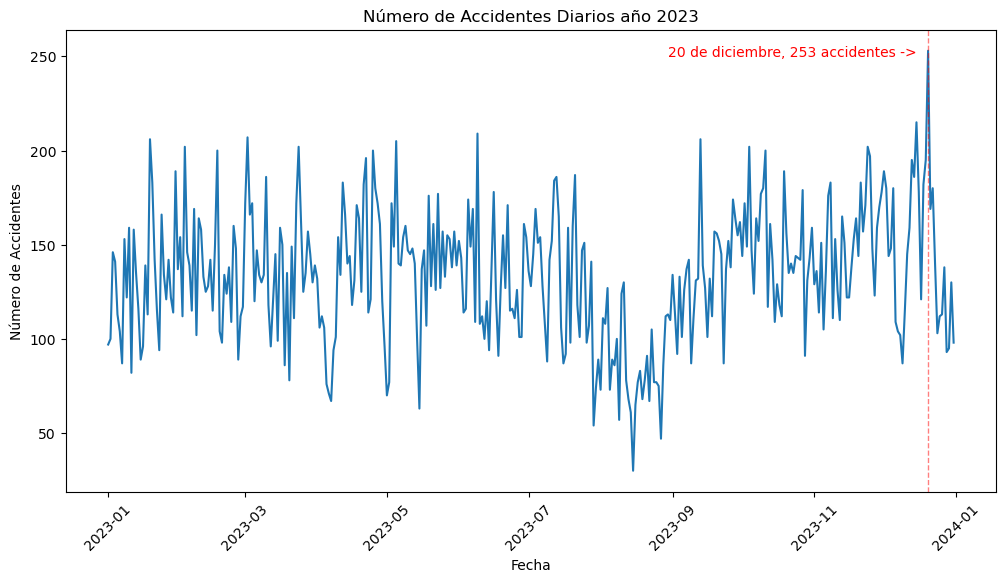

In [39]:
# Agrupar por fecha y contar el número de accidentes
accidentes_diarios = df_unido[df_unido['año'] == 2023].groupby('fecha').size()

# Convertir el resultado a un DataFrame
df_accidentes_diarios = accidentes_diarios.reset_index(name='num_accidentes')

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar usando seaborn
sns.lineplot(data=df_accidentes_diarios, x='fecha', y='num_accidentes', ax=ax)
ax.axvline(x=pd.to_datetime('2023-12-20', format= '%Y-%m-%d'), color='r', linestyle='--', linewidth=1, label='20 de diciembre, 253', alpha=0.5)
ax.text(x=pd.to_datetime('2023-08-30', format= '%Y-%m-%d'), y=250, s='20 de diciembre, 253 accidentes ->', color='r', fontsize=10)
# Configurar etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Accidentes')
ax.set_title('Número de Accidentes Diarios año 2023')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


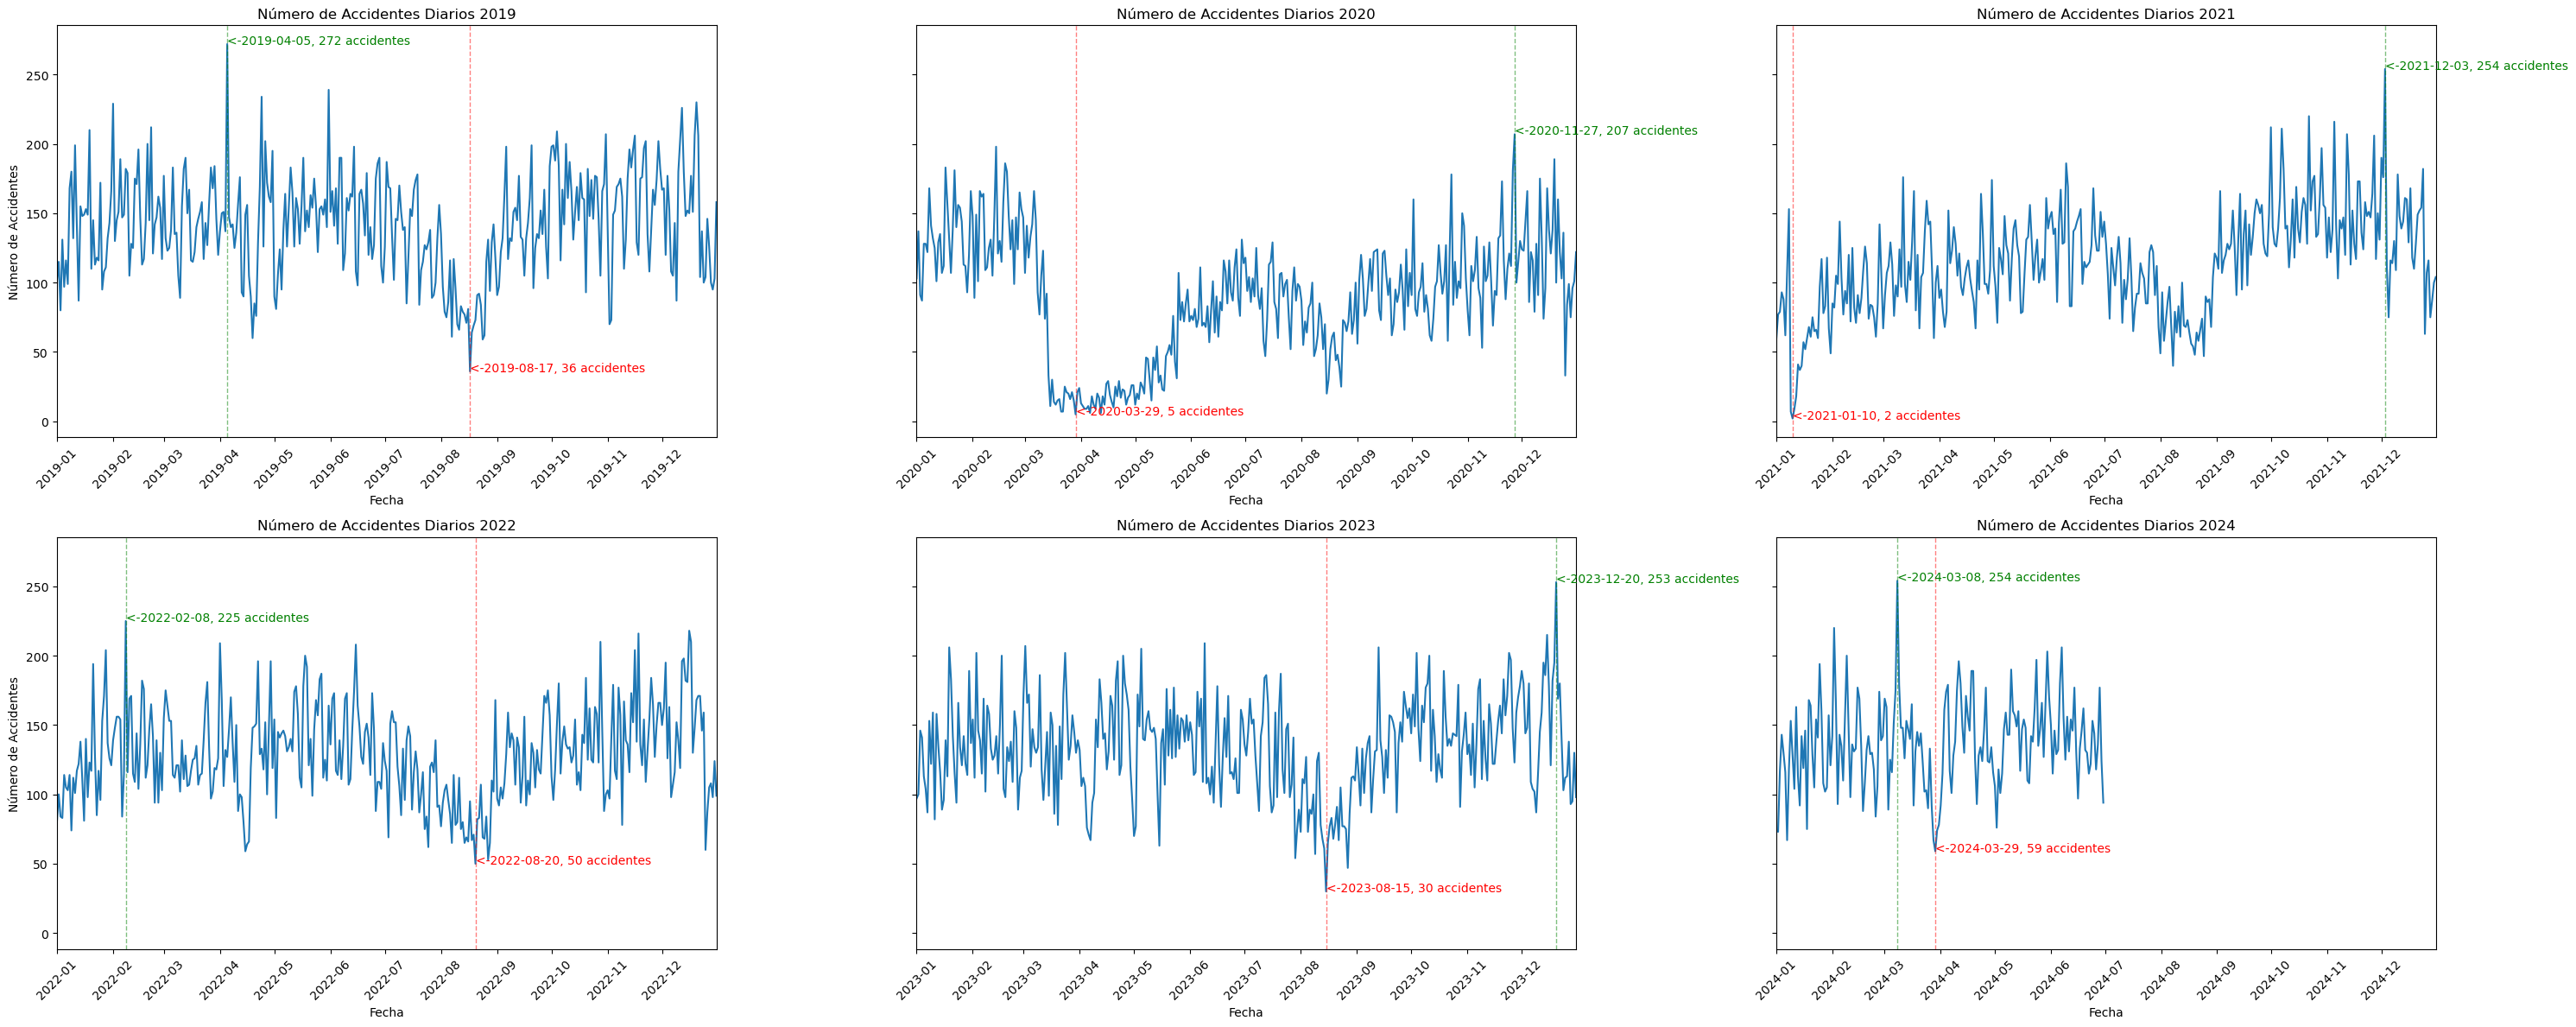

In [40]:
# Crear una figura con 6 subplots (2 filas x 3 columnas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,12), sharex=False, sharey=True)

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Definir fechas para línea vertical y texto (puedes ajustar estos valores según sea necesario)



# Iterar sobre cada año y su subplot correspondiente
for i, año in enumerate(range(2019, 2025)):
    # Filtrar datos para el año actual
    #Fechas valores maximos
    max = df_unido[df_unido['año'] == año].groupby('fecha').size()[(df_unido[df_unido['año'] == año].groupby('fecha').size() == df_unido[df_unido['año'] == año].groupby('fecha').size().max())].iloc[0]
    maxfecha = df_unido[df_unido['año'] == año].groupby('fecha').size()[(df_unido[df_unido['año'] == año].groupby('fecha').size() == df_unido[df_unido['año'] == año].groupby('fecha').size().max())].index[0].strftime('%Y-%m-%d')
    #Fechas valores mínimos
    min = df_unido[df_unido['año'] == año].groupby('fecha').size()[(df_unido[df_unido['año'] == año].groupby('fecha').size() == df_unido[df_unido['año'] == año].groupby('fecha').size().min())].iloc[0]
    minfecha = df_unido[df_unido['año'] == año].groupby('fecha').size()[(df_unido[df_unido['año'] == año].groupby('fecha').size() == df_unido[df_unido['año'] == año].groupby('fecha').size().min())].index[0].strftime('%Y-%m-%d')
    
    df_anio = df_unido[df_unido['año'] == año]
    
    # Agrupar por fecha y contar el número de accidentes
    accidentes_diarios = df_anio.groupby('fecha').size()
    
    # Convertir el resultado a un DataFrame
    df_accidentes_diarios = accidentes_diarios.reset_index(name='num_accidentes')
    
    # Graficar en el subplot correspondiente
    sns.lineplot(data=df_accidentes_diarios, x='fecha', y='num_accidentes', ax=axes[i])
    
    inicio_año = pd.to_datetime(f'{año}-01-01')
    fin_año = pd.to_datetime(f'{año}-12-31')
    axes[i].set_xlim([inicio_año, fin_año])
    # Añadir una línea vertical y un texto (max)
    axes[i].axvline(x=pd.to_datetime(maxfecha, format='%Y-%m-%d'), color='g', linestyle='--', linewidth=1, label=str(maxfecha)+', 253 accidentes', alpha=0.5)
    axes[i].text(x=pd.to_datetime(maxfecha, format='%Y-%m-%d'), y=max, s='<-'+str(maxfecha)+', '+str(max)+' accidentes', color='g', fontsize=10)
    
    # Añadir una línea vertical y un texto (min)
    axes[i].axvline(x=pd.to_datetime(minfecha, format='%Y-%m-%d'), color='r', linestyle='--', linewidth=1, label=str(minfecha)+', 253 accidentes', alpha=0.5)
    axes[i].text(x=pd.to_datetime(minfecha, format='%Y-%m-%d'), y=min, s='<-'+str(minfecha)+', '+str(min)+' accidentes', color='r', fontsize=10)

    # Configurar el título del subplot
    axes[i].set_title(f'Número de Accidentes Diarios {año}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Número de Accidentes')
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Accidentes por hora del día:

In [77]:
df_unido['hora']

0          9:10:00
1          9:10:00
2          3:45:00
3          3:45:00
4          3:45:00
            ...   
246701     3:28:00
246702    15:15:00
246703    15:15:00
246704    13:10:00
246705    13:10:00
Name: hora, Length: 246706, dtype: object

In [79]:
hora_temporal = pd.to_datetime(df_unido['hora'], format='%H:%M:%S')
accidents_per_time = hora_temporal.value_counts().sort_index()
accidents_per_time.index

DatetimeIndex(['1900-01-01 00:00:00', '1900-01-01 00:01:00',
               '1900-01-01 00:02:00', '1900-01-01 00:03:00',
               '1900-01-01 00:04:00', '1900-01-01 00:05:00',
               '1900-01-01 00:06:00', '1900-01-01 00:07:00',
               '1900-01-01 00:08:00', '1900-01-01 00:09:00',
               ...
               '1900-01-01 23:50:00', '1900-01-01 23:51:00',
               '1900-01-01 23:52:00', '1900-01-01 23:53:00',
               '1900-01-01 23:54:00', '1900-01-01 23:55:00',
               '1900-01-01 23:56:00', '1900-01-01 23:57:00',
               '1900-01-01 23:58:00', '1900-01-01 23:59:00'],
              dtype='datetime64[ns]', name='hora', length=1429, freq=None)

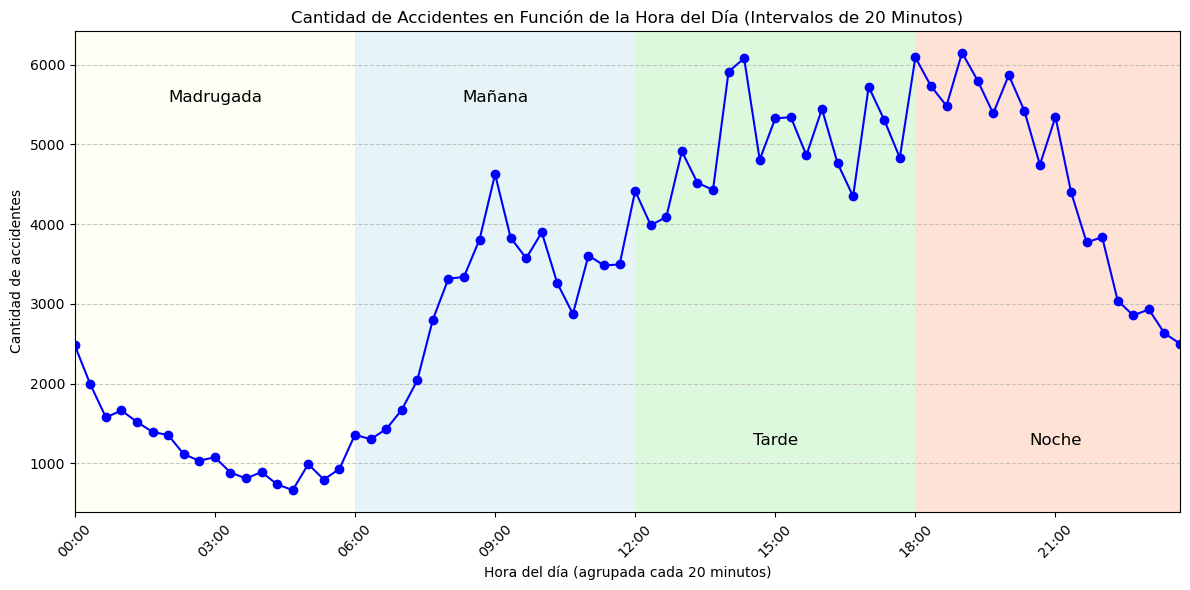

In [84]:
# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
hora_temporal = pd.to_datetime(df_unido['hora'], format='%H:%M:%S')

# Agrupar los minutos en intervalos de 20 minutos
hora_temporal_agrupada = hora_temporal.dt.floor('20min')

# Contar la cantidad de accidentes por cada intervalo de 20 minutos
accidents_per_time = hora_temporal_agrupada.value_counts().sort_index()

# Convertir el índice a una cadena en formato de hora para evitar la parte de la fecha
accidents_per_time.index = accidents_per_time.index.strftime('%H:%M')

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar la cantidad de accidentes por cada intervalo de 20 minutos
plt.plot(accidents_per_time.index, accidents_per_time.values, marker='o', linestyle='-', color='b')
plt.xlabel('Hora del día (agrupada cada 20 minutos)')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de Accidentes en Función de la Hora del Día (Intervalos de 20 Minutos)')

# Añadir divisiones del día y cambiar el color del fondo
plt.axvspan(0, 18, facecolor='lightyellow', alpha=0.3)  # Madrugada (00:00-06:00, en intervalos de 20 minutos)
plt.axvspan(18, 36, facecolor='lightblue', alpha=0.3)  # Mañana (06:00-12:00, en intervalos de 20 minutos)
plt.axvspan(36, 54, facecolor='lightgreen', alpha=0.3)  # Tarde (12:00-18:00, en intervalos de 20 minutos)
plt.axvspan(54, 72, facecolor='lightsalmon', alpha=0.3)  # Noche (18:00-24:00, en intervalos de 20 minutos)

# Añadir texto para cada parte del día
plt.text(9, max(accidents_per_time.values) * 0.9, 'Madrugada', fontsize=12, color='black', ha='center')
plt.text(27, max(accidents_per_time.values) * 0.9, 'Mañana', fontsize=12, color='black', ha='center')
plt.text(45, max(accidents_per_time.values) * 0.2, 'Tarde', fontsize=12, color='black', ha='center')
plt.text(63, max(accidents_per_time.values) * 0.2, 'Noche', fontsize=12, color='black', ha='center')

# Ajustar límites y etiquetas del eje x
plt.xticks(ticks=range(0, len(accidents_per_time), 9), labels=accidents_per_time.index[::9], rotation=45)
plt.xlim(0, len(accidents_per_time) - 1)

# Mostrar la gráfica
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




Por hora y por día:

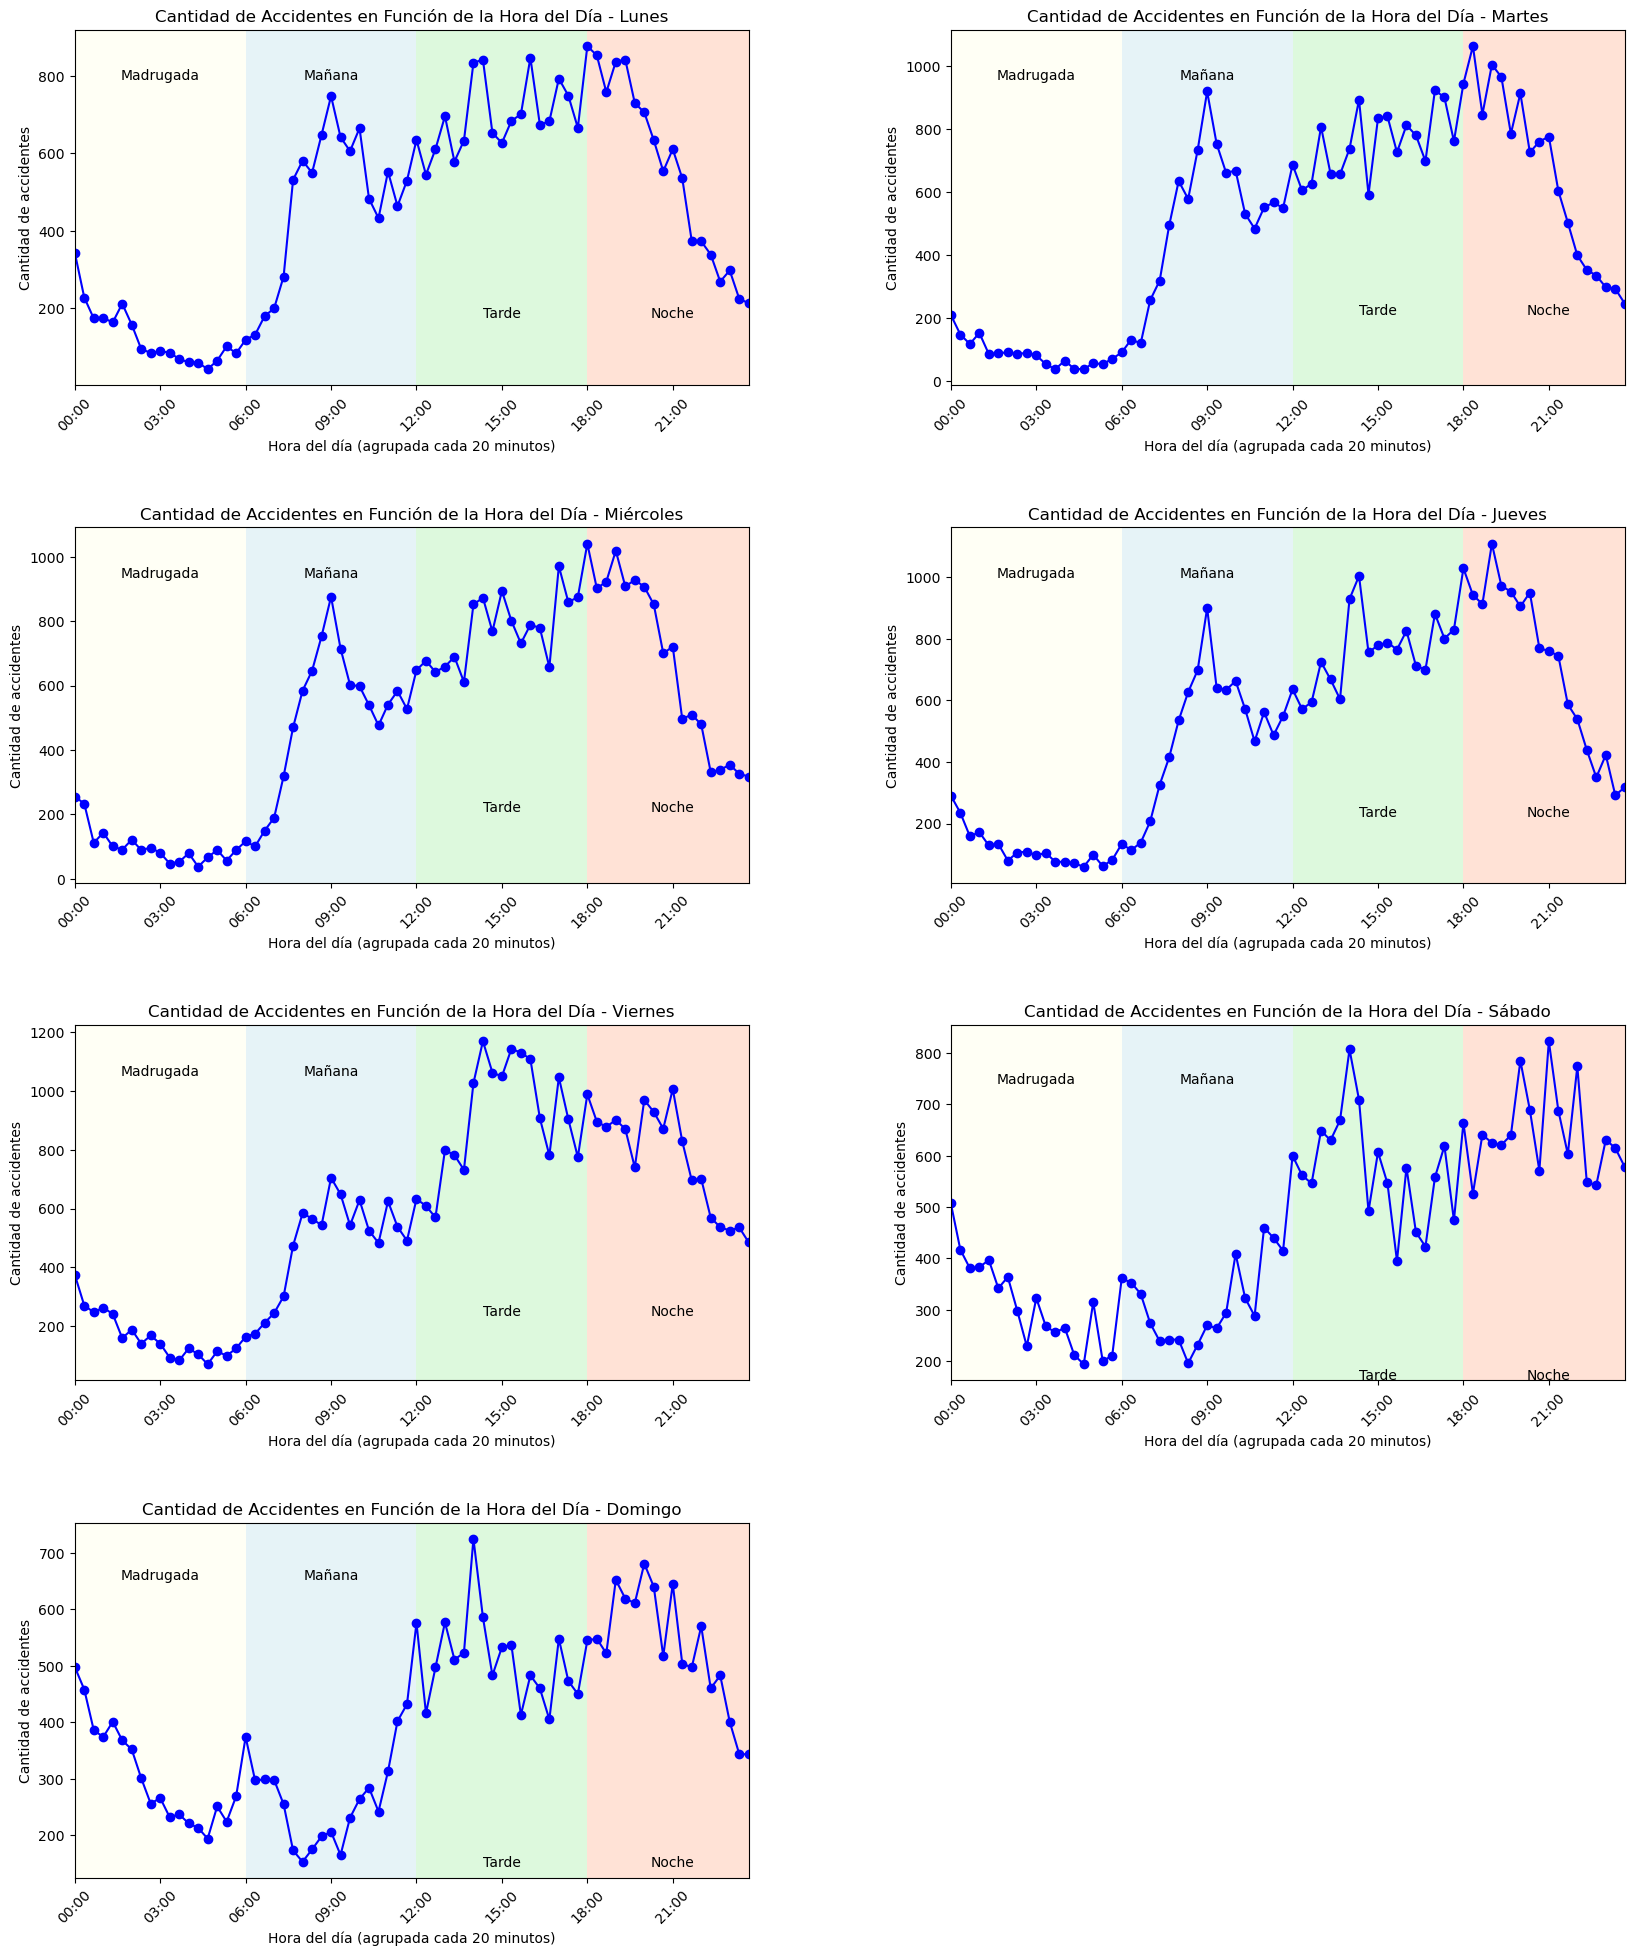

In [93]:
# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
hora_temporal = pd.to_datetime(df_unido['hora'], format='%H:%M:%S')

# Convertir la columna 'fecha' a datetime y extraer el día de la semana
df_unido['fecha'] = pd.to_datetime(df_unido['fecha'], format='%Y-%m-%d')
df_unido['dia_semana'] = df_unido['fecha'].dt.day_name()

# Cambiar los nombres de los días de la semana a español
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_unido['dia_semana'] = df_unido['dia_semana'].replace({
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
})

# Crear una copia temporal con la hora agrupada por intervalos de 20 minutos y agregar el día de la semana
df_unido['hora_agrupada'] = hora_temporal.dt.floor('20min')

# Crear una figura con 7 subplots (uno para cada día de la semana)
fig, axes = plt.subplots(4, 2, figsize=(20, 24))  # 3 filas, 3 columnas (dejar uno vacío para mejor legibilidad)
axes = axes.flatten()  # Aplanar la matriz de ejes para acceder a ellos más fácilmente

# Graficar cada día de la semana en un subplot diferente
for i, dia in enumerate(dias_semana):
    # Filtrar los datos por el día de la semana
    df_filtrado = df_unido[df_unido['dia_semana'] == dia]
    
    # Contar la cantidad de accidentes por cada intervalo de 20 minutos
    accidents_per_time = df_filtrado['hora_agrupada'].value_counts().sort_index()

    # Convertir el índice a una cadena en formato de hora para evitar la parte de la fecha
    accidents_per_time.index = accidents_per_time.index.strftime('%H:%M')

    # Graficar la cantidad de accidentes por cada intervalo de 20 minutos
    ax = axes[i]
    ax.plot(accidents_per_time.index, accidents_per_time.values, marker='o', linestyle='-', color='b')
    ax.set_xlabel('Hora del día (agrupada cada 20 minutos)')
    ax.set_ylabel('Cantidad de accidentes')
    ax.set_title(f'Cantidad de Accidentes en Función de la Hora del Día - {dia}')

    # Añadir divisiones del día y cambiar el color del fondo
    ax.axvspan(0, 18, facecolor='lightyellow', alpha=0.3)  # Madrugada (00:00-06:00, en intervalos de 20 minutos)
    ax.axvspan(18, 36, facecolor='lightblue', alpha=0.3)  # Mañana (06:00-12:00, en intervalos de 20 minutos)
    ax.axvspan(36, 54, facecolor='lightgreen', alpha=0.3)  # Tarde (12:00-18:00, en intervalos de 20 minutos)
    ax.axvspan(54, 72, facecolor='lightsalmon', alpha=0.3)  # Noche (18:00-24:00, en intervalos de 20 minutos)

    # Añadir texto para cada parte del día
    ax.text(9, max(accidents_per_time.values) * 0.9 if not accidents_per_time.empty else 1, 'Madrugada', fontsize=10, color='black', ha='center')
    ax.text(27, max(accidents_per_time.values) * 0.9 if not accidents_per_time.empty else 1, 'Mañana', fontsize=10, color='black', ha='center')
    ax.text(45, max(accidents_per_time.values) * 0.2 if not accidents_per_time.empty else 1, 'Tarde', fontsize=10, color='black', ha='center')
    ax.text(63, max(accidents_per_time.values) * 0.2 if not accidents_per_time.empty else 1, 'Noche', fontsize=10, color='black', ha='center')

    # Ajustar límites y etiquetas del eje x
    ax.set_xticks(range(0, len(accidents_per_time), 9))
    ax.set_xticklabels(accidents_per_time.index[::9], rotation=45)
    ax.set_xlim(0, len(accidents_per_time) - 1)

# Eliminar el subplot vacío (el último de la cuadrícula)
fig.delaxes(axes[-1])

# Ajustar el layout para que las gráficas no se solapen
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Mostrar las gráficas
plt.show()


Días festivos:

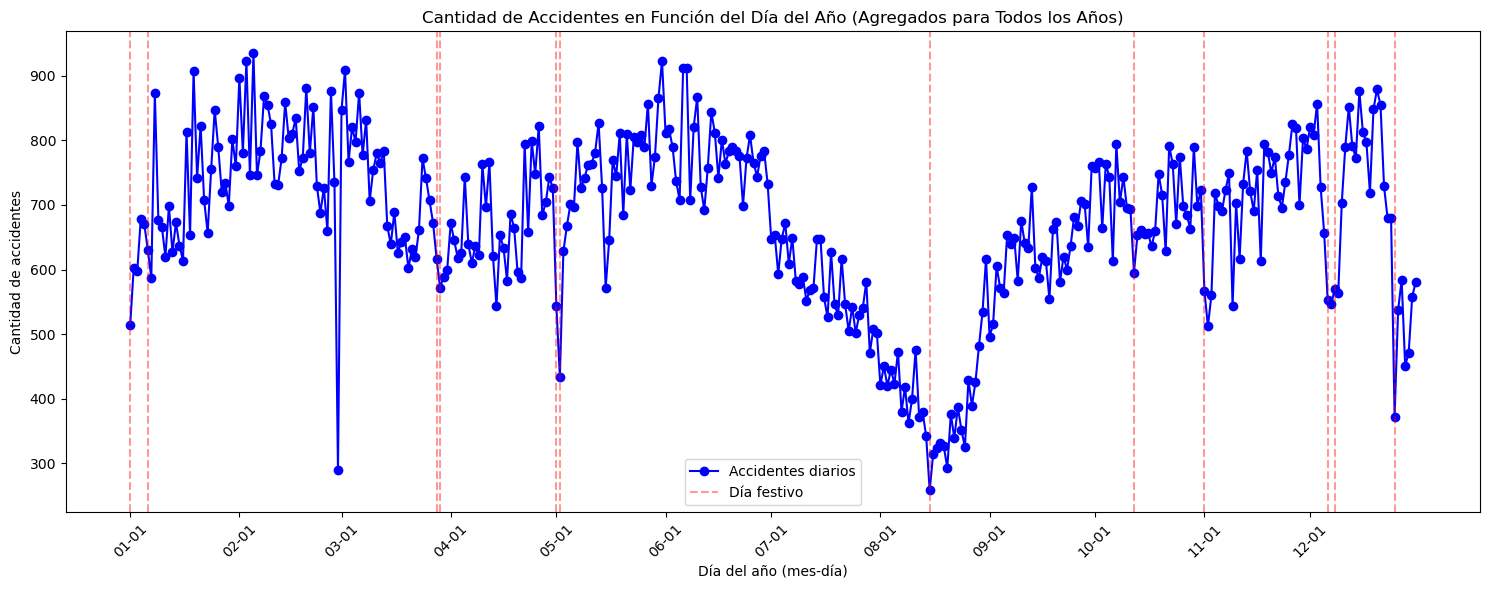

In [97]:
# Convertir la columna 'fecha' a datetime
df_unido['fecha'] = pd.to_datetime(df_unido['fecha'], format='%Y-%m-%d')

# Agregar columna 'mes_dia' para representar cada día del año sin diferenciar entre años
df_unido['mes_dia'] = df_unido['fecha'].dt.strftime('%m-%d')

# Contar la cantidad de accidentes por cada día del año (sin diferenciar entre años)
accidents_per_day = df_unido['mes_dia'].value_counts().sort_index()

# Lista de días festivos (sin diferenciar entre años)
festivos_madrid = [
    '01-01',  # Año Nuevo
    '01-06',  # Reyes Magos
    '03-28',  # Jueves Santo (ejemplo para 2024)
    '03-29',  # Viernes Santo (ejemplo para 2024)
    '05-01',  # Día del Trabajador
    '05-02',  # Día de la Comunidad de Madrid
    '08-15',  # Asunción de la Virgen
    '10-12',  # Día de la Hispanidad
    '11-01',  # Día de Todos los Santos
    '12-06',  # Día de la Constitución
    '12-08',  # Inmaculada Concepción
    '12-25',  # Navidad
]

# Crear la figura
plt.figure(figsize=(15, 6))

# Graficar la cantidad de accidentes por cada día del año
plt.plot(accidents_per_day.index, accidents_per_day.values, marker='o', linestyle='-', color='b', label='Accidentes diarios')

# Añadir líneas discontinuas para los días festivos
for festivo in festivos_madrid:
    if festivo in accidents_per_day.index:
        plt.axvline(x=festivo, color='r', linestyle='--', alpha=0.4, label='Día festivo' if festivo == festivos_madrid[0] else "")

# Etiquetas y título
plt.xlabel('Día del año (mes-día)')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de Accidentes en Función del Día del Año (Agregados para Todos los Años)')

# Configurar los ticks del eje x para mostrar únicamente los primeros días de cada mes
meses = ['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01', '09-01', '10-01', '11-01', '12-01']
plt.xticks(ticks=[accidents_per_day.index.get_loc(mes) for mes in meses if mes in accidents_per_day.index], labels=meses, rotation=45)

plt.legend()

# Ajustar el layout para mejor visualización
plt.tight_layout()

# Mostrar la gráfica
plt.show()

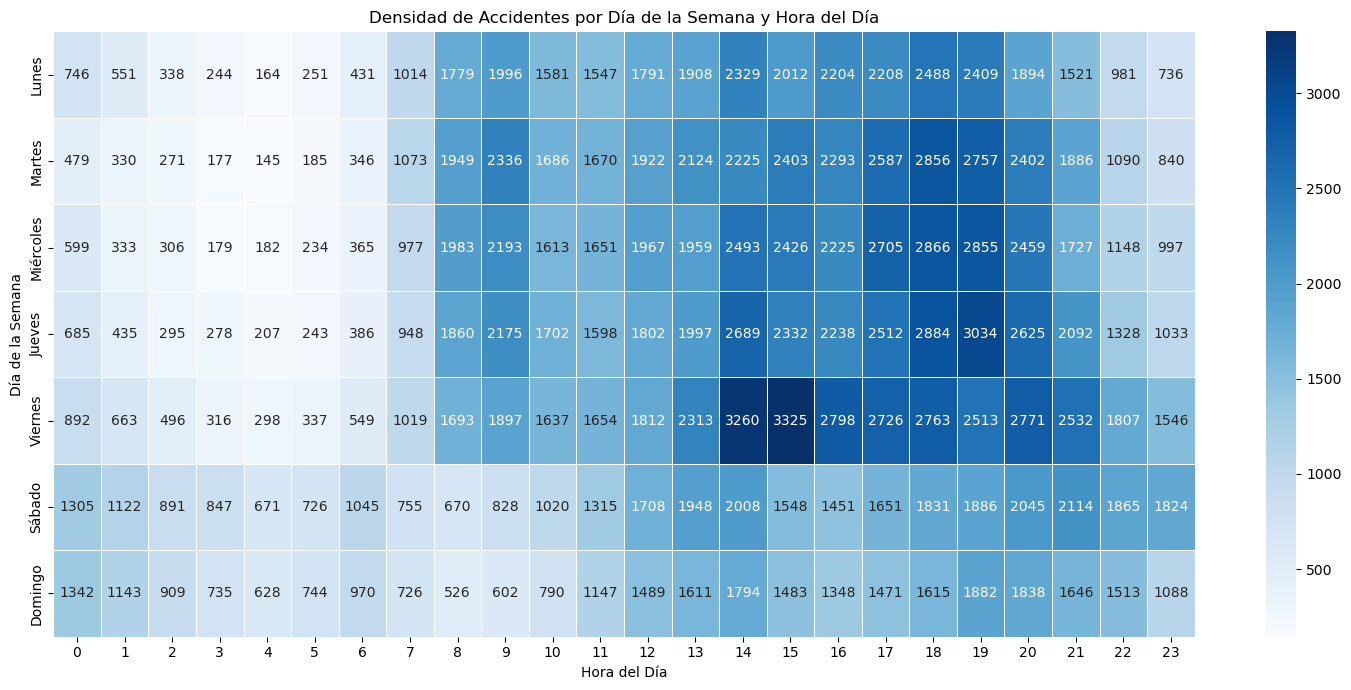

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame 'df_unido' desde el archivo CSV proporcionado
df_unido = pd.read_csv('df_precat_test.csv', low_memory=False)

# Convertir la columna 'fecha' a datetime
df_unido['fecha'] = pd.to_datetime(df_unido['fecha'], format='%Y-%m-%d')

# Extraer el día de la semana y la hora del día
df_unido['dia_semana'] = df_unido['fecha'].dt.day_name()

# Traducir los nombres de los días de la semana al español
df_unido['dia_semana'] = df_unido['dia_semana'].replace({
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
})

# Convertir la columna 'hora' a datetime y extraer la hora
df_unido['hora'] = pd.to_datetime(df_unido['hora'], format='%H:%M:%S').dt.hour

# Crear una tabla de frecuencias para accidentes por día de la semana y hora del día
heatmap_data = df_unido.pivot_table(index='dia_semana', columns='hora', values='fecha', aggfunc='count')

# Reordenar los días de la semana para comenzar en lunes
dias_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
heatmap_data = heatmap_data.reindex(dias_ordenados)

# Crear el heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title('Densidad de Accidentes por Día de la Semana y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



Se ve que existen distribuciones claramente distintas según dia de diario o fin de semana

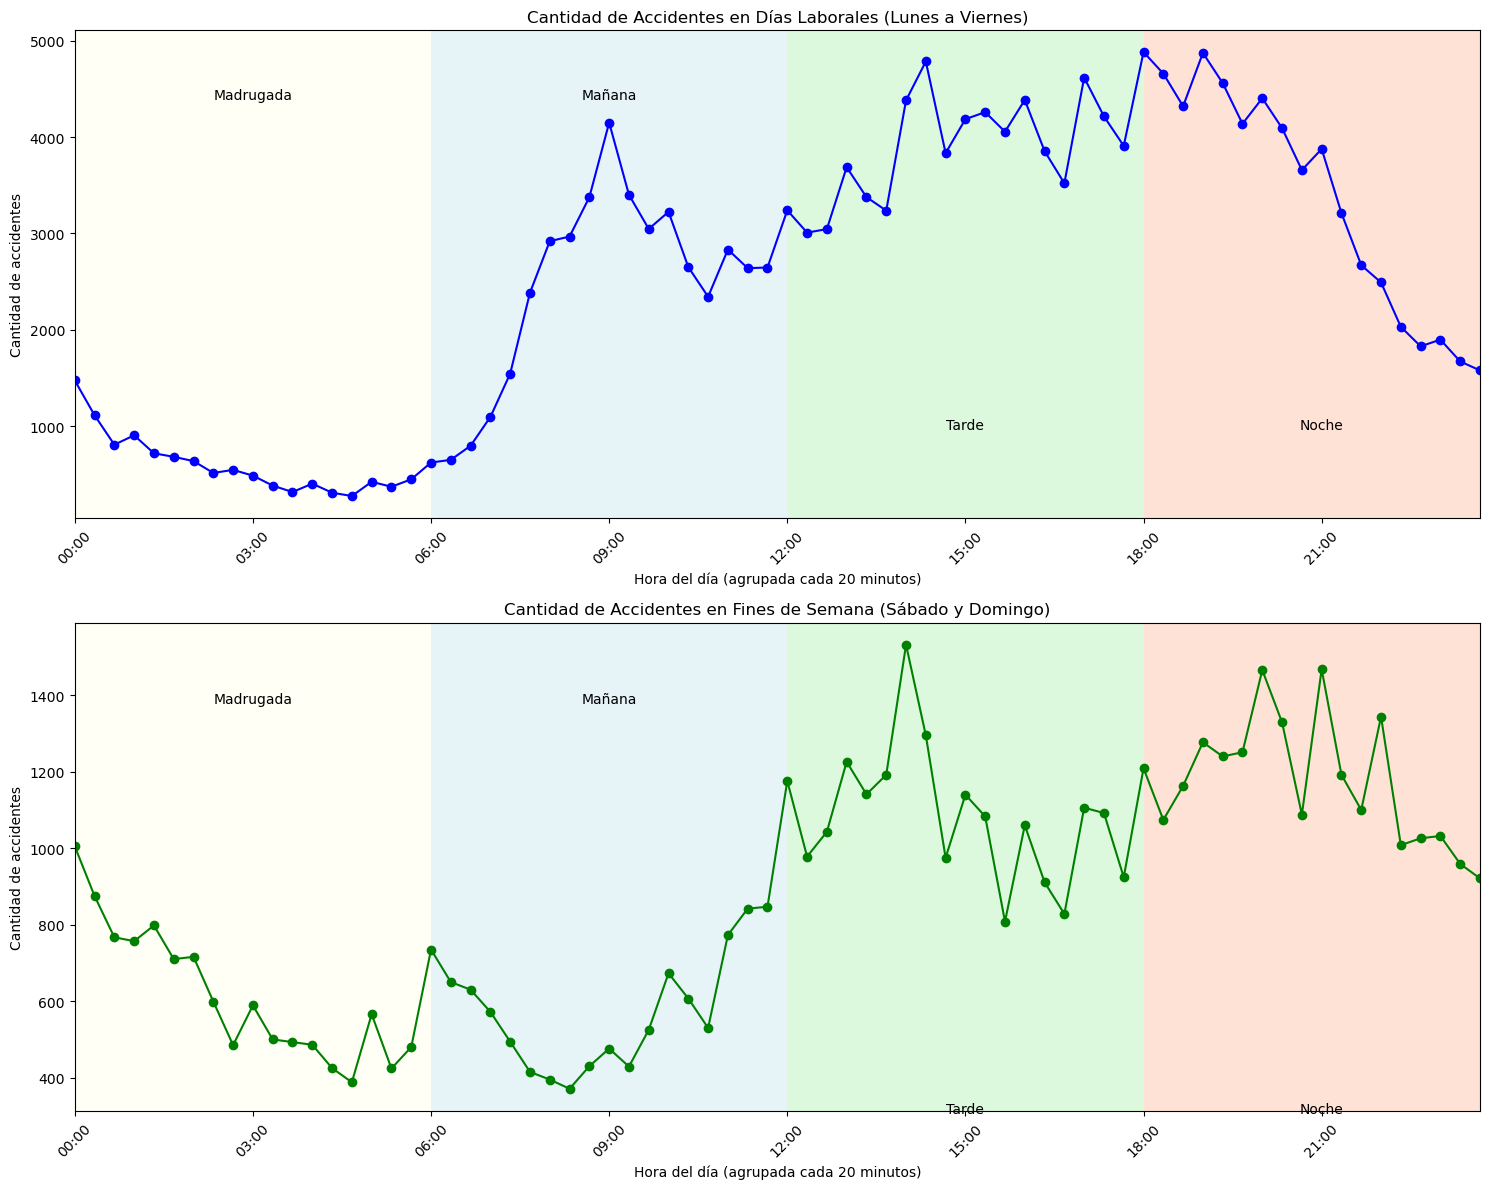

In [102]:
df_unido = pd.read_csv('df_precat_test.csv', low_memory=False)
# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
hora_temporal = pd.to_datetime(df_unido['hora'], format='%H:%M:%S')

# Convertir la columna 'fecha' a datetime y extraer el día de la semana
fecha_temporal = pd.to_datetime(df_unido['fecha'], format='%Y-%m-%d')
dia_semana_temporal = fecha_temporal.dt.day_name()

# Cambiar los nombres de los días de la semana a español
dia_semana_temporal = dia_semana_temporal.replace({
    'Monday': 'Lunes', 'Tuesday': 'Martes', 'Wednesday': 'Miércoles',
    'Thursday': 'Jueves', 'Friday': 'Viernes', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
})

# Crear una columna temporal con la hora agrupada por intervalos de 20 minutos
hora_agrupada_temporal = hora_temporal.dt.floor('20min')

# Crear una figura con 2 subplots: Días laborales y fines de semana
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Días laborales (Lunes a Viernes)
dias_laborales = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
df_laborales = pd.DataFrame({'hora_agrupada': hora_agrupada_temporal, 'dia_semana': dia_semana_temporal})
df_laborales = df_laborales[df_laborales['dia_semana'].isin(dias_laborales)]
accidents_laborales = df_laborales['hora_agrupada'].value_counts().sort_index()

# Convertir el índice a una cadena en formato de hora para evitar la parte de la fecha
accidents_laborales.index = accidents_laborales.index.strftime('%H:%M')

# Graficar la cantidad de accidentes por cada intervalo de 20 minutos para días laborales
ax = axes[0]
ax.plot(accidents_laborales.index, accidents_laborales.values, marker='o', linestyle='-', color='b')
ax.set_xlabel('Hora del día (agrupada cada 20 minutos)')
ax.set_ylabel('Cantidad de accidentes')
ax.set_title('Cantidad de Accidentes en Días Laborales (Lunes a Viernes)')

# Añadir divisiones del día y cambiar el color del fondo
ax.axvspan(0, 18, facecolor='lightyellow', alpha=0.3)  # Madrugada (00:00-06:00)
ax.axvspan(18, 36, facecolor='lightblue', alpha=0.3)  # Mañana (06:00-12:00)
ax.axvspan(36, 54, facecolor='lightgreen', alpha=0.3)  # Tarde (12:00-18:00)
ax.axvspan(54, 72, facecolor='lightsalmon', alpha=0.3)  # Noche (18:00-24:00)

# Añadir texto para cada parte del día
ax.text(9, max(accidents_laborales.values) * 0.9 if not accidents_laborales.empty else 1, 'Madrugada', fontsize=10, color='black', ha='center')
ax.text(27, max(accidents_laborales.values) * 0.9 if not accidents_laborales.empty else 1, 'Mañana', fontsize=10, color='black', ha='center')
ax.text(45, max(accidents_laborales.values) * 0.2 if not accidents_laborales.empty else 1, 'Tarde', fontsize=10, color='black', ha='center')
ax.text(63, max(accidents_laborales.values) * 0.2 if not accidents_laborales.empty else 1, 'Noche', fontsize=10, color='black', ha='center')

# Ajustar límites y etiquetas del eje x
ax.set_xticks(range(0, len(accidents_laborales), 9))
ax.set_xticklabels(accidents_laborales.index[::9], rotation=45)
ax.set_xlim(0, len(accidents_laborales) - 1)

# Fines de semana (Sábado y Domingo)
dias_finde = ['Sábado', 'Domingo']
df_finde = pd.DataFrame({'hora_agrupada': hora_agrupada_temporal, 'dia_semana': dia_semana_temporal})
df_finde = df_finde[df_finde['dia_semana'].isin(dias_finde)]
accidents_finde = df_finde['hora_agrupada'].value_counts().sort_index()

# Convertir el índice a una cadena en formato de hora para evitar la parte de la fecha
accidents_finde.index = accidents_finde.index.strftime('%H:%M')

# Graficar la cantidad de accidentes por cada intervalo de 20 minutos para fines de semana
ax = axes[1]
ax.plot(accidents_finde.index, accidents_finde.values, marker='o', linestyle='-', color='g')
ax.set_xlabel('Hora del día (agrupada cada 20 minutos)')
ax.set_ylabel('Cantidad de accidentes')
ax.set_title('Cantidad de Accidentes en Fines de Semana (Sábado y Domingo)')

# Añadir divisiones del día y cambiar el color del fondo
ax.axvspan(0, 18, facecolor='lightyellow', alpha=0.3)  # Madrugada (00:00-06:00)
ax.axvspan(18, 36, facecolor='lightblue', alpha=0.3)  # Mañana (06:00-12:00)
ax.axvspan(36, 54, facecolor='lightgreen', alpha=0.3)  # Tarde (12:00-18:00)
ax.axvspan(54, 72, facecolor='lightsalmon', alpha=0.3)  # Noche (18:00-24:00)

# Añadir texto para cada parte del día
ax.text(9, max(accidents_finde.values) * 0.9 if not accidents_finde.empty else 1, 'Madrugada', fontsize=10, color='black', ha='center')
ax.text(27, max(accidents_finde.values) * 0.9 if not accidents_finde.empty else 1, 'Mañana', fontsize=10, color='black', ha='center')
ax.text(45, max(accidents_finde.values) * 0.2 if not accidents_finde.empty else 1, 'Tarde', fontsize=10, color='black', ha='center')
ax.text(63, max(accidents_finde.values) * 0.2 if not accidents_finde.empty else 1, 'Noche', fontsize=10, color='black', ha='center')

# Ajustar límites y etiquetas del eje x
ax.set_xticks(range(0, len(accidents_finde), 9))
ax.set_xticklabels(accidents_finde.index[::9], rotation=45)
ax.set_xlim(0, len(accidents_finde) - 1)

# Ajustar el layout para que las gráficas no se solapen
plt.subplots_adjust(hspace=0.4)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

Por lo tanto queda pendiente, el poder usar como variable categórica las vairables que caractericen los dias de dairio y los fin de semana

#### Análisis espacial

In [174]:
df_unido = pd.read_csv('df_precat_test.csv')
df_unido.info()

C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_17584\2348655701.py:1: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unido = pd.read_csv('df_precat_test.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240801 entries, 0 to 240800
Data columns (total 53 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            240801 non-null  int64  
 1   index                 240801 non-null  int64  
 2   num_expediente        240801 non-null  object 
 3   fecha                 240801 non-null  object 
 4   hora                  240801 non-null  object 
 5   localizacion          240801 non-null  object 
 6   numero                240793 non-null  object 
 7   cod_distrito          240793 non-null  float64
 8   distrito              240793 non-null  object 
 9   tipo_accidente        240798 non-null  object 
 10  estado_meteorológico  214836 non-null  object 
 11  tipo_vehiculo         239691 non-null  object 
 12  tipo_persona          240798 non-null  object 
 13  rango_edad            240801 non-null  object 
 14  sexo                  240801 non-null  object 
 15  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_unido = pd.read_csv('df_precat_test.csv', low_memory=False)

# Filtrar las columnas necesarias para el análisis espacial
# Utilizar 'coordenada_x_utm' y 'coordenada_y_utm'
df_unido_filtered = df_unido[['coordenada_x_utm', 'coordenada_y_utm']].dropna()

# Crear un heatmap de densidad de accidentes utilizando seaborn
plt.figure(figsize=(12, 8))

# Crear un histograma bidimensional para estimar la densidad con mejor eficiencia y algo más de resolución
sns.kdeplot(
    x=df_unido_filtered['coordenada_x_utm'],
    y=df_unido_filtered['coordenada_y_utm'],
    cmap='viridis',
    fill=True,
    bw_adjust=0.8,  # Ajustar el ancho de banda para un balance entre suavizado y detalle
    thresh=0,
    levels=50,  # Moderado aumento de niveles para más detalle sin exceder
    gridsize=300  # Gridsize ajustado para un buen balance entre calidad y eficiencia
)

# Etiquetas y título
plt.xlabel('Coordenada X (UTM)')
plt.ylabel('Coordenada Y (UTM)')
plt.title('Mapa de Densidad de Accidentes (Heatmap) - Coordenadas UTM')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Análisis espacio-temporal:

In [ ]:
import osmnx as ox
import folium
import geopandas as gpd
import pandas as pd

# Cargar el DataFrame de accidentes
df_accidentes = pd.read_csv('resultado_merge_test.csv')

# Convertir el DataFrame a GeoDataFrame usando la columna 'geometry'
# La columna 'geometry' ya debería estar en WKT (Well-Known Text) compatible con GeoPandas
accidentes_gdf = gpd.GeoDataFrame(df_accidentes, geometry=gpd.GeoSeries.from_wkt(df_accidentes['geometry']), crs="EPSG:4326")

# Agrupar por la columna 'u_v_k' para contar los accidentes por carretera
accidentes_por_carretera = df_accidentes.groupby('u_v_k').size().reset_index(name='accidente_count')

# Unir los datos de accidentes al GeoDataFrame original
accidentes_gdf['accidente_count'] = accidentes_gdf['u_v_k'].map(accidentes_por_carretera.set_index('u_v_k')['accidente_count']).fillna(0)

# Crear el mapa centrado en Madrid
m = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Añadir las carreteras al mapa, coloreándolas según el número de accidentes
for _, row in accidentes_gdf.drop_duplicates(subset='u_v_k').iterrows():
    if row['accidente_count'] > 0:
        color = 'red' if row['accidente_count'] > 50 else 'orange' if row['accidente_count'] > 20 else 'green'
        folium.PolyLine(
            locations=[(point[1], point[0]) for point in row['geometry'].coords],
            color=color,
            weight=3,
            opacity=0.7
        ).add_to(m)

# Mostrar el mapa interactivo en el Jupyter Notebook
m

In [ ]:
import pandas as pd
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster  # Importar MarkerCluster

df_accidentes = pd.read_csv('resultado_merge_test.csv')
# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
hora_temporal = pd.to_datetime(df_accidentes['hora'], format='%H:%M:%S')

# Clasificar cada accidente en un momento del día según la hora
def clasificar_momento_del_dia(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Aplicar la clasificación a la columna 'hora'
df_accidentes['momento_dia'] = hora_temporal.dt.hour.apply(clasificar_momento_del_dia)

# Convertir el DataFrame a GeoDataFrame usando las columnas de latitud y longitud
accidentes_gdf = gpd.GeoDataFrame(
    df_accidentes, 
    geometry=gpd.points_from_xy(df_accidentes['longitud'], df_accidentes['latitud']),
    crs="EPSG:4326"
)

# Crear el mapa centrado en Madrid
m = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# Crear un objeto MarkerCluster para agrupar los puntos
marker_cluster = MarkerCluster().add_to(m)

# Definir los colores para cada momento del día
colores_momento = {
    'Madrugada': 'blue',
    'Mañana': 'yellow',
    'Tarde': 'orange',
    'Noche': 'red'
}

# Añadir los puntos de accidentes al cluster según el momento del día
for _, row in accidentes_gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color=colores_momento[row['momento_dia']],
        fill=True,
        fill_opacity=0.3,  # Alpha bajo para evitar superposiciones intensas
        opacity=0.3
    ).add_to(marker_cluster)

# Mostrar el mapa interactivo en el Jupyter Notebook
m

C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_24300\3826503489.py:7: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidentes = pd.read_csv('df_precat_test.csv')


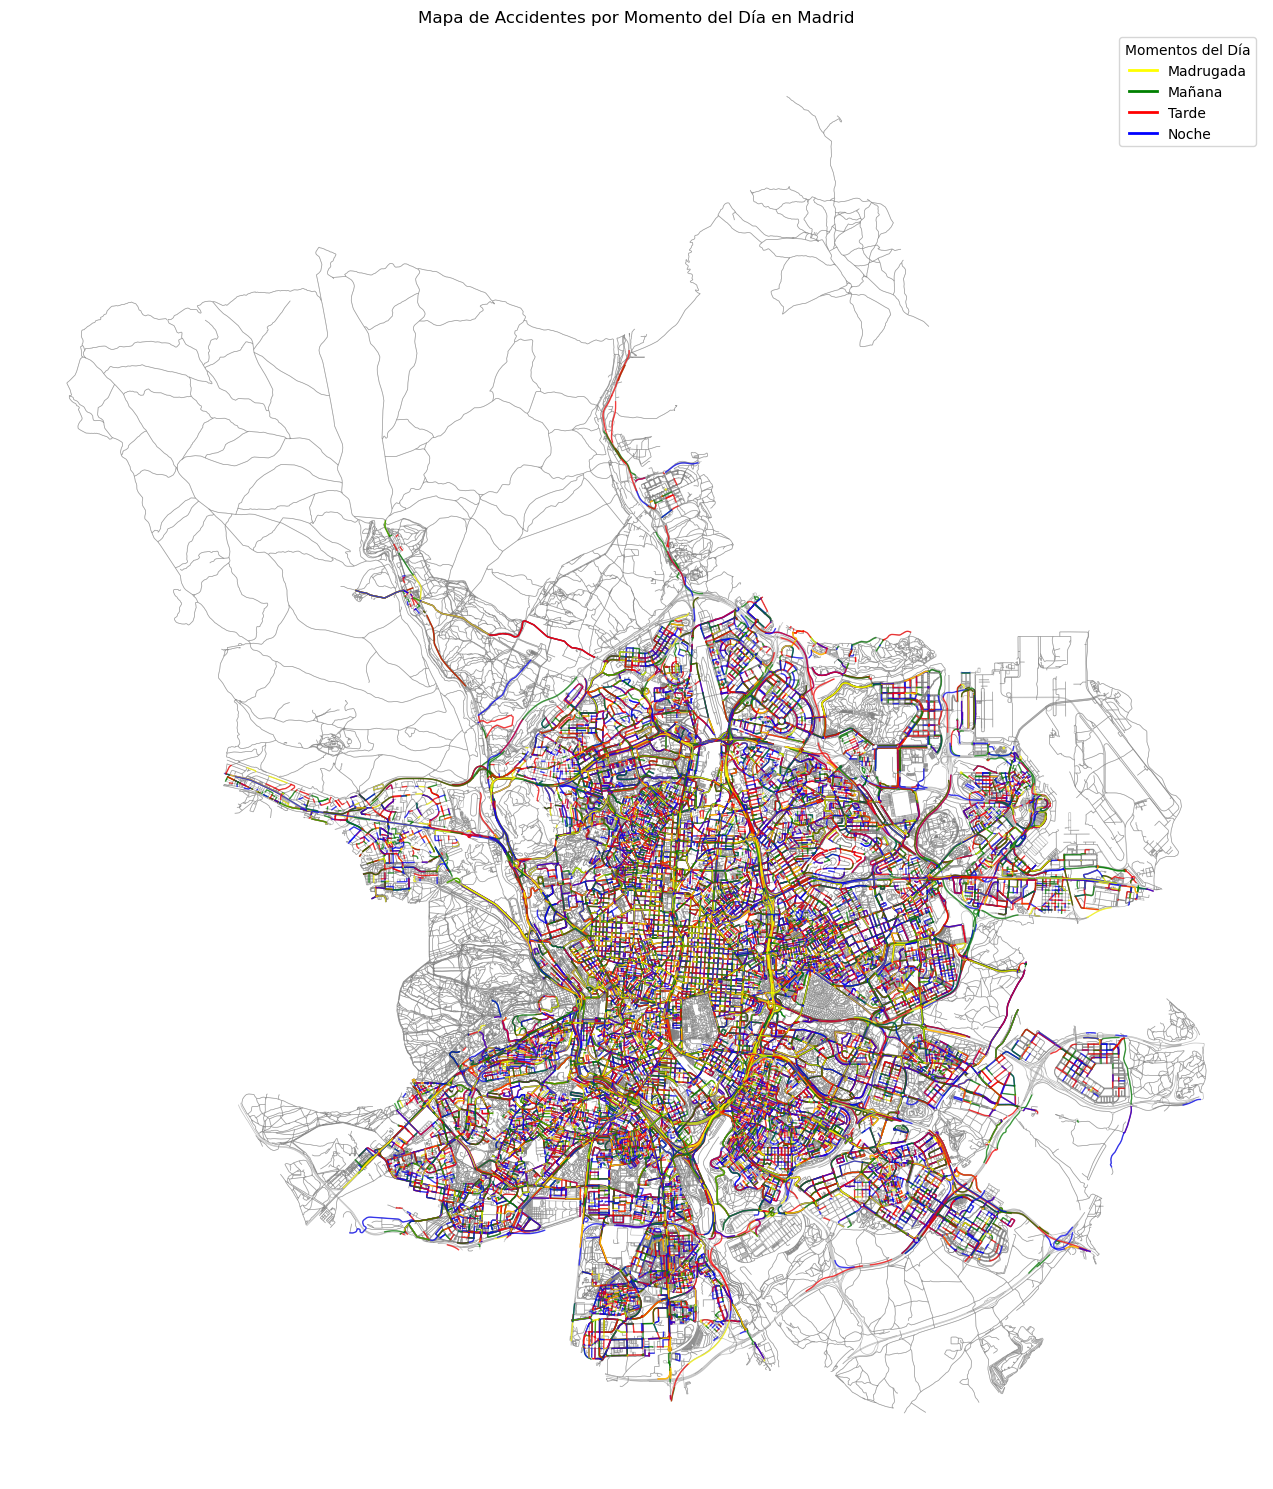

In [22]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame de accidentes
df_accidentes = pd.read_csv('df_precat_test.csv')

# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
hora_temporal = pd.to_datetime(df_accidentes['hora'], format='%H:%M:%S')

# Clasificar cada accidente en un momento del día según la hora
def clasificar_momento_del_dia(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Aplicar la clasificación a la columna 'hora'
df_accidentes['momento_dia'] = hora_temporal.dt.hour.apply(clasificar_momento_del_dia)

# Convertir el DataFrame a GeoDataFrame usando la columna 'geometry'
# La columna 'geometry' ya debería estar en WKT (Well-Known Text) compatible con GeoPandas
accidentes_gdf = gpd.GeoDataFrame(df_accidentes, geometry=gpd.GeoSeries.from_wkt(df_accidentes['geometry']), crs="EPSG:4326")

# Agrupar por la columna 'u_v_k' y 'momento_dia' para contar los accidentes por carretera y momento del día
accidentes_por_carretera = df_accidentes.groupby(['u_v_k', 'momento_dia']).size().reset_index(name='accidente_count')

# Unir los datos de accidentes al GeoDataFrame original
accidentes_gdf = accidentes_gdf.merge(accidentes_por_carretera, on=['u_v_k', 'momento_dia'], how='left')

# Definir los colores para cada momento del día
colores_momento = {
    'Madrugada': 'yellow',
    'Mañana': 'green',
    'Tarde': 'red',
    'Noche': 'blue'
}

# Crear el mapa estático usando matplotlib
fig, ax = plt.subplots(figsize=(15, 15))

# Descargar los datos de la red viaria de Madrid para usarlos como fondo
madrid_graph = ox.graph_from_place('Madrid, Spain', network_type='all')
madrid_gdf = ox.graph_to_gdfs(madrid_graph, nodes=False)
madrid_gdf.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

# Añadir las carreteras al mapa, coloreándolas según el momento del día y ajustando la intensidad
for _, row in accidentes_gdf.drop_duplicates(subset=['u_v_k', 'momento_dia']).iterrows():
    color = colores_momento[row['momento_dia']]
    linewidth = 2 if row['accidente_count'] > 50 else 1.5 if row['accidente_count'] > 20 else 1
    ax.plot(*row['geometry'].xy, color=color, linewidth=linewidth, alpha=0.7)

# Añadir la leyenda
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=2, label=momento) for momento, color in colores_momento.items()], title="Momentos del Día")
plt.title('Mapa de Accidentes por Momento del Día en Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('off')

# Mostrar el mapa
plt.tight_layout()
plt.show()


In [ ]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame de accidentes
df_accidentes = pd.read_csv('df_precat_test.csv')

# Convertir la columna 'hora' a datetime sin modificar el DataFrame original
hora_temporal = pd.to_datetime(df_accidentes['hora'], format='%H:%M:%S')

# Clasificar cada accidente en un momento del día según la hora
def clasificar_momento_del_dia(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

# Aplicar la clasificación a la columna 'hora'
df_accidentes['momento_dia'] = hora_temporal.dt.hour.apply(clasificar_momento_del_dia)

# Convertir el DataFrame a GeoDataFrame usando la columna 'geometry'
# La columna 'geometry' ya debería estar en WKT (Well-Known Text) compatible con GeoPandas
accidentes_gdf = gpd.GeoDataFrame(df_accidentes, geometry=gpd.GeoSeries.from_wkt(df_accidentes['geometry']), crs="EPSG:4326")

# Agrupar por 'u_v_k' y 'momento_dia' para contar los accidentes por carretera y momento del día
accidentes_por_carretera = df_accidentes.groupby(['u_v_k', 'momento_dia']).size().reset_index(name='accidente_count')

# Encontrar el momento del día con más accidentes para cada carretera
max_accidentes_por_carretera = accidentes_por_carretera.loc[
    accidentes_por_carretera.groupby('u_v_k')['accidente_count'].idxmax()
]

# Unir los datos del momento del día con más accidentes al GeoDataFrame original
accidentes_gdf = accidentes_gdf.merge(
    max_accidentes_por_carretera[['u_v_k', 'momento_dia']],
    on='u_v_k',
    how='left'
)

# Filtrar solo las filas donde la columna 'momento_dia' no sea nula
accidentes_gdf = accidentes_gdf[pd.notna(accidentes_gdf['momento_dia_x'])]

# Definir los colores para cada momento del día
colores_momento = {
    'Madrugada': 'yellow',
    'Mañana': 'green',
    'Tarde': 'red',
    'Noche': 'blue'
}

# Crear el mapa estático usando matplotlib
fig, ax = plt.subplots(figsize=(15, 15))

# Descargar los datos de la red viaria de Madrid para usarlos como fondo
madrid_graph = ox.graph_from_place('Madrid, Spain', network_type='all')
madrid_gdf = ox.graph_to_gdfs(madrid_graph, nodes=False)
madrid_gdf.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.5)

# Añadir las carreteras al mapa, coloreándolas según el momento del día con más accidentes
for momento, color in colores_momento.items():
    accidentes_gdf[accidentes_gdf['momento_dia_x'] == momento].plot(
        ax=ax, color=color, linewidth=2, label=momento, alpha=0.7
    )

# Añadir la leyenda
plt.legend(title="Momentos del Día")
plt.title('Mapa de Accidentes por Momento del Día en Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('off')

# Mostrar el mapa
plt.tight_layout()
plt.show()


## Creación nuevas columnas atmosféricas


### Columnas estado meteorológico: Vamos a usar la api de aemet

Aquí se llama a la API de AEMET, en paquetes de 20 llamadas cada 60 segundos (para evitar el error de sobrecarga '429'). Además se consideran 4 estaciones repartidas por Madrid, para evitar valores nulos. Estas son la estación atmosférica del Retiro, la de la Ciudad Universitaria, la de Barajas, y por último y en último lugar de prioridad, la estación atmosférica de Arganda del Rey. 

A continuación se muestra la llamada a la API y la obtención principal de los datos

In [ ]:
import requests
import pandas as pd
import numpy as np
import time

# Inicializa las listas para almacenar los resultados
contador_solicitudes = 0
limite_solicitudes = 20  # Cambia este valor si el límite es diferente
tiempo_espera = 62  # Espera de 60 segundos tras cada 20 solicitudes
cache = {}
resultados = []

# Diccionario de nombres de estaciones
estaciones = {
    '3195': 'MADRID RETIRO',
    '3194U': 'MADRID C. UNIVERSITARIA',
    '3129': 'MADRID/BARAJAS',
    '3182Y': 'ARGANDA DEL REY'
}

# API key proporcionada
api_key = 'MI CLAVE DE API KEY'

# Función para hacer solicitudes y obtener los datos
def obtener_datos_estacion(fecha_inicio_str, fecha_final_str, codigo_estacion, api_key):
    url = f"https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/{fecha_inicio_str}/fechafin/{fecha_final_str}/estacion/{codigo_estacion}"

    # Parámetros de la solicitud con la API key
    querystring = {"api_key": api_key}

    # Encabezados para la solicitud
    headers = {
        'cache-control': "no-cache"
    }
    try:
        response = requests.get(url, headers=headers, params=querystring)
        if response.status_code == 200:
            response_json = response.json()
            datos_url = response_json['datos']

            # Hacer otra solicitud GET a la URL contenida en 'datos'
            response_datos = requests.get(datos_url)
            data = response_datos.json()
            
            return data
        else:
            print(f"Error de respuesta para la estación {codigo_estacion} con código {response.status_code}")
    except:
        return None

for index, row in df_unido.iterrows():
    fecha = row['fecha'].replace(hour=0, minute=0, second=0)

    # Si la fecha está en caché, usamos los datos del caché
    if fecha in cache:
        tmed, prec, velmedia, ubi = cache[fecha]
        resultados_dict = {
            'fecha': fecha, 
            'temperatura_media': tmed, 
            'precipitaciones(mm)': prec, 
            'velocidad_media_aire': velmedia, 
            'ubi': ubi
        }
        resultados.append(resultados_dict)
        print(f"Usando datos del caché para la fecha {fecha}. len = {len(resultados)}")
        continue

    # Variables iniciales para recoger datos
    fecha_inicio_str = fecha.strftime('%Y-%m-%dT%H:%M:%SUTC')
    fecha_final = fecha.replace(hour=23, minute=59, second=59)
    fecha_final_str = fecha_final.strftime('%Y-%m-%dT%H:%M:%SUTC')

    codigo_estacion_list = ['3195', '3194U', '3129', '3182Y']
    tmed, prec, velmedia = np.nan, np.nan, np.nan
    cond_isnan_tmed, cond_isnan_prec, cond_isnan_velmedia = True, True, True

    # Iterar sobre cada estación para obtener los datos
    for codigo_estacion in codigo_estacion_list:
        contador_solicitudes += 1
        if contador_solicitudes >= limite_solicitudes:
            print(f"Esperando {tiempo_espera} segundos antes de continuar...")
            time.sleep(tiempo_espera)  # Espera para evitar el error 429
            contador_solicitudes = 0  # Reiniciar el contador

        data = obtener_datos_estacion(fecha_inicio_str, fecha_final_str, codigo_estacion, api_key)
        print(f"-----------------------------------------ITERACION API: {contador_solicitudes} ---------------------------------------")
        print(f"Éxito de conexión en la estación {codigo_estacion} para la fecha {fecha}")

        if data is None or len(data) == 0:
            print(f"ERROR: No se encontraron datos en la estación {codigo_estacion}, asignando valores vacíos...")
            ubi = estaciones[codigo_estacion]
            tmed, prec, velmedia, ubi = np.nan, np.nan, np.nan, np.nan
            cache[fecha] = (tmed, prec, velmedia, ubi)
            resultados_dict = {
                'fecha': fecha, 
                'temperatura_media': tmed, 
                'precipitaciones(mm)': prec, 
                'velocidad_media_aire': velmedia, 
                'ubi': ubi
            }
            resultados.append(resultados_dict)
            continue

        # Verifica y asigna valores de los datos obtenidos
        if cond_isnan_tmed:
            tmed = data[0].get('tmed', np.nan)
        if cond_isnan_prec:
            prec = data[0].get('prec', np.nan)
        if cond_isnan_velmedia:
            velmedia = data[0].get('velmedia', np.nan)

        # Condiciones para verificar si hay NaN
        if prec == 'Ip':
            cond_isnan_prec = False
        elif np.isnan(float(str(prec).replace(',', '.'))):
            cond_isnan_prec = True
        else:
            cond_isnan_prec = False

        cond_isnan_tmed = np.isnan(float(str(tmed).replace(',', '.')))
        cond_isnan_velmedia = np.isnan(float(str(velmedia).replace(',', '.')))

        # Verificar si se obtuvieron todos los datos
        cond1_isnot_nan = not (cond_isnan_tmed or cond_isnan_prec or cond_isnan_velmedia)
        if cond1_isnot_nan:
            ubi = estaciones[codigo_estacion]
            cache[fecha] = (tmed, prec, velmedia, ubi)  # Guardar en caché
            resultados_dict = {
                'fecha': fecha, 
                'temperatura_media': tmed, 
                'precipitaciones(mm)': prec, 
                'velocidad_media_aire': velmedia, 
                'ubi': ubi
            }
            resultados.append(resultados_dict)  # Añadir a resultados
            print(f"No encontrado ningún valor faltante para la fecha {row['fecha']} y estacion {codigo_estacion}")
            break  # Salimos del bucle de estaciones
        print(f"Encontrado un valor faltante en la posición {'tmed' if cond_isnan_tmed else 'prec' if cond_isnan_prec else 'velmedia' if cond_isnan_velmedia else 'Ninguna (ERROR)'} en la estación {codigo_estacion}")

    # Si no se encontraron datos completos, aún así agregamos lo que se tiene
    if not cond1_isnot_nan:
        ubi = estaciones[codigo_estacion]
        cache[fecha] = (tmed, prec, velmedia, ubi)
        resultados_dict = {
            'fecha': fecha, 
            'temperatura_media': tmed, 
            'precipitaciones(mm)': prec, 
            'velocidad_media_aire': velmedia, 
            'ubi': ubi
        }
        resultados.append(resultados_dict)
        print(f"Datos incompletos para la fecha {row['fecha']}. No se encontraron datos en todas las estaciones.")


In [ ]:
import pandas as pd
df = pd.DataFrame(resultados)

# Guardar el DataFrame como un archivo CSV
df.to_csv('resultados(2).csv', index=False)  # index=False evita que guarde el índice como una columna extra

print("CSV guardado exitosamente.")

In [ ]:
import requests
import pandas as pd
import numpy as np
import time

# Inicializa las listas para almacenar los resultados
contador_solicitudes = 0
limite_solicitudes = 20  # Cambia este valor si el límite es diferente
tiempo_espera = 62  # Espera de 60 segundos tras cada 20 solicitudes
cache = {}
resultados = []

# Diccionario de nombres de estaciones
estaciones = {
    '3195': 'MADRID RETIRO',
    '3194U': 'MADRID C. UNIVERSITARIA',
    '3129': 'MADRID/BARAJAS',
    '3182Y': 'ARGANDA DEL REY'
}

# API key proporcionada
api_key = 'MI CLAVE API KEY'
# Iterar sobre cada fecha en el DataFrame
for index, row in df_unido.iterrows():
    # Normalizar la fecha para que solo incluya la fecha, ignorando la hora
    fecha = row['fecha'].replace(hour=0, minute=0, second=0)
    
    # Verifica si ya se ha consultado la fecha
    if fecha in cache:
        # Si ya está en el caché, usa los valores almacenados
        tmed, prec, velmedia, ubi = cache[fecha]
        resultados_dict = {'fecha' : fecha, 'temperatura_media' : tmed, 'precipitaciones(mm)' : prec, 'velocidad_media_aire' : velmedia, 'ubi': ubi}
        resultados.append(resultados_dict)
        print(f"Usando caché para la fecha {fecha}, len(resultados) = {len(resultados)}")
        continue
    
    # Si no está en el caché, procede con la solicitud
    fecha_inicio_str = fecha.strftime('%Y-%m-%dT%H:%M:%SUTC')
    fecha_final = fecha.replace(hour=23, minute=59, second=59)
    fecha_final_str = fecha_final.strftime('%Y-%m-%dT%H:%M:%SUTC')

    # Lista de códigos de estación en orden de prioridad
    codigo_estacion_list = ['3195', '3194U', '3129', '3182Y']
    
    # Intenta obtener datos de las estaciones en orden de prioridad
    for codigo_estacion in codigo_estacion_list:
        url = f"https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/{fecha_inicio_str}/fechafin/{fecha_final_str}/estacion/{codigo_estacion}"

        # Parámetros de la solicitud con la API key
        querystring = {"api_key": api_key}

        # Encabezados para la solicitud
        headers = {
            'cache-control': "no-cache"
        }

        # Realizar la solicitud GET a la API
        try:
            response = requests.get(url, headers=headers, params=querystring)
            contador_solicitudes += 1  # Incrementar el contador de solicitudes

            # Comprobar si se ha alcanzado el límite de solicitudes
            if contador_solicitudes >= limite_solicitudes:
                print(f"Esperando {tiempo_espera} segundos antes de continuar...")
                time.sleep(tiempo_espera)  # Espera para evitar el error 429
                contador_solicitudes = 0  # Reiniciar el contador

            if response.status_code == 200:
                print(f"-----------------------------------------ITERACION API: {contador_solicitudes} ---------------------------------------")
                print(f"Éxito de conexión en la estación {codigo_estacion} para la fecha {fecha}")
                
                # Parsear la respuesta JSON
                response_json = response.json()
                datos_url = response_json['datos']

                # Hacer otra solicitud GET a la URL contenida en 'datos'
                response_datos = requests.get(datos_url)
                data = response_datos.json()

                # Acceder a los datos específicos
                tmed = data[0].get('tmed', np.nan)
                prec = data[0].get('prec', np.nan)
                velmedia = data[0].get('velmedia', np.nan)
                if tmed == 'Ip':
                    cond_tmed = False
                elif np.isnan(float(str(tmed).replace(',', '.'))):
                    cond_tmed = True
                # Verificar si todos los datos están presentes, de lo contrario, buscar en otra estación
                if not ((cond_tmed) or np.isnan(float(str(prec).replace(',', '.'))) or np.isnan(float(str(velmedia).replace(',', '.')))):
                    # Guardar los resultados en el caché
                    ubi = estaciones[codigo_estacion]
                    cache[fecha] = (tmed, prec, velmedia, ubi)
                    resultados_dict = {'fecha' : fecha, 'temperatura_media' : tmed, 'precipitaciones(mm)' : prec, 'velocidad_media_aire' : velmedia, 'ubi': ubi}
                    resultados.append(resultados_dict)
                    break
            else:
                print(f"Error de respuesta para la estación {codigo_estacion} en la fecha {row['fecha']} con código {response.status_code}")
        except Exception as e:
            print(f"Error grave al consultar la estación {codigo_estacion}: {e}")


# Crear nuevas columnas en el DataFrame
#df_unido['temperatura_media'] = temperatura_media
#df_unido['precipitaciones(mm)'] = precipitaciones
#df_unido['velocidad_media_aire'] = velocidad_media_aire

# Mostrar el DataFrame actualizado
#print(df_unido[['temperatura_media', 'precipitaciones(mm)', 'velocidad_media_aire']])




-----------------------------------------ITERACION API: 1 ---------------------------------------
Éxito de conexión en la estación 3195 para la fecha 2019-02-04 00:00:00
Error grave al consultar la estación 3195: name 'cond_tmed' is not defined
-----------------------------------------ITERACION API: 2 ---------------------------------------
Éxito de conexión en la estación 3194U para la fecha 2019-02-04 00:00:00
Error grave al consultar la estación 3194U: name 'cond_tmed' is not defined
-----------------------------------------ITERACION API: 3 ---------------------------------------
Éxito de conexión en la estación 3129 para la fecha 2019-02-04 00:00:00
Error grave al consultar la estación 3129: name 'cond_tmed' is not defined
-----------------------------------------ITERACION API: 4 ---------------------------------------
Éxito de conexión en la estación 3182Y para la fecha 2019-02-04 00:00:00
Error grave al consultar la estación 3182Y: name 'cond_tmed' is not defined


In [ ]:
resultados_copia = resultados.copy()
        

In [ ]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('resultados.csv')

# Convertir el DataFrame a una lista de diccionarios
resultados = df.to_dict(orient='records')


In [ ]:
import requests

# Tu clave API de AEMET
api_key 'MI CLAVE DE API KEY'
# URL para obtener el inventario de estaciones
url = 'https://opendata.aemet.es/opendata/api/observacion/convencional/todas'

# Parámetros de la solicitud (incluyendo tu API key)
params = {
    'api_key': api_key
}

# Hacer la solicitud
response = requests.get(url, params=params)

# Si la solicitud tiene éxito, obtenemos la URL de los datos
if response.status_code == 200:
    data_url = response.json()['datos']
    estaciones_response = requests.get(data_url)
    estaciones = estaciones_response.json()
    
    # Imprimir los IDs de las estaciones
    for estacion in estaciones:
        print(estacion)
        print("-------------------------------------------------------------")
        print(f"ID: {estacion['idema']}, Nombre: {estacion['ubi']}")
else:
    print('Error al obtener datos:', response.status_code, response.text)


{'idema': '0009X', 'lon': 0.963335, 'fint': '2024-10-19T06:00:00+0000', 'prec': 0.0, 'alt': 406.0, 'vmax': 8.5, 'vv': 3.3, 'dv': 234.0, 'lat': 41.213894, 'dmax': 267.0, 'ubi': 'ALFORJA', 'hr': 77.0, 'tamin': 11.1, 'ta': 11.1, 'tamax': 11.8}
-------------------------------------------------------------
ID: 0009X, Nombre: ALFORJA
{'idema': '0016A', 'lon': 1.178894, 'fint': '2024-10-19T06:00:00+0000', 'prec': 0.0, 'alt': 71.0, 'vmax': 3.6, 'vv': 2.5, 'dv': 10.0, 'lat': 41.14972, 'dmax': 350.0, 'ubi': 'REUS/AEROPUERTO', 'pres': 1009.5, 'hr': 89.0, 'stdvv': 0.4, 'ts': 8.2, 'pres_nmar': 1018.8, 'tamin': 8.3, 'ta': 8.8, 'tamax': 8.9, 'tpr': 7.1, 'vis': 30.0, 'stddv': 160.0, 'inso': 0.0}
-------------------------------------------------------------
ID: 0016A, Nombre: REUS/AEROPUERTO
{'idema': '0034X', 'lon': 1.260838, 'fint': '2024-10-19T06:00:00+0000', 'prec': 0.0, 'alt': 233.0, 'lat': 41.293053, 'ubi': 'VALLS', 'hr': 85.0, 'tamin': 9.4, 'ta': 9.4, 'tamax': 10.9}
-----------------------------

## Tratamiento de valores nulos

### Importación datos

In [52]:
df_unido.columns

Index(['index', 'num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'longitud', 'latitud', 'osmid', 'oneway', 'lanes',
       'name', 'highway', 'maxspeed', 'reversed', 'length', 'geometry',
       'junction', 'ref', 'tunnel', 'access', 'bridge', 'width', 'est_width',
       'u_v_k', 'edgedistance', 'nodedistance', 'dia', 'mes', 'año',
       'temperatura_media', 'precipitaciones(mm)', 'velocidad_media_aire',
       'ubi'],
      dtype='object')

In [14]:
df_unido[pd.notna(df_unido['lesividad'])]['tipo_persona'].value_counts()



tipo_persona
Conductor    101195
Pasajero      25751
Peatón         7889
Name: count, dtype: int64

In [19]:
df_unido['lesividad_binaria'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246706 entries, 0 to 246705
Series name: lesividad_binaria
Non-Null Count   Dtype
--------------   -----
246706 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [20]:
import pandas as pd

# Crear la columna 'lesividad_binaria' sin contar los valores nulos
df_unido['lesividad_binaria'] = df_unido['lesividad'].apply(lambda x: 0 if x == 'Sin asistencia sanitaria' else (1 if pd.notna(x) else None))

# Calcular el porcentaje de la clase 1 por cada valor de 'rango_edad' excluyendo nulos
porcentaje_lesividad = df_unido.dropna(subset=['lesividad_binaria']).groupby('rango_edad')['lesividad_binaria'].mean() * 100

# Imprimir los resultados
print(porcentaje_lesividad)



rango_edad
De 10 a 14 años    57.549361
De 15 a 17 años    59.004093
De 18 a 20 años    47.157937
De 21 a 24 años    48.235750
De 25 a 29 años    52.385389
De 30 a 34 años    50.431448
De 35 a 39 años    45.676214
De 40 a 44 años    40.817551
De 45 a 49 años    39.135671
De 50 a 54 años    37.480522
De 55 a 59 años    38.281647
De 6 a 9 años      56.041131
De 60 a 64 años    35.717596
De 65 a 69 años    39.534161
De 70 a 74 años    43.016014
Desconocido        10.825688
Menor de 5 años    50.671551
Más de 74 años     56.547781
Name: lesividad_binaria, dtype: float64


In [ ]:
print(f"Conductor: {100-100*59429/101195}")
print(f"Pasajero: {100-100*14331/25751}")
print(f"Peatón: {100-100*795/7889}")

Conductor: 41.272790157616484
Pasajero: 44.3477923187449
Peatón: 89.92267714539231


In [16]:
import numpy as np
df_unido[np.array(df_unido['tipo_persona'] == 'Peatón') * np.array(df_unido['lesividad'] == 'Sin asistencia sanitaria')]['num_expediente'].info()

<class 'pandas.core.series.Series'>
Index: 795 entries, 369 to 246527
Series name: num_expediente
Non-Null Count  Dtype 
--------------  ----- 
795 non-null    object
dtypes: object(1)
memory usage: 12.4+ KB


In [24]:
import pandas as pd
df_unido = pd.read_csv('resultado_merge_test.csv', low_memory=False)

Las columnas de interés son la siguientes: ['fecha', 'hora', 'tipo_vehiculo', 'coordenada_x_utm', 'coordenada_y_utm', 'temperatura_media','precipitaciones(mm)','velocidad_media_aire', 'oneway', 'lanes', 'highway', 'maxspeed', 'reversed', 'length', 'junction', 'tunnel', 'bridge', 'edgedistance', 'nodedistance']

In [ ]:
df_unido[['fecha', 'hora', 'tipo_vehiculo', 'coordenada_x_utm', 'coordenada_y_utm', 'temperatura_media','precipitaciones(mm)','velocidad_media_aire', 'oneway', 'lanes', 'highway', 'maxspeed', 'reversed', 'length', 'junction', 'tunnel', 'bridge', 'edgedistance', 'nodedistance']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246706 entries, 0 to 246705
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fecha                 246706 non-null  object 
 1   hora                  246706 non-null  object 
 2   coordenada_x_utm      246706 non-null  float64
 3   coordenada_y_utm      246706 non-null  float64
 4   temperatura_media     246706 non-null  float64
 5   precipitaciones(mm)   246706 non-null  float64
 6   velocidad_media_aire  246706 non-null  float64
 7   oneway                246706 non-null  bool   
 8   lanes                 190941 non-null  object 
 9   highway               246706 non-null  object 
 10  maxspeed              151520 non-null  object 
 11  reversed              246706 non-null  object 
 12  length                246706 non-null  float64
 13  junction              6511 non-null    object 
 14  tunnel                12076 non-null   object 
 15  

Vemos que las columnas de 'lanes' y 'maxspeed' requieren de un tratamiento de nulos. Antes de tratar nulos, vamos a tratar los outliers referidos a los datos obtenidos con osmx y a los datos atmosféricos.

### Tratamiento outliers

#### Columna 'edgedistance' o distancia a la carretera más cercana

Cuando se consiguieron los datos de osmnx, también se consiguió una columna muy útil: la distancia del punto a la arista o calle/carretera más cercana. La idea es eliminar aquellas filas con valores muy altos (outliers), que significarían que no se atribuyó correctamente a la carretera respectiva, o quizás que las coordenadas del accidente se dieron en una calle sin información o que simplemente están erradas.


In [2]:
df_unido['edgedistance']

0         3.927100
1         3.927100
2         1.482444
3         1.482444
4         1.482444
            ...   
246701    1.755957
246702    1.755957
246703    0.799951
246704    0.799951
246705    3.622596
Name: edgedistance, Length: 246706, dtype: float64

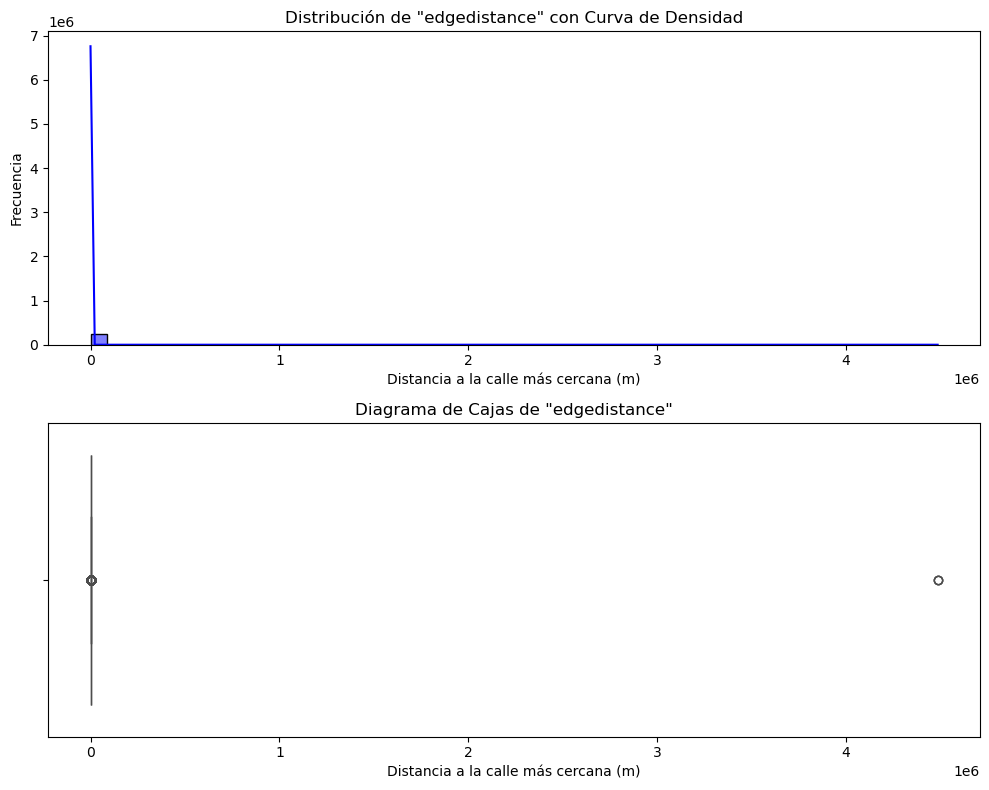

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['edgedistance'], kde=True, bins=50, color='blue')
plt.title('Distribución de "edgedistance" con Curva de Densidad')
plt.xlabel('Distancia a la calle más cercana (m)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['edgedistance'], color='orange')
plt.title('Diagrama de Cajas de "edgedistance"')
plt.xlabel('Distancia a la calle más cercana (m)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


Para empezar hay un valor tremendamente grande que no está permitiendo ver correctamente los demás datos

Efectivamente vemos un error claro de coordenadas, así que vamos a eliminarlos.

In [4]:
df_unido = df_unido[df_unido['edgedistance'] <= 2000000]

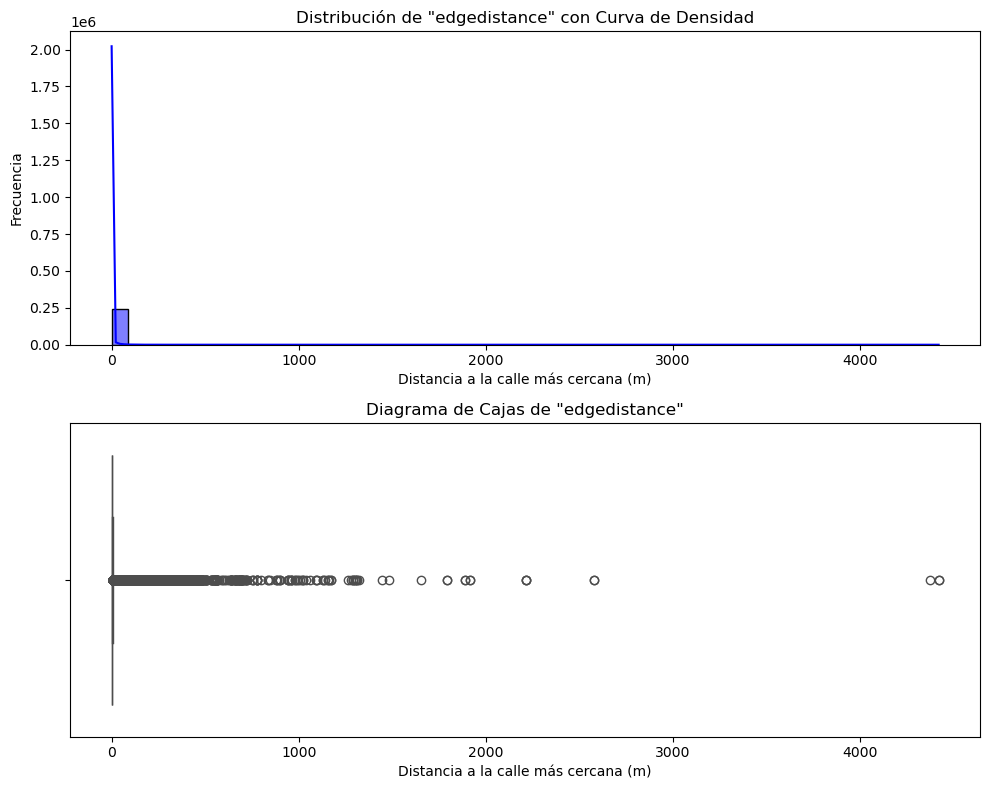

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['edgedistance'], kde=True, bins=50, color='blue')
plt.title('Distribución de "edgedistance" con Curva de Densidad')
plt.xlabel('Distancia a la calle más cercana (m)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['edgedistance'], color='orange')
plt.title('Diagrama de Cajas de "edgedistance"')
plt.xlabel('Distancia a la calle más cercana (m)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


De nuevo estamos viendo numerosos problemas. Hay que pensar que esta columna se mide en metros. Por tanto hay que desconfiar plenamente aquellos casos en los que edgedistance > 100 metros (como minimo)

In [6]:
df_unido[df_unido['edgedistance']>50][['fecha', 'hora', 'latitud', 'longitud', 'temperatura_media','precipitaciones(mm)','velocidad_media_aire', 'oneway', 'lanes', 'highway', 'maxspeed', 'reversed', 'length', 'junction', 'tunnel', 'bridge', 'edgedistance', 'nodedistance']]

fecha      hora    latitud  longitud  temperatura_media  \
83      2019-01-03  10:30:00  40.457230 -3.727509                7.3   
84      2019-01-02   8:10:00  40.354609 -3.569553                6.0   
132     2019-01-03  12:30:00  40.362426 -3.662036                7.3   
133     2019-01-03  12:30:00  40.362426 -3.662036                7.3   
331     2019-01-01   3:00:00  40.432302 -3.614783                6.6   
...            ...       ...        ...       ...                ...   
246466  2024-06-29   0:40:00  40.483706 -3.593602               20.4   
246467  2024-06-29   0:40:00  40.483706 -3.593602               20.4   
246570  2024-06-29  20:00:00  40.395414 -3.747497               20.4   
246571  2024-06-29  23:00:00  40.366340 -3.654557               20.4   
246572  2024-06-29  23:00:00  40.366340 -3.654557               20.4   

        precipitaciones(mm)  velocidad_media_aire  oneway       lanes  \
83                      0.0                   0.6    True           2   
84                      0.0                   0.6    True  ['1', '2']   
132                     0.0                   0.6    True         NaN   
133                     0.0                   0.6    True         NaN   
331                     0.0                   0.3   False         NaN   
...                     ...                   ...     ...         ...   
246466                  0.0                   4.2    True           2   
246467                  0.0                   4.2    True           2   
246570                  0.0                   4.2    True           2   
246571                  0.0                   4.2    True           2   
246572                  0.0                   4.2    True           2   

              highway maxspeed reversed   length    junction tunnel bridge  \
83           tertiary       50    False   18.178         NaN    NaN    NaN   
84      motorway_link      NaN    False  462.666         NaN    NaN    NaN   
132      unclassified      NaN    False   47.304         NaN    NaN    NaN   
133      unclassified      NaN    False   47.304         NaN    NaN    NaN   
331       residential      NaN    False   83.586         NaN    NaN    NaN   
...               ...      ...      ...      ...         ...    ...    ...   
246466       tertiary      NaN    False   47.584  roundabout    NaN    NaN   
246467       tertiary      NaN    False   47.584  roundabout    NaN    NaN   
246570      secondary       40    False   40.797  roundabout    NaN    NaN   
246571      secondary       40    False   40.797  roundabout    NaN    NaN   
246572      secondary       40    False   40.797  roundabout    NaN    NaN   

        edgedistance  nodedistance  
83        173.333654    173.333654  
84        143.217553    143.217553  
132       188.638632    188.638632  
133       188.638632    188.638632  
331        60.082122     60.082122  
...              ...           ...  
246466     64.658880     64.658880  
246467     64.658880     64.658880  
246570     64.202516     64.202516  
246571     64.202516     64.202516  
246572     64.202516     64.202516  

[2776 rows x 18 columns]

In [7]:
df_unido = df_unido[df_unido['edgedistance'] <= 100]

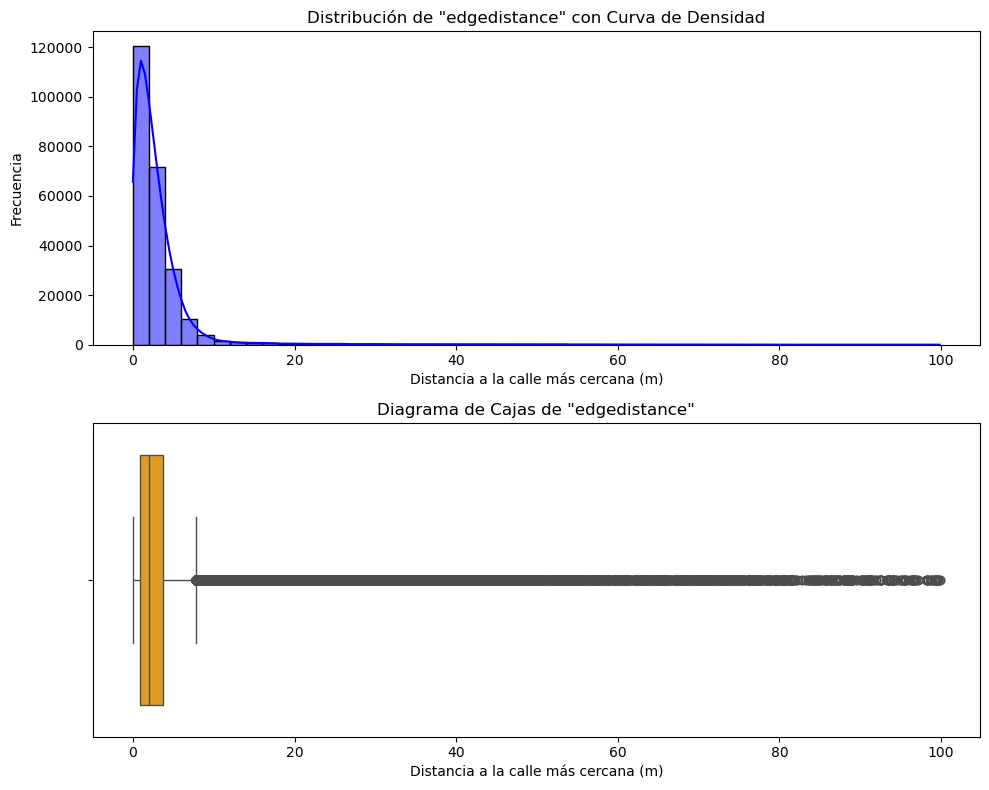

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['edgedistance'], kde=True, bins=50, color='blue')
plt.title('Distribución de "edgedistance" con Curva de Densidad')
plt.xlabel('Distancia a la calle más cercana (m)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['edgedistance'], color='orange')
plt.title('Diagrama de Cajas de "edgedistance"')
plt.xlabel('Distancia a la calle más cercana (m)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


Ya se ve algo mucho mejor. Vamos a probar a eliminar distancias mayores a 50 metros

In [9]:
df_unido = df_unido[df_unido['edgedistance'] <= 50]

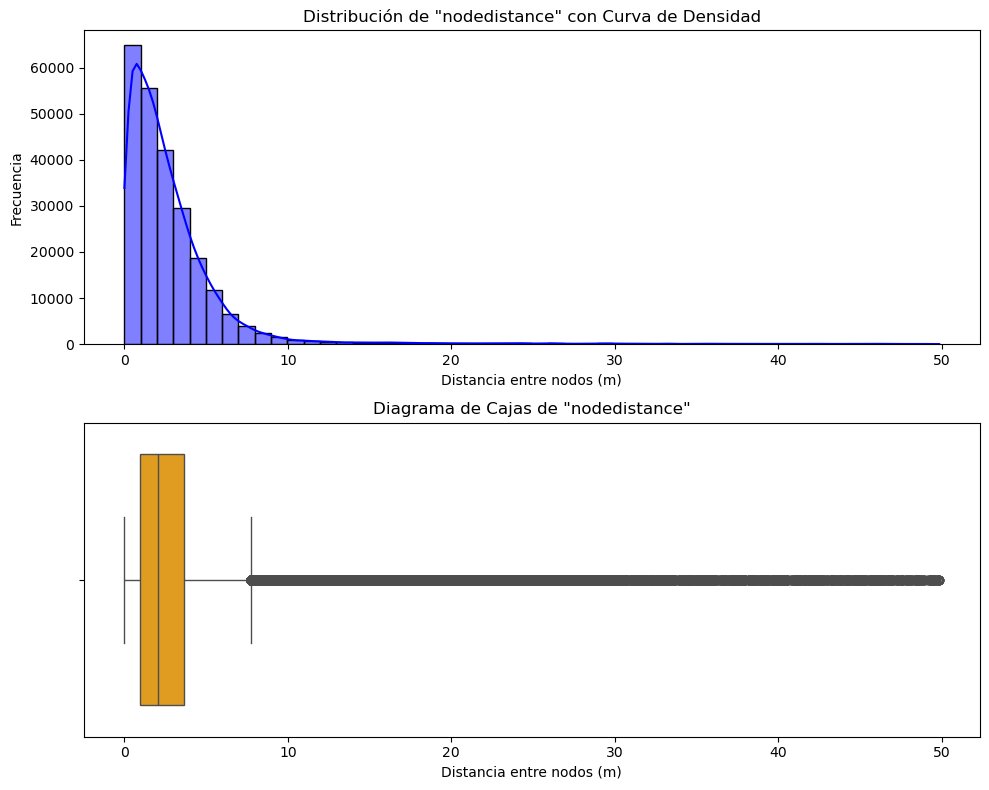

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['edgedistance'], kde=True, bins=50, color='blue')
plt.title('Distribución de "nodedistance" con Curva de Densidad')
plt.xlabel('Distancia entre nodos (m)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['edgedistance'], color='orange')
plt.title('Diagrama de Cajas de "nodedistance"')
plt.xlabel('Distancia entre nodos (m)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()


In [11]:
df_unido[df_unido['edgedistance']>10][['fecha', 'hora', 'latitud', 'longitud', 'temperatura_media','precipitaciones(mm)','velocidad_media_aire', 'oneway', 'lanes', 'highway', 'maxspeed', 'reversed', 'length', 'junction', 'tunnel', 'bridge', 'edgedistance', 'nodedistance']]

fecha      hora    latitud  longitud  temperatura_media  \
108     2019-01-01  17:00:00  40.430133 -3.643789                6.6   
109     2019-01-01  17:00:00  40.430133 -3.643789                6.6   
186     2019-01-02   7:48:00  40.393973 -3.704408                6.0   
450     2019-01-08  19:15:00  40.454026 -3.689988                7.1   
451     2019-01-08  19:15:00  40.454026 -3.689988                7.1   
...            ...       ...        ...       ...                ...   
246430  2024-06-28  19:42:00  40.450226 -3.687760               22.6   
246431  2024-06-28  19:42:00  40.450226 -3.687760               22.6   
246463  2024-06-28  19:55:00  40.374247 -3.655373               22.6   
246535  2024-06-29  17:00:00  40.406210 -3.606287               20.4   
246536  2024-06-29  17:50:00  40.442244 -3.703520               20.4   

        precipitaciones(mm)  velocidad_media_aire  oneway lanes  \
108                     0.0                   0.3    True     1   
109                     0.0                   0.3    True     1   
186                     0.0                   0.6    True     1   
450                     0.0                   0.8    True     2   
451                     0.0                   0.8    True     2   
...                     ...                   ...     ...   ...   
246430                  0.5                   2.2   False     4   
246431                  0.5                   2.2   False     4   
246463                  0.5                   2.2    True     2   
246535                  0.0                   4.2    True     4   
246536                  0.0                   4.2    True     4   

              highway      maxspeed reversed   length junction tunnel bridge  \
108       residential            40    False   71.508      NaN    NaN    NaN   
109       residential            40    False   71.508      NaN    NaN    NaN   
186     motorway_link  ['50', '40']    False  467.510      NaN    yes    NaN   
450       residential            50    False   13.843      NaN    NaN    NaN   
451       residential            50    False   13.843      NaN    NaN    NaN   
...               ...           ...      ...      ...      ...    ...    ...   
246430    residential            50    False  105.710      NaN    NaN    NaN   
246431    residential            50    False  105.710      NaN    NaN    NaN   
246463  motorway_link            50    False  495.121      NaN    NaN    NaN   
246535       tertiary           NaN    False  197.959      NaN    NaN    NaN   
246536       tertiary           NaN    False  197.959      NaN    NaN    NaN   

        edgedistance  nodedistance  
108        11.718032     11.718032  
109        11.718032     11.718032  
186        10.947683     10.947683  
450        14.653468     14.653468  
451        14.653468     14.653468  
...              ...           ...  
246430     12.681963     12.681963  
246431     12.681963     12.681963  
246463     41.147144     41.147144  
246535     14.979181     14.979181  
246536     14.979181     14.979181  

[7346 rows x 18 columns]

Echando un vistazo a algunos casos, parecen por lo general errores de coordenada. Por tanto voy a tomar como errores graves de coordenadas aquellas filas en las que la distancia a la carretera más cercana sea mayor a 20, y los voy a eliminar.

In [12]:
df_unido = df_unido[df_unido['edgedistance'] <= 20]

In [13]:
df_unido = df_unido.reset_index()


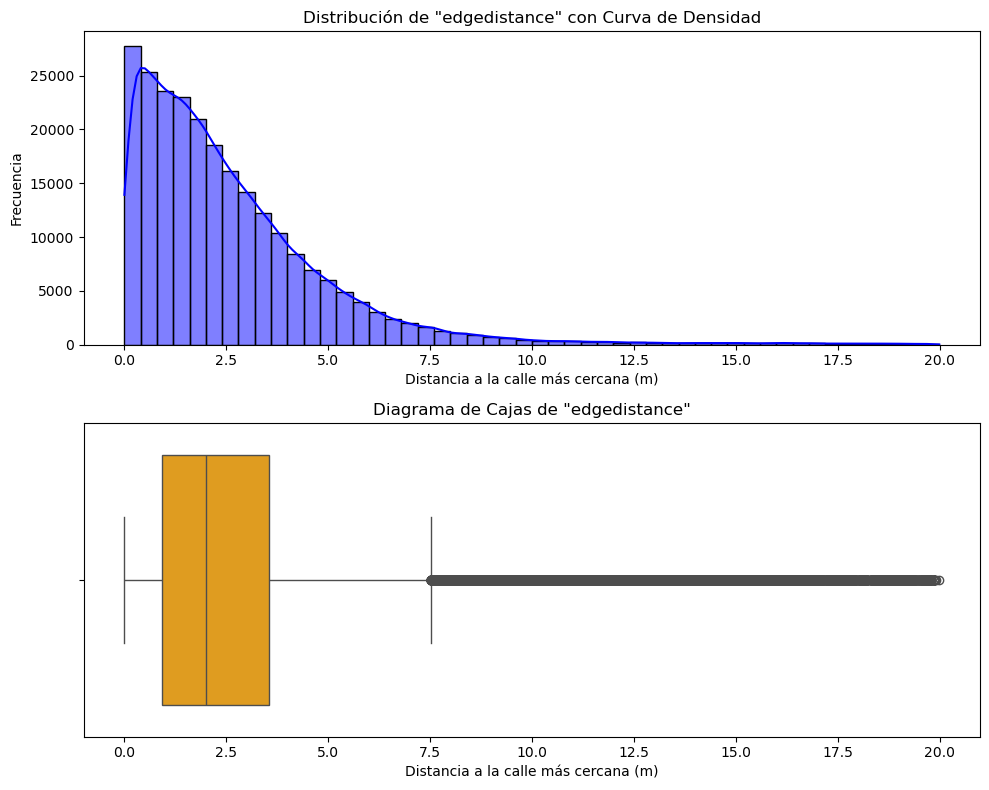

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['edgedistance'], kde=True, bins=50, color='blue')
plt.title('Distribución de "edgedistance" con Curva de Densidad')
plt.xlabel('Distancia a la calle más cercana (m)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['edgedistance'], color='orange')
plt.title('Diagrama de Cajas de "edgedistance"')
plt.xlabel('Distancia a la calle más cercana (m)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()

#### Columnas atmosféricas

Vamos a empezar con la columna de precipitaciones:

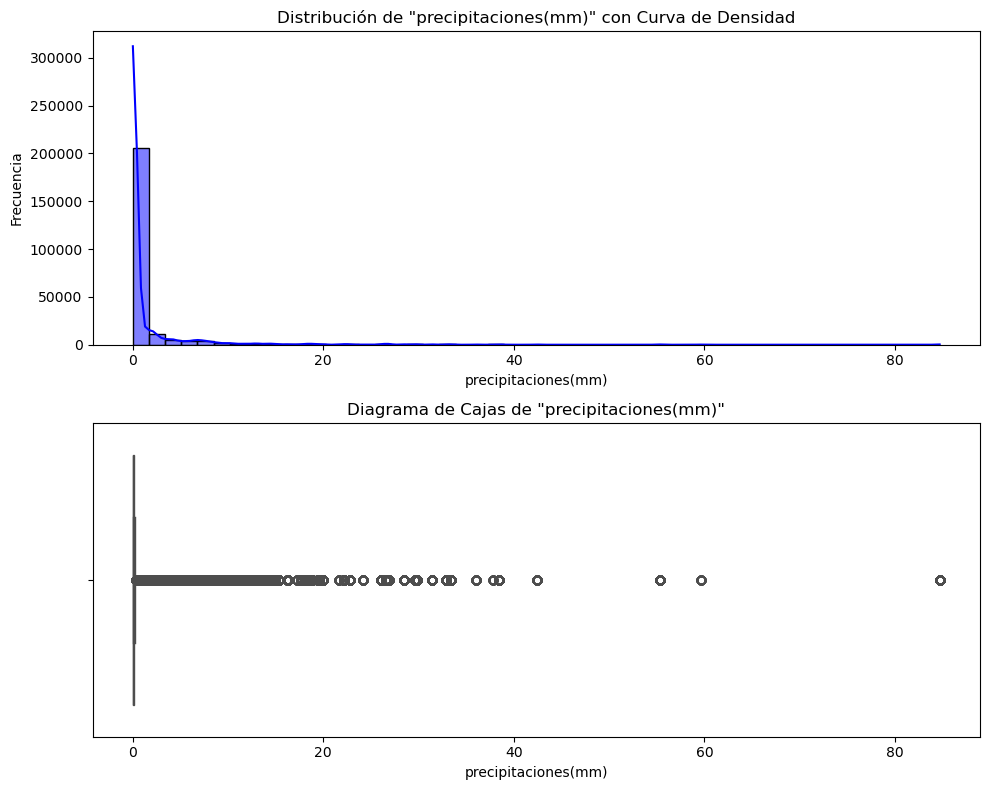

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['precipitaciones(mm)'], kde=True, bins=50, color='blue')
plt.title('Distribución de "precipitaciones(mm)" con Curva de Densidad')
plt.xlabel('precipitaciones(mm)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['precipitaciones(mm)'], color='orange')
plt.title('Diagrama de Cajas de "precipitaciones(mm)"')
plt.xlabel('precipitaciones(mm)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Temperaturas:

In [16]:
df_unido.columns

Index(['index', 'num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'longitud', 'latitud', 'osmid', 'oneway', 'lanes',
       'name', 'highway', 'maxspeed', 'reversed', 'length', 'geometry',
       'junction', 'ref', 'tunnel', 'access', 'bridge', 'width', 'est_width',
       'u_v_k', 'edgedistance', 'nodedistance', 'dia', 'mes', 'año',
       'temperatura_media', 'precipitaciones(mm)', 'velocidad_media_aire',
       'ubi'],
      dtype='object')

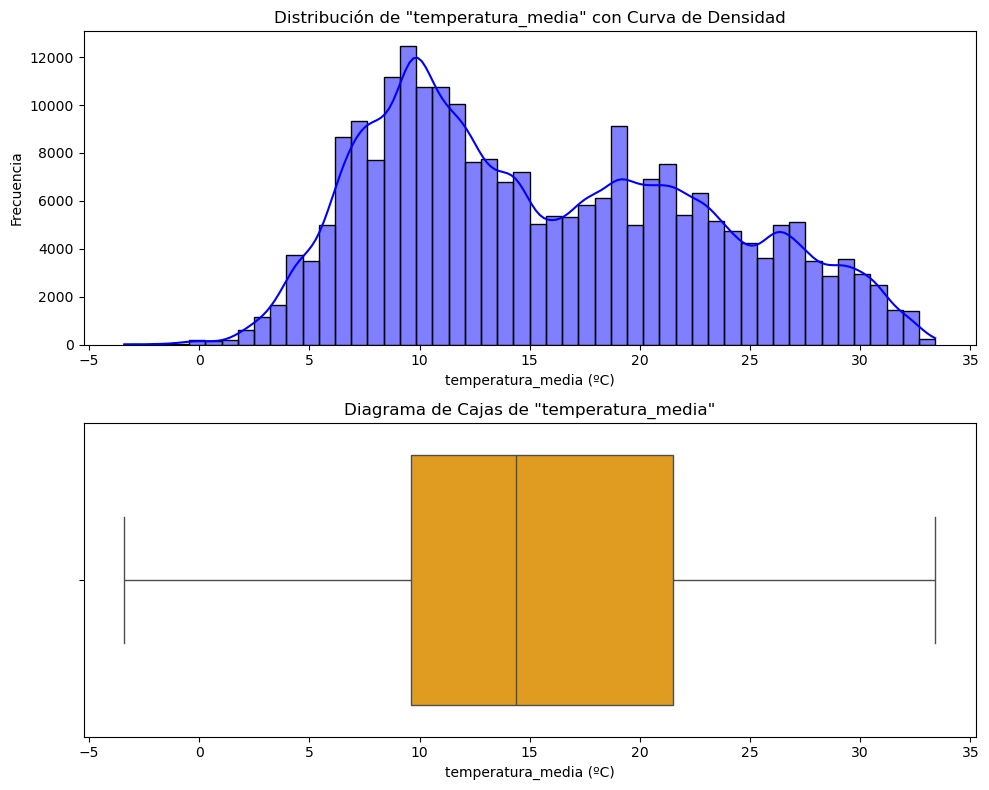

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['temperatura_media'], kde=True, bins=50, color='blue')
plt.title('Distribución de "temperatura_media" con Curva de Densidad')
plt.xlabel('temperatura_media (ºC)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['temperatura_media'], color='orange')
plt.title('Diagrama de Cajas de "temperatura_media"')
plt.xlabel('temperatura_media (ºC)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()

Y velocidad media del viento:

In [18]:
df_unido['velocidad_media_aire'].value_counts()

velocidad_media_aire
1.70    26825
1.40    25886
1.90    22227
1.10    21972
2.20    21474
2.50    20379
2.80    16959
0.80    14841
3.30    13578
3.10    11074
3.60     8489
3.90     7089
0.60     6759
4.20     4485
4.40     3680
4.70     2783
5.30     2194
0.30     2103
5.60     1608
5.00     1323
5.80      946
6.40      723
6.10      696
6.90      532
7.20      490
6.70      432
0.00      418
7.50      312
8.10      246
3.85      139
9.70       75
7.80       64
Name: count, dtype: int64

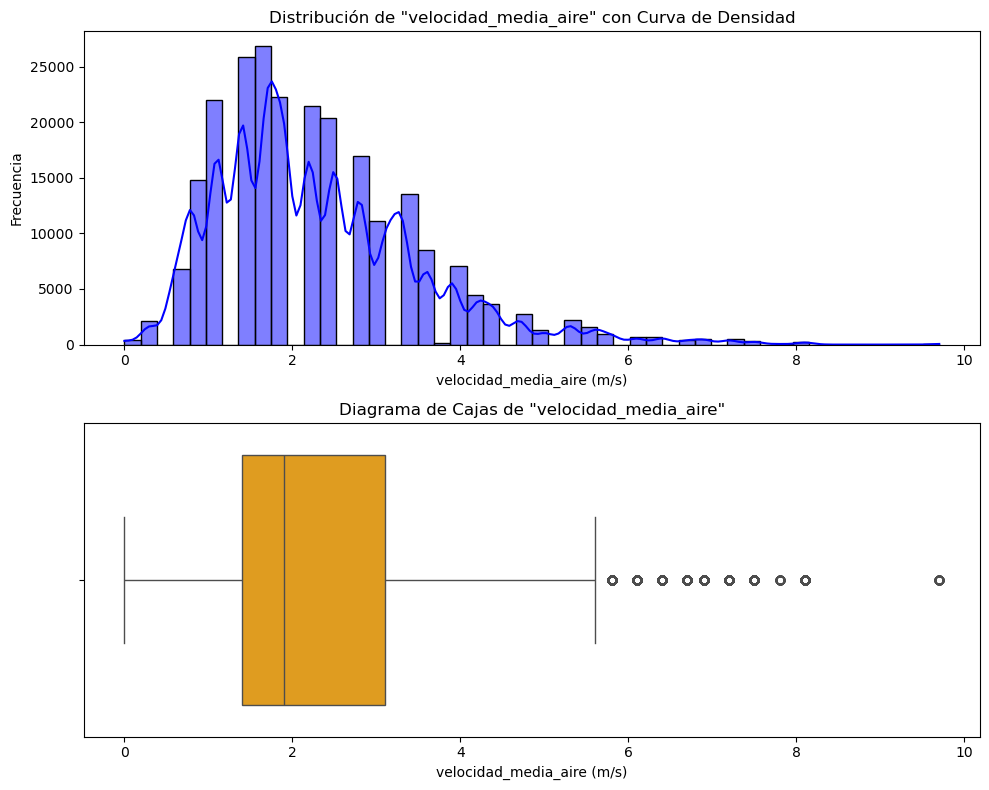

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df_unido' cargado
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Crear la figura y los subplots
plt.figure(figsize=(10, 8))

# Primer subplot: Histograma con curva de densidad
plt.subplot(2, 1, 1)
sns.histplot(df_unido['velocidad_media_aire'], kde=True, bins=50, color='blue')
plt.title('Distribución de "velocidad_media_aire" con Curva de Densidad')
plt.xlabel('velocidad_media_aire (m/s)')
plt.ylabel('Frecuencia')

# Segundo subplot: Diagrama de cajas
plt.subplot(2, 1, 2)
sns.boxplot(x=df_unido['velocidad_media_aire'], color='orange')
plt.title('Diagrama de Cajas de "velocidad_media_aire"')
plt.xlabel('velocidad_media_aire (m/s)')

# Ajustar el layout
plt.tight_layout()

# Mostrar las gráficas
plt.show()

En general, no parece que haya valores erróneos. Si bien es cierto que hay outliers cuya probabilidad de pertenecer a la función de distribución estadística es baja, pero esto no significa que sean errores de obtención de estos datos. Por ejemplo en las precipitaciones existen datos mayores a 80mm. Esto son precipitaciones que si bien son muy altas, pueden ser perfectamente posibles en días torrenciales de tormenta.

### Formato columnas y tratamiento nulos:

Ahora que los principales outliers han sido eliminados, vamos a tratar el formato de varias columnas así como de sus nulos

Empezamos con la columna 'lanes' o carriles de la carretera o calle:

In [20]:
df_unido['lanes'].value_counts()

lanes
2                       63693
1                       34111
3                       33876
4                       28680
6                        6612
5                        5624
['4', '3']               3828
['2', '3']               3731
['1', '2']               2595
['4', '5']                917
['4', '5', '6']           546
['5', '6']                488
['4', '2']                458
['1', '2', '3']           329
['4', '2', '3']           240
['4', '5', '3']           218
7                         217
['4', '6']                142
['1', '3']                103
8                          85
['4', '1']                 77
['5', '6', '3']            63
['6', '3']                 47
['5', '3']                 34
['5', '2']                 29
['1', '2', '4', '3']       17
['7', '6']                 13
Name: count, dtype: int64

Vemos que hay listas de carriles, sin saber qué son, vamos a mirar las coordenadas con google maps e intentar mirar las carreteras y sacar una conclusión.

In [21]:
df_unido[df_unido['lanes'] == "['4', '3']"][['latitud', 'longitud', 'highway', 'maxspeed']]

latitud  longitud   highway      maxspeed
282     40.383645 -3.685523  motorway            90
283     40.383645 -3.685523  motorway            90
284     40.383645 -3.685523  motorway            90
677     40.423960 -3.688185   primary           NaN
678     40.423960 -3.688185   primary           NaN
...           ...       ...       ...           ...
240255  40.415198 -3.660109  motorway            90
240414  40.393603 -3.705907     trunk            50
240415  40.393603 -3.705907     trunk            50
240416  40.393603 -3.705907     trunk            50
240740  40.432746 -3.650328  motorway  ['90', '70']

[3828 rows x 4 columns]

Echando un vistazo, parece que las listas de carriles parece indicar que pueden ser (en el caso de ['4','3']) de 3 o 4 carriles, sin especificar cual es cada tipo. Por tanto, una posible solución a este problema es suponer o aproximar que la distribución de carriles cuando hay listas de carriles es uniforme, y que por tanto podemos usar la media para estos carriles. Posteriormente se podrá redondear a la unidad.


In [22]:
import pandas as pd
import ast


# Función para reemplazar las cadenas de listas por el promedio
cache=[]
def replace_string_lists_with_average(value):
    global cache
    try:
        # Intentar convertir el valor a una lista (si es un string que parece lista)
        if isinstance(value, str) and value.startswith('['):
            # Convertir el string a una lista real

            value = ast.literal_eval(str(value))
            # Convertir los elementos de la lista a números flotantes
            value = [float(v) for v in value]
            # Calcular el promedio
            if str(value) not in cache:
                print("\n-----------------------------\n")
                print(value)
                print(f"Pasa a : {sum(value) / len(value)}")
            cache.append(str(value))
            return sum(value) / len(value)
        else:
            # Si no es una lista, devolver el valor original
            return float(value)
    except (ValueError, SyntaxError):
        return value

# Aplicar la función en la columna 'lanes'

# Mostrar el DataFrame actualizado

df_unido['lanes'] = df_unido['lanes'].apply(replace_string_lists_with_average)
print(f"-----------------------------------\n {df_unido['lanes'].value_counts()}")



-----------------------------

[2.0, 3.0]
Pasa a : 2.5

-----------------------------

[1.0, 2.0]
Pasa a : 1.5

-----------------------------

[4.0, 3.0]
Pasa a : 3.5

-----------------------------

[4.0, 5.0, 6.0]
Pasa a : 5.0

-----------------------------

[5.0, 6.0]
Pasa a : 5.5

-----------------------------

[4.0, 2.0]
Pasa a : 3.0

-----------------------------

[4.0, 2.0, 3.0]
Pasa a : 3.0

-----------------------------

[4.0, 1.0]
Pasa a : 2.5

-----------------------------

[4.0, 5.0]
Pasa a : 4.5

-----------------------------

[1.0, 2.0, 3.0]
Pasa a : 2.0

-----------------------------

[4.0, 6.0]
Pasa a : 5.0

-----------------------------

[5.0, 3.0]
Pasa a : 4.0

-----------------------------

[5.0, 2.0]
Pasa a : 3.5

-----------------------------

[4.0, 5.0, 3.0]
Pasa a : 4.0

-----------------------------

[6.0, 3.0]
Pasa a : 4.5

-----------------------------

[1.0, 3.0]
Pasa a : 2.0

-----------------------------

[5.0, 6.0, 3.0]
Pasa a : 4.666666666666667

--------

Aprovechamos ya que también ocurre con la maxspeed:

In [23]:
import pandas as pd
import ast


# Función para reemplazar las cadenas de listas por el promedio
cache=[]
def replace_string_lists_with_average(value):
    global cache
    try:
        # Intentar convertir el valor a una lista (si es un string que parece lista)
        if isinstance(value, str) and value.startswith('['):
            # Convertir el string a una lista real

            value = ast.literal_eval(str(value))
            # Convertir los elementos de la lista a números flotantes
            value = [float(v) for v in value]
            # Calcular el promedio
            if str(value) not in cache:
                print("\n-----------------------------\n")
                print(value)
                print(f"Pasa a : {sum(value) / len(value)}")
            cache.append(str(value))
            return sum(value) / len(value)
        if value == '50|30':
            return 40.0
        else:
            # Si no es una lista, devolver el valor original
            return float(value)
    except (ValueError, SyntaxError):
        return value

# Aplicar la función en la columna 'lanes'

# Mostrar el DataFrame actualizado

df_unido['maxspeed'] = df_unido['maxspeed'].apply(replace_string_lists_with_average)
#df_unido['maxspeed'] = df_unido['maxspeed'].apply(replace_string_lists_with_average)
print(f"-----------------------------------\n {df_unido['maxspeed'].value_counts()}")



-----------------------------

[60.0, 40.0]
Pasa a : 50.0

-----------------------------

[50.0, 40.0]
Pasa a : 45.0

-----------------------------

[50.0, 30.0]
Pasa a : 40.0

-----------------------------

[50.0, 40.0, 80.0, 70.0]
Pasa a : 60.0

-----------------------------

[50.0, 70.0]
Pasa a : 60.0

-----------------------------

[60.0, 80.0, 90.0]
Pasa a : 76.66666666666667

-----------------------------

[80.0, 70.0]
Pasa a : 75.0

-----------------------------

[20.0, 40.0]
Pasa a : 30.0

-----------------------------

[30.0, 40.0]
Pasa a : 35.0

-----------------------------

[60.0, 80.0, 100.0]
Pasa a : 80.0

-----------------------------

[60.0, 80.0]
Pasa a : 70.0

-----------------------------

[30.0, 20.0]
Pasa a : 25.0

-----------------------------

[50.0, 80.0]
Pasa a : 65.0

-----------------------------

[90.0, 70.0]
Pasa a : 80.0

-----------------------------

[50.0, 60.0]
Pasa a : 55.0

-----------------------------

[80.0, 90.0]
Pasa a : 85.0

-----------------

Así arreglamos este problema. Ahora vamos a por los valores nulos:

In [24]:
df_unido['lanes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: lanes
Non-Null Count   Dtype  
--------------   -----  
186773 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Vemos que hay unos ~50k valores nulos. La primera idea es tratar de asignar carriles en función del tipo de vía.

In [25]:
import numpy as np
df_unido[np.isnan(df_unido['lanes'])]['highway'].unique()

array(['residential', 'unclassified', 'busway', 'tertiary',
       'tertiary_link', 'secondary', 'motorway_link', 'living_street',
       "['living_street', 'residential']",
       "['residential', 'trunk_link']", 'secondary_link', 'primary',
       'trunk', 'primary_link', "['unclassified', 'residential']",
       'trunk_link', "['unclassified', 'motorway_link']",
       "['residential', 'motorway_link']", 'motorway',
       "['residential', 'tertiary']"], dtype=object)

In [26]:
df_unido[np.array(np.isnan(df_unido['lanes'])) * np.array(np.array(df_unido['name'] == 'Calle del Pavo Real') * np.array(~np.isnan(df_unido['maxspeed'])))]['maxspeed'].value_counts()

Series([], Name: count, dtype: int64)

C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_7548\3987258188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['bins_lanes'] = pd.cut(df_filtrado['lanes'], bins=bins, right=False, labels=labels)


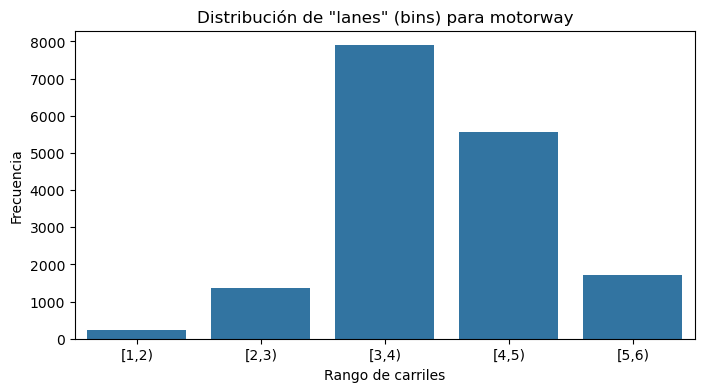

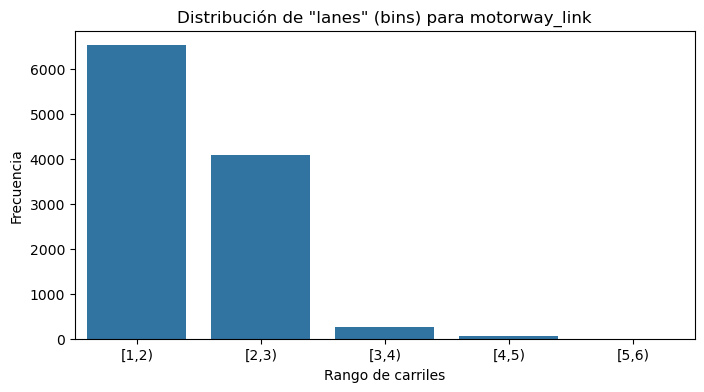

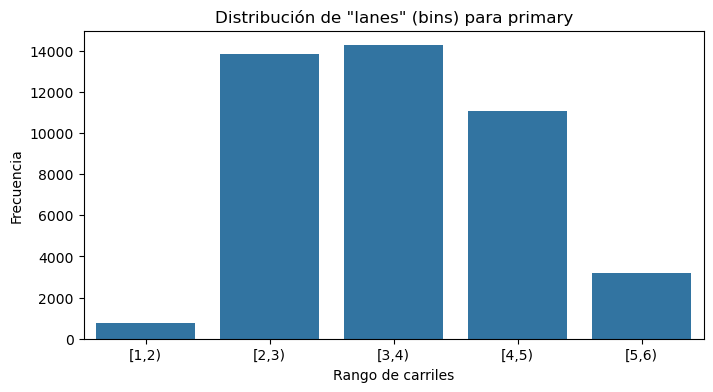

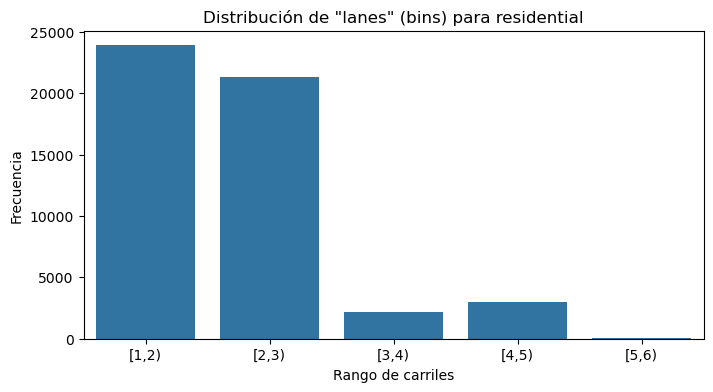

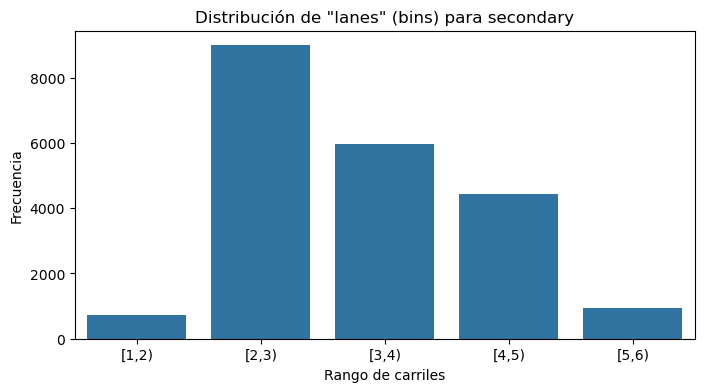

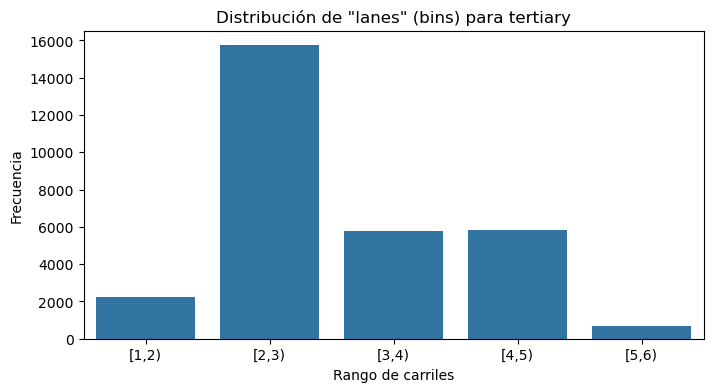

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu dataframe 'df' cargado
df = df_unido.copy()
# Filtrar los valores relevantes de la columna 'highway'
valores_highway = ['residential', 'primary', 'tertiary', 'secondary', 'motorway', 'motorway_link']
df_filtrado = df[df['highway'].isin(valores_highway)]

# Definir los límites de los bins para los valores de 'lanes'
bins = [1, 2, 3, 4, 5, 6]
labels = ['[1,2)', '[2,3)', '[3,4)', '[4,5)', '[5,6)']

# Discretizar la columna 'lanes' usando los bins definidos
df_filtrado['bins_lanes'] = pd.cut(df_filtrado['lanes'], bins=bins, right=False, labels=labels)

# Graficar la distribución de los bins de 'lanes' por cada valor de 'highway'
for highway, group in df_filtrado.groupby('highway'):
    plt.figure(figsize=(8, 4))
    
    # Conteo de la frecuencia de los valores de 'lanes' por cada bin
    sns.countplot(data=group, x='bins_lanes')
    
    plt.title(f'Distribución de "lanes" (bins) para {highway}')
    plt.xlabel('Rango de carriles')
    plt.ylabel('Frecuencia')
    
    plt.show()



Vemos que existen claras diferencias entre las distribuciones. Aun así, hay distribuciones en las que no se identifica de forma clara una mejor forma para rellenar los datos (la idea era escoger un número de carriles en función de la distribución de carriles).

In [28]:
df_unido['maxspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: maxspeed
Non-Null Count   Dtype  
--------------   -----  
148646 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [29]:
df_unido[np.isnan(df_unido['lanes'])]['maxspeed'].info()

<class 'pandas.core.series.Series'>
Index: 54028 entries, 8 to 240787
Series name: maxspeed
Non-Null Count  Dtype  
--------------  -----  
15485 non-null  float64
dtypes: float64(1)
memory usage: 844.2 KB


Hay 16k de nulos en los datos de velocidad para cuando los datos de carriles son nulos. Por tanto vamos a usar reglas de tráfico para rellenar los datos de los carriles. Antes de hacer esto, he visto tipos de carretera con velocidades equivocadas, por tanto voy a intentar rellenar o cambiar aquellos datos que ya se tienen pero que por reglas de tráfico no pueden ser.

In [30]:
df_unido['highway'].value_counts()

highway
residential                                     92734
primary                                         47080
tertiary                                        36463
secondary                                       26287
motorway                                        16788
motorway_link                                   11830
trunk                                            2265
living_street                                    1768
primary_link                                     1015
unclassified                                      829
['motorway', 'motorway_link']                     641
tertiary_link                                     589
secondary_link                                    528
['living_street', 'residential']                  315
busway                                            212
trunk_link                                        197
['residential', 'tertiary']                       189
['motorway', 'trunk']                             104
['unclassified', 're

Antes de esto vamos a mejorar los datos de las velocidades segun reglas de tráfico para todo el dataset. Para esto debemos mapear la columna del tipo de highway:

In [31]:
import pandas as pd
import ast

# Definir el orden de prioridad
highway_priority = ['residential', 'primary', 'tertiary', 'secondary', 'motorway']

# Función para mapear el tipo de carretera
def map_highway(highway):
    try:
        # Verificar si es una cadena que parece una lista
        if isinstance(highway, str) and highway.startswith('['):
            highway = ast.literal_eval(highway)
        
        # Si no es una lista, devolver el valor tal cual
        if isinstance(highway, str):
            return highway
        
        # Si es una lista, eliminar los valores que contienen '_link'
        non_link_highways = [h for h in highway if '_link' not in h]
        
        # Si hay highways que no sean '_link', devolver el de mayor prioridad
        if non_link_highways:
            return sorted(non_link_highways, key=lambda x: highway_priority.index(x) if x in highway_priority else float('inf'))[0]
        
        # Si solo hay '_link', devolver el de mayor prioridad de la lista original
        return sorted(highway, key=lambda x: highway_priority.index(x.split('_')[0]) if x.split('_')[0] in highway_priority else float('inf'))[0]
    
    except (ValueError, SyntaxError, TypeError):
        # Si ocurre algún error (por ejemplo, si no es una lista válida o hay valores no esperados), devolver NaN
        return None

# Aplicar la función a la columna 'highway' en tu DataFrame
df_unido['mapped_highway'] = df_unido['highway'].apply(map_highway)

# Mostrar la distribución de los valores mapeados
print(df_unido['mapped_highway'].value_counts())



mapped_highway
residential       93429
primary           47257
tertiary          36710
secondary         26410
motorway          17611
motorway_link     11902
trunk              2268
living_street      1768
primary_link       1038
unclassified        866
tertiary_link       605
secondary_link      528
busway              212
trunk_link          197
Name: count, dtype: int64


Ahora sí vamos con las velocidades:

In [32]:
def assign_speed_limit(highway, lanes, oneway, maxspeed):
    # Reglas de velocidad máxima por tipo de carretera
    if not np.isnan(lanes):
        if np.isnan(maxspeed):
            cond = 0
        else:
            cond = 1
        if highway == 'residential':
            if lanes == 1 or (oneway == False and lanes == 2):
                return 30 if maxspeed >= 40 or cond == 0 else maxspeed
            elif lanes > 1:
                return 50
        elif highway == 'living_street':
            return 30 if maxspeed > 30 or cond == 0  else maxspeed
        elif highway in ['primary', 'secondary', 'tertiary']:
            if lanes == 1 or (oneway == False and lanes == 2):
                return 30 if maxspeed < 50 or cond == 0 else maxspeed
            elif lanes > 1:
                return 50 if highway == 'tertiary' else maxspeed
        elif highway == 'motorway':
            return 80 if maxspeed < 70 or cond == 0 else maxspeed # Dentro de ciudad, 120 fuera
        elif highway in ['motorway_link', 'primary_link', 'trunk_link', 'secondary_link', 'tertiary_link']:
            return 40 if maxspeed < 40 or cond == 0 else maxspeed
        elif highway == 'trunk':
            if lanes == 1 or (oneway == False and lanes == 2):
                return 70 if maxspeed < 70 or cond == 0 else maxspeed
            else:
                return 80 if maxspeed < 80 or cond == 0 else maxspeed
        elif highway == 'unclassified':
            return maxspeed if not cond == 0 else 30
        elif highway == 'busway':
            if lanes == 1 or (oneway == False and lanes == 2):
                return 30 if maxspeed > 40 or cond == 0 else maxspeed
            elif lanes > 1:
                return 50 if maxspeed < 30 or cond == 0 else maxspeed
        else:
            # Default si no encaja en ninguna categoría
            return 30 if cond == 0 else maxspeed
    else:
        return maxspeed

# Aplicar la función al DataFrame
df_unido['speed_limit'] = df_unido.apply(lambda row: assign_speed_limit(row['mapped_highway'], row['lanes'], row['oneway'], row['maxspeed']), axis=1)
print(f"ANTES: \n {df_unido['maxspeed'].value_counts()}")
print(f"ANTES: \n {df_unido['maxspeed'].info()}")
print(f"AHORA: \n {df_unido['speed_limit'].value_counts()}")
print(f"AHORA: \n {df_unido['speed_limit'].info()}")

ANTES: 
 maxspeed
50.000000     91751
30.000000     22718
90.000000     10271
40.000000      9157
70.000000      5859
60.000000      2188
20.000000      2080
80.000000      1777
45.000000       715
100.000000      447
85.000000       427
55.000000       400
75.000000       249
35.000000       200
25.000000        89
65.000000        86
76.666667        79
10.000000        61
53.333333        41
120.000000       27
95.000000         9
105.000000        8
110.000000        7
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: maxspeed
Non-Null Count   Dtype  
--------------   -----  
148646 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
ANTES: 
 None
AHORA: 
 speed_limit
50.000000     103071
30.000000      48443
90.000000      10271
40.000000       8717
70.000000       5838
80.000000       5431
20.000000       1755
60.000000       1642
45.000000        558
100.000000       447
85.000000        427
75.000000        

Hemos rellenado todas las velocidades de las carreteras en las que conociamos el numero de carriles, su sentido y el tipo de carretera siguiendo las reglas de tráfico españolas para vías urbanas.

In [33]:
df_unido[np.isnan(df_unido['lanes'])]['speed_limit'].info()

<class 'pandas.core.series.Series'>
Index: 54028 entries, 8 to 240787
Series name: speed_limit
Non-Null Count  Dtype  
--------------  -----  
15485 non-null  float64
dtypes: float64(1)
memory usage: 844.2 KB


In [34]:
df_unido['lanes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: lanes
Non-Null Count   Dtype  
--------------   -----  
186773 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Ahora vamos a hacerlo al revés, sabiendo la velocidad máxima, el tipo de vía y si el sentido, vamos a intentar rellenar el número de carriles.

In [35]:
df_unido['speed_limit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: speed_limit
Non-Null Count   Dtype  
--------------   -----  
187386 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [36]:
import pandas as pd
import numpy as np

def fill_lanes(df):
    # Paso 1: Definir los bins de velocidad máxima (de 20 en 20 hasta 120)
    bins = list(range(0, 141, 20))  # Bins: [0, 20, 40, 60, 80, 100, 120, 140]
    labels = bins[:-1]  # Labels para identificar los intervalos, sin incluir el último límite

    # Crear columna con los bins de velocidad máxima
    df['speed_bin'] = pd.cut(df['speed_limit'], bins=bins, labels=labels, include_lowest=True, right=False)

    # Paso 2: Calcular la media de carriles según 'mapped_highway', 'speed_bin' y 'oneway'
    group_means = df.groupby(['mapped_highway', 'speed_bin', 'oneway'])['lanes'].mean().round()

    # Paso 3: Crear una función para asignar valores de carriles utilizando los valores agrupados
    def assign_lanes(row):
        # Si la velocidad máxima es NaN, devolver NaN
        if np.isnan(row['speed_limit']):
            return np.nan
        
        # Si 'lanes' ya tiene un valor, devolverlo tal cual
        if not np.isnan(row['lanes']):
            return row['lanes']
        
        # Obtener la media pre-calculada del grupo correspondiente
        key = (row['mapped_highway'], row['speed_bin'], row['oneway'])
        lanes_value = group_means.get(key, np.nan)

        # Asignar valores por defecto si no se encuentra la media y hay información sobre 'oneway'
        if np.isnan(lanes_value):
            if row['oneway'] == False:
                return 1
            elif row['oneway'] == True:
                return 2

        # Devolver el valor calculado
        return lanes_value

    # Paso 4: Aplicar la asignación de manera vectorizada
    df['lanes_filled'] = df.apply(assign_lanes, axis=1)

    return df

# Aplicar la función al DataFrame
df_unido = fill_lanes(df_unido)

print(df_unido['lanes_filled'].value_counts())
print(df_unido['lanes_filled'].info())





C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_7548\2693244624.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby(['mapped_highway', 'speed_bin', 'oneway'])['lanes'].mean().round()


lanes_filled
2.000000    64237
1.000000    38071
3.000000    33218
4.000000    27836
5.000000     6383
6.000000     6050
3.500000     3790
2.500000     3495
1.500000     2572
4.500000      944
5.500000      418
7.000000      217
8.000000       79
4.666667       63
6.500000       13
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: lanes_filled
Non-Null Count   Dtype  
--------------   -----  
187386 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
None


In [37]:
df_unido['speed_limit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 240801 entries, 0 to 240800
Series name: speed_limit
Non-Null Count   Dtype  
--------------   -----  
187386 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Ahora hemos rellenado de forma completa aquellos pares (velocidad maxima, carriles) en los que habia nan en solo uno de ellos. Ahora debemos rellenar aquellos pares en los que hay valores de NaN para ambos.

Para hacer esto se podría usar un método sofisticado, como por ejemplo usando algoritmos de ML no supervisado (KNN imputer), o mediante regresión. Para hacer esto necesitaría hacer uso de varias características sobre la carretera, pero como apenas se tienen características sobre la carretera, esta solución deja de tener sentido. Por tanto vamos a imputar la mediana.

In [38]:
# Imputar 'lanes_filled' utilizando la mediana por 'highway' y 'oneway'
df_unido['lanes_filled'] = df_unido.groupby(['highway', 'oneway'])['lanes_filled'].transform(lambda x: x.fillna(x.median()))

# Imputar los valores restantes con la mediana general
df_unido['lanes_filled'] = df_unido['lanes_filled'].fillna(df_unido['lanes_filled'].median())

# Imputar 'speed_limit' utilizando la mediana por 'highway' y 'oneway'
df_unido['speed_limit'] = df_unido.groupby(['highway', 'oneway'])['speed_limit'].transform(lambda x: x.fillna(x.median()))

# Imputar los valores restantes con la mediana general
df_unido['speed_limit'] = df_unido['speed_limit'].fillna(df_unido['speed_limit'].median())

In [39]:
df_unido[['highway', 'oneway', 'lanes_filled', 'speed_limit']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240801 entries, 0 to 240800
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   highway       240801 non-null  object 
 1   oneway        240801 non-null  bool   
 2   lanes_filled  240801 non-null  float64
 3   speed_limit   240801 non-null  float64
dtypes: bool(1), float64(2), object(1)
memory usage: 5.7+ MB


In [40]:
df_unido[['fecha', 'hora', 'coordenada_x_utm', 'coordenada_y_utm', 'temperatura_media','precipitaciones(mm)','velocidad_media_aire', 'oneway', 'lanes_filled', 'highway', 'speed_limit', 'reversed', 'length', 'junction', 'tunnel', 'bridge', 'edgedistance', 'nodedistance']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240801 entries, 0 to 240800
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fecha                 240801 non-null  object 
 1   hora                  240801 non-null  object 
 2   coordenada_x_utm      240801 non-null  float64
 3   coordenada_y_utm      240801 non-null  float64
 4   temperatura_media     240801 non-null  float64
 5   precipitaciones(mm)   240801 non-null  float64
 6   velocidad_media_aire  240801 non-null  float64
 7   oneway                240801 non-null  bool   
 8   lanes_filled          240801 non-null  float64
 9   highway               240801 non-null  object 
 10  speed_limit           240801 non-null  float64
 11  reversed              240801 non-null  object 
 12  length                240801 non-null  float64
 13  junction              6276 non-null    object 
 14  tunnel                11803 non-null   object 
 15  

Ahora vamos a tratar de visualizar estas columnas antes y después de rellenar valores.

#### Columna 'maxspeed'

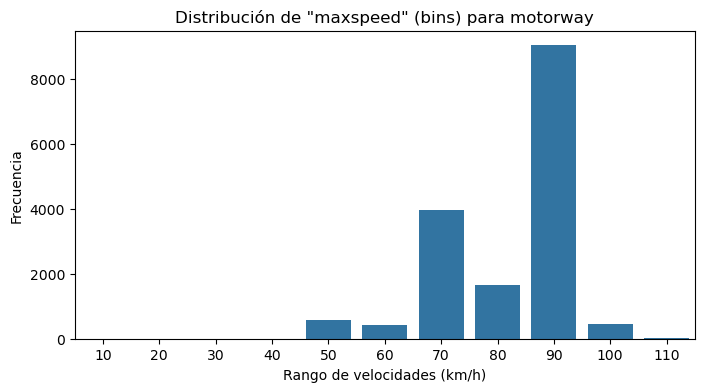

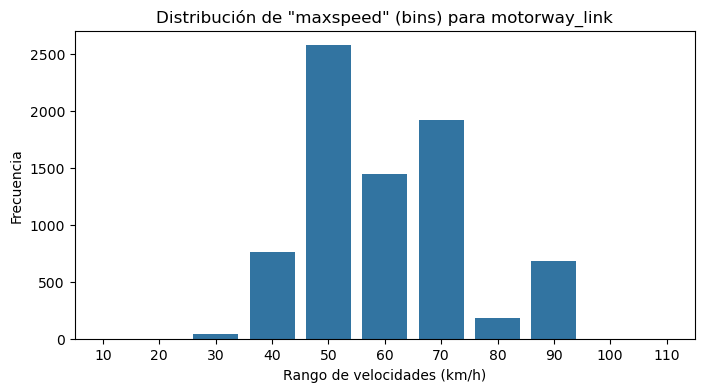

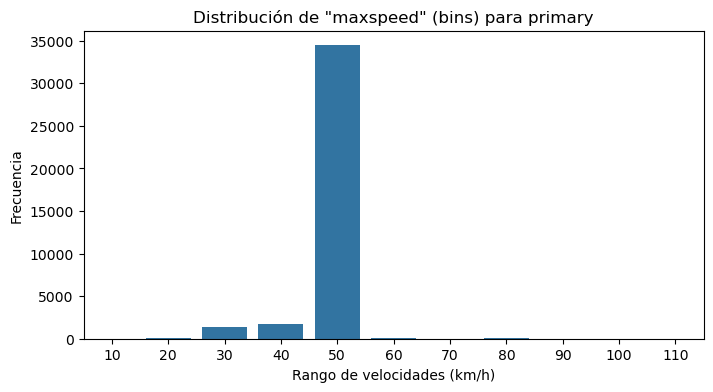

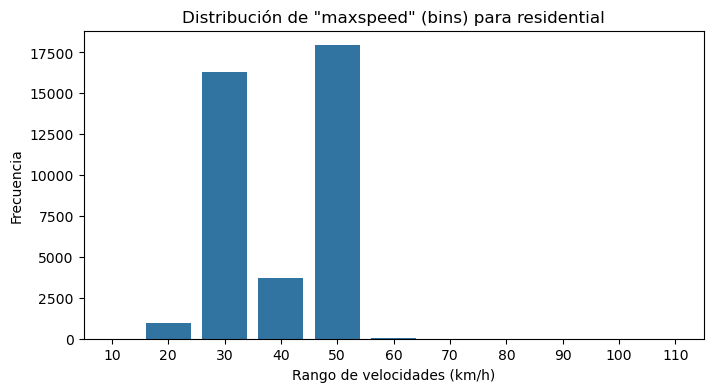

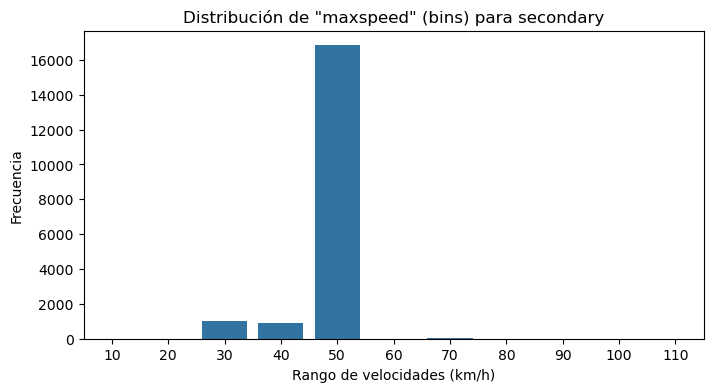

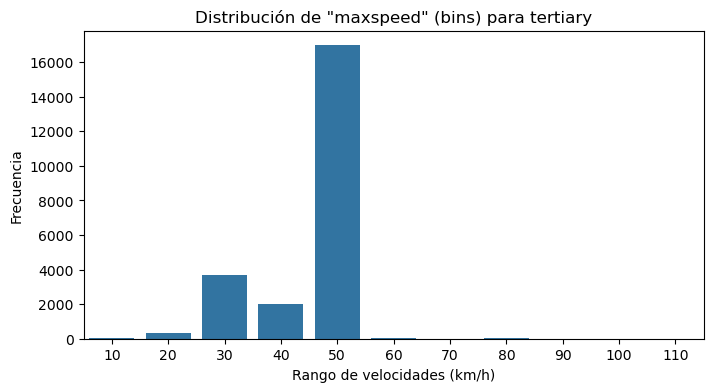

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu dataframe 'df' cargado
df = df_unido.copy()
# Filtrar los valores relevantes de la columna 'highway'
valores_highway = ['residential', 'primary', 'tertiary', 'secondary', 'motorway', 'motorway_link']
df_filtrado = df[df['highway'].isin(valores_highway)]

# Manejar valores nulos en 'maxspeed'
df_filtrado = df_filtrado[df_filtrado['maxspeed'].notna()]

# Definir los límites de los bins para los valores de 'maxspeed'
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = list(range(10, 120, 10))  # Etiquetas numéricas (10, 20, ..., 110) para 11 bins

# Discretizar la columna 'maxspeed' usando los bins definidos
df_filtrado['bins_maxspeed'] = pd.cut(df_filtrado['maxspeed'], bins=bins, right=False, labels=labels)

# Graficar la distribución de los bins de 'maxspeed' por cada valor de 'highway'
for highway, group in df_filtrado.groupby('highway'):
    plt.figure(figsize=(8, 4))
    
    # Conteo de la frecuencia de los valores de 'maxspeed' por cada bin
    sns.countplot(data=group, x='bins_maxspeed')
    
    plt.title(f'Distribución de "maxspeed" (bins) para {highway}')
    plt.xlabel('Rango de velocidades (km/h)')
    plt.ylabel('Frecuencia')
    
    plt.show()






In [42]:
df_unido.head(3)

index num_expediente       fecha     hora  \
0      0    2018S017842  2019-02-04  9:10:00   
1      1    2018S017842  2019-02-04  9:10:00   
2      2    2019S000001  2019-01-01  3:45:00   

                                        localizacion numero  cod_distrito  \
0                          CALL. ALBERTO AGUILERA, 1      1           1.0   
1                          CALL. ALBERTO AGUILERA, 1      1           1.0   
2  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   

      distrito    tipo_accidente estado_meteorológico  ...  mes     año  \
0       CENTRO  Colisión lateral            Despejado  ...  2.0  2019.0   
1       CENTRO  Colisión lateral            Despejado  ...  2.0  2019.0   
2  CARABANCHEL           Alcance                  NaN  ...  1.0  2019.0   

  temperatura_media precipitaciones(mm)  velocidad_media_aire            ubi  \
0               4.8                 0.0                   0.8  MADRID RETIRO   
1               4.8                 0.0                   0.8  MADRID RETIRO   
2               6.6                 0.0                   0.3  MADRID RETIRO   

   mapped_highway  speed_limit speed_bin  lanes_filled  
0         primary         50.0        40           4.0  
1         primary         50.0        40           4.0  
2         primary         50.0        40           2.0  

[3 rows x 52 columns]

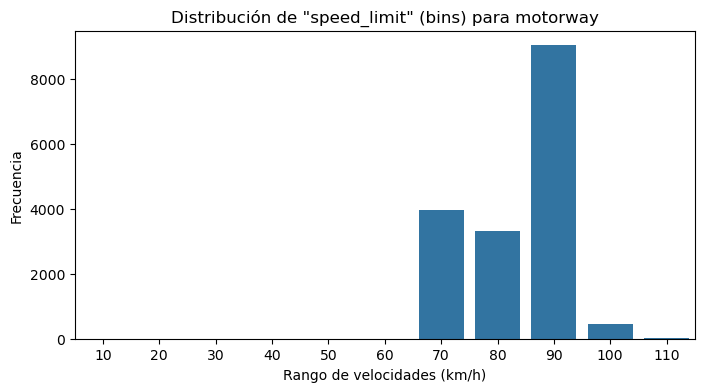

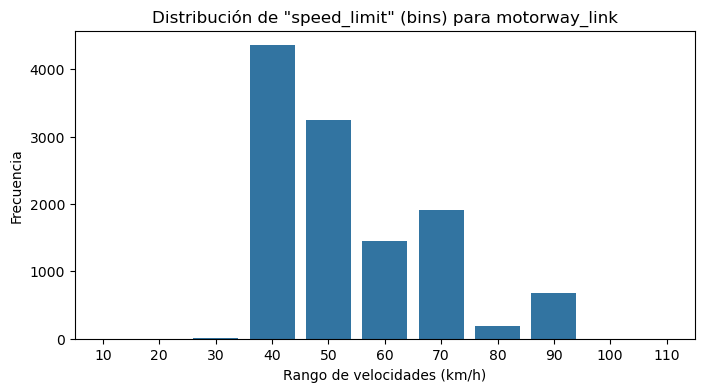

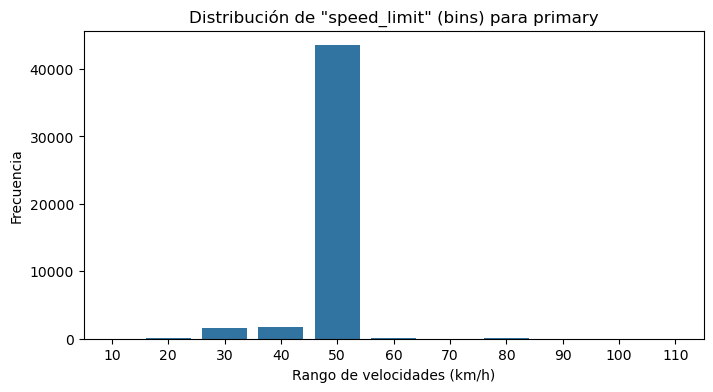

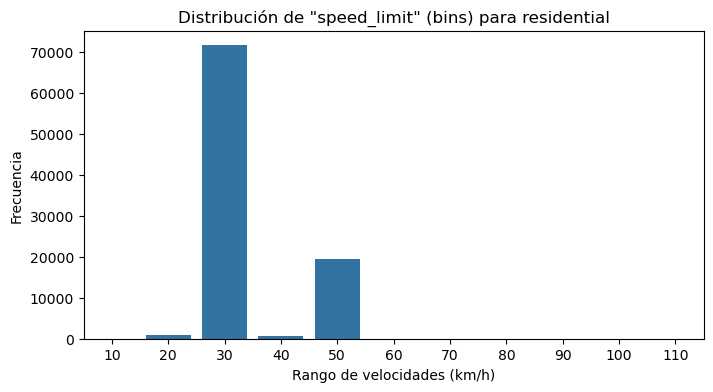

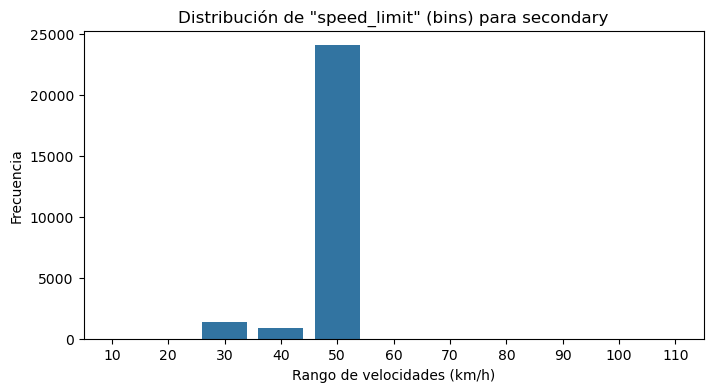

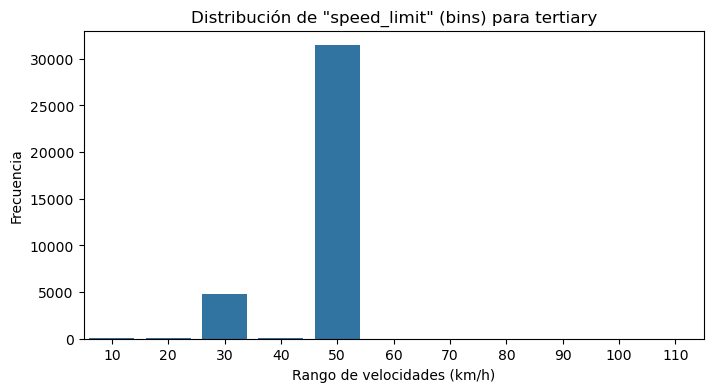

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu dataframe 'df' cargado
df = df_unido.copy()
# Filtrar los valores relevantes de la columna 'highway'
valores_highway = ['residential', 'primary', 'tertiary', 'secondary', 'motorway', 'motorway_link']
df_filtrado = df[df['highway'].isin(valores_highway)]

# Manejar valores nulos en 'speed_limit'
df_filtrado = df_filtrado[df_filtrado['speed_limit'].notna()]

# Definir los límites de los bins para los valores de 'speed_limit'
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
labels = list(range(10, 120, 10))  # Etiquetas numéricas (10, 20, ..., 110) para 11 bins

# Discretizar la columna 'speed_limit' usando los bins definidos
df_filtrado['bins_maxspeed'] = pd.cut(df_filtrado['speed_limit'], bins=bins, right=False, labels=labels)

# Graficar la distribución de los bins de 'speed_limit' por cada valor de 'highway'
for highway, group in df_filtrado.groupby('highway'):
    plt.figure(figsize=(8, 4))
    
    # Conteo de la frecuencia de los valores de 'speed_limit' por cada bin
    sns.countplot(data=group, x='bins_maxspeed')
    
    plt.title(f'Distribución de "speed_limit" (bins) para {highway}')
    plt.xlabel('Rango de velocidades (km/h)')
    plt.ylabel('Frecuencia')
    
    plt.show()

#### Columna 'lanes'

Vamos a categorizar los carriles creando reglas de categorización simples. Por ejemplo, si un carril se encuentra entre 1.6 y 2.4, que se cuente como 2 carriles. O, lo que viene a ser lo mismo, redondear a la unidad

In [44]:
print(df_unido['lanes_filled'].value_counts())
df_unido['lanes_filled'] = df_unido['lanes_filled'].round()
print(df_unido['lanes_filled'].value_counts())

lanes_filled
2.000000    78147
1.000000    59017
3.000000    47062
4.000000    27836
5.000000    10417
6.000000     6050
3.500000     3796
2.500000     3496
1.500000     3246
4.500000      944
5.500000      418
7.000000      217
8.000000       79
4.666667       63
6.500000       13
Name: count, dtype: int64
lanes_filled
2.0    84889
1.0    59017
3.0    47062
4.0    32576
5.0    10480
6.0     6481
7.0      217
8.0       79
Name: count, dtype: int64


In [45]:
print(df_unido['lanes'].value_counts())
df_unido['lanes'] = df_unido['lanes_filled'].round()
print(df_unido['lanes'].value_counts())

lanes
2.000000    64125
3.000000    34574
1.000000    34111
4.000000    28932
6.000000     6612
5.000000     6312
3.500000     3857
2.500000     3825
1.500000     2595
4.500000      964
5.500000      488
7.000000      217
8.000000       85
4.666667       63
6.500000       13
Name: count, dtype: int64
lanes
2.0    84889
1.0    59017
3.0    47062
4.0    32576
5.0    10480
6.0     6481
7.0      217
8.0       79
Name: count, dtype: int64


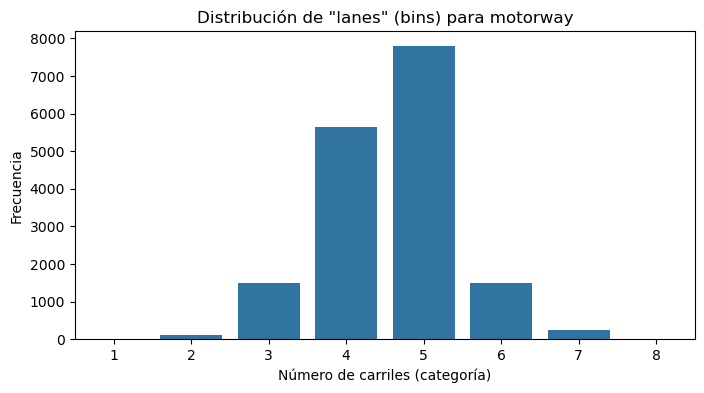

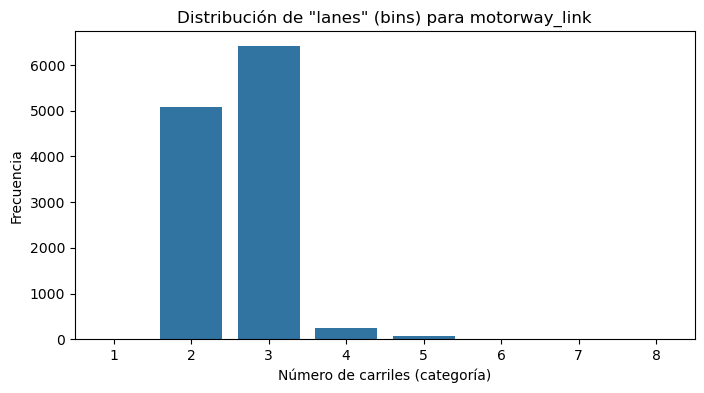

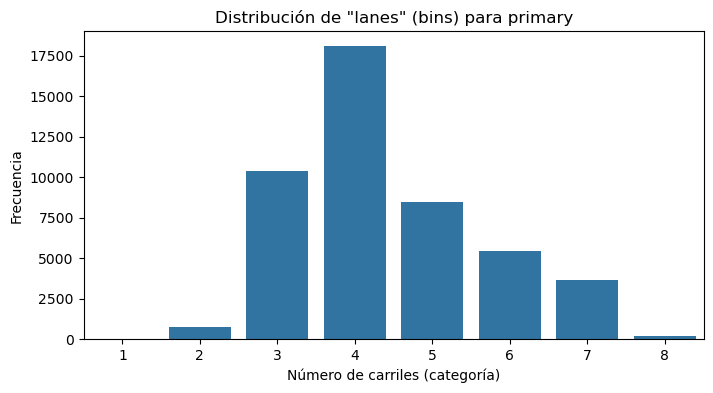

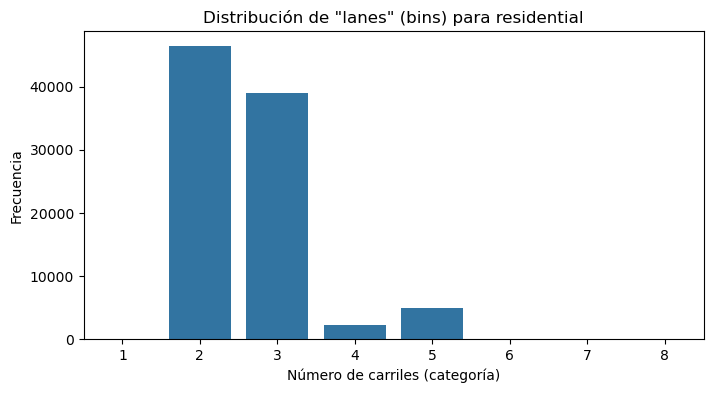

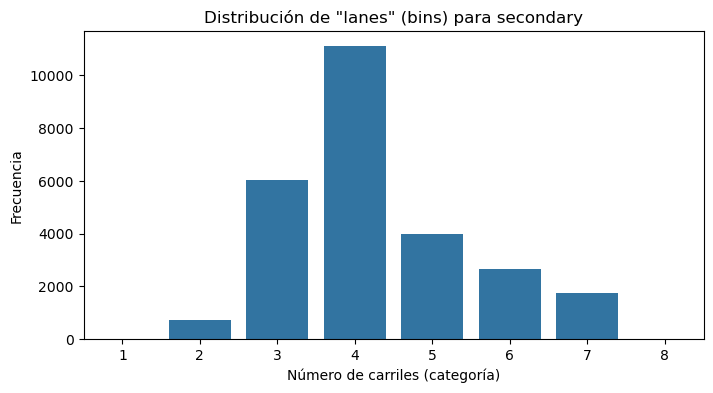

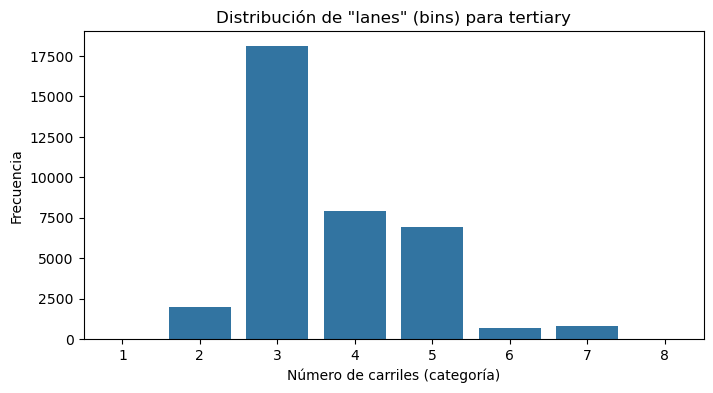

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame 'df_unido'
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Filtrar los valores relevantes de la columna 'highway'
# Filtramos el DataFrame para mantener solo los tipos de 'highway' relevantes
valores_highway = ['residential', 'primary', 'tertiary', 'secondary', 'motorway', 'motorway_link']
df_filtrado = df_unido[df_unido['highway'].isin(valores_highway)]

# Manejar valores nulos en 'lanes'
# Filtramos para mantener solo las filas donde 'lanes' no sea nulo
df_filtrado = df_filtrado[df_filtrado['lanes'].notna()]

# Definir los límites de los bins para los valores de 'lanes'
# Definimos los límites para los bins de 'lanes' y sus etiquetas
bins_lanes = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels_lanes = list(range(1, 9))  # Etiquetas numéricas (1, 2, ..., 6) para 6 bins

# Discretizar la columna 'lanes' usando los bins definidos
# Creamos una nueva columna 'bins_lanes' que categoriza 'lanes' en los bins definidos
df_filtrado['bins_lanes'] = pd.cut(df_filtrado['lanes'], bins=bins_lanes, right=False, labels=labels_lanes)

# Graficar la distribución de los bins de 'lanes' por cada valor de 'highway'
# Para cada valor de 'highway', graficamos la distribución de 'lanes' en bins
for highway, group in df_filtrado.groupby('highway'):
    plt.figure(figsize=(8, 4))
    
    # Conteo de la frecuencia de los valores de 'lanes' por cada bin
    sns.countplot(data=group, x='bins_lanes')
    
    plt.title(f'Distribución de "lanes" (bins) para {highway}')
    plt.xlabel('Número de carriles (categoría)')
    plt.ylabel('Frecuencia')
    
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame 'df_unido'
# df_unido = pd.read_csv('ruta/a/tu/archivo.csv')

# Filtrar los valores relevantes de la columna 'highway'
# Filtramos el DataFrame para mantener solo los tipos de 'highway' relevantes
valores_highway = ['residential', 'primary', 'tertiary', 'secondary', 'motorway', 'motorway_link']
df_filtrado = df_unido[df_unido['highway'].isin(valores_highway)]

# Manejar valores nulos en 'lanes'
# Filtramos para mantener solo las filas donde 'lanes' no sea nulo
df_filtrado = df_filtrado[df_filtrado['lanes_filled'].notna()]

# Definir los límites de los bins para los valores de 'lanes'
# Definimos los límites para los bins de 'lanes' y sus etiquetas
bins_lanes = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels_lanes = list(range(1, 9))  # Etiquetas numéricas (1, 2, ..., 6) para 6 bins

# Discretizar la columna 'lanes' usando los bins definidos
# Creamos una nueva columna 'bins_lanes' que categoriza 'lanes' en los bins definidos
df_filtrado['bins_lanes'] = pd.cut(df_filtrado['lanes_filled'], bins=bins_lanes, right=False, labels=labels_lanes)

# Graficar la distribución de los bins de 'lanes' por cada valor de 'highway'
# Para cada valor de 'highway', graficamos la distribución de 'lanes' en bins
for highway, group in df_filtrado.groupby('highway'):
    plt.figure(figsize=(8, 4))
    
    # Conteo de la frecuencia de los valores de 'lanes' por cada bin
    sns.countplot(data=group, x='bins_lanes')
    
    plt.title(f'Distribución de "lanes_filled" (bins) para {highway}')
    plt.xlabel('Número de carriles (categoría)')
    plt.ylabel('Frecuencia')
    
    plt.show()

In [49]:
df_unido2 = df_unido.copy()
df_unido2 = df_unido2[df_unido2['mapped_highway'] != 'unclassified']

In [51]:
df_unido2.to_csv('EDAdatos.csv')

## Categorización columnas, creación de nuevas columnas y normalización de columnas

In [8]:
df['mapped_highway'].value_counts()

mapped_highway
residential       93429
primary           47257
tertiary          36710
secondary         26410
motorway          17611
motorway_link     11902
trunk              2268
living_street      1768
primary_link       1038
unclassified        866
tertiary_link       605
secondary_link      528
busway              212
trunk_link          197
Name: count, dtype: int64

### Columnas de tiempo

La mayor problemática son las columnas de tiempo, que debemos trasladar a otro tipo de variables como categóricas y continuas.

In [19]:
import pandas as pd
df = pd.read_csv('df_precat_test.csv', low_memory= False)
df = df[df['mapped_highway'] != 'unclassified']

In [1]:
import pandas as pd
df= pd.read_csv('nodedistancebien.csv', low_memory= False)

In [21]:
df['mapped_highway'].value_counts()

mapped_highway
residential       93429
primary           47257
tertiary          36710
secondary         26410
motorway          17611
motorway_link     11902
trunk              2268
living_street      1768
primary_link       1038
unclassified        866
tertiary_link       605
secondary_link      528
busway              212
trunk_link          197
Name: count, dtype: int64

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239935 entries, 0 to 239934
Data columns (total 59 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     239935 non-null  int64  
 1   index                          239935 non-null  int64  
 2   num_expediente                 239935 non-null  object 
 3   fecha                          239935 non-null  object 
 4   hora                           239935 non-null  object 
 5   localizacion                   239935 non-null  object 
 6   numero                         239927 non-null  object 
 7   cod_distrito                   239927 non-null  float64
 8   distrito                       239927 non-null  object 
 9   tipo_accidente                 239932 non-null  object 
 10  estado_meteorológico           214052 non-null  object 
 11  tipo_vehiculo                  238827 non-null  object 
 12  tipo_persona                  

In [4]:
df = df[['fecha', 'hora', 'coordenada_x_utm', 'coordenada_y_utm', 'latitud', 'longitud', 'temperatura_media','precipitaciones(mm)','velocidad_media_aire', 'oneway', 'lanes_filled', 'mapped_highway', 'speed_limit', 'reversed', 'length', 'junction', 'tunnel', 'bridge', 'edgedistance', 'nodedistance', 'close_to_intersection']]

In [5]:
import numpy as np

df['day_of_week'] = pd.to_datetime(df['fecha']).dt.dayofweek
df['day_of_month'] = pd.to_datetime(df['fecha']).dt.day
df['month'] = pd.to_datetime(df['fecha']).dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

df['season'] = df['month'].apply(get_season)
df['hour_sin'] = np.sin(2 * np.pi * pd.to_datetime(df['hora'], format='%H:%M:%S').dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * pd.to_datetime(df['hora'], format='%H:%M:%S').dt.hour / 24)
def classify_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Madrugada'
    elif 6 <= hour < 12:
        return 'Mañana'
    elif 12 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['time_of_day'] = pd.to_datetime(df['hora'], format='%H:%M:%S').dt.hour.apply(classify_time_of_day)
df = pd.get_dummies(df, columns=['time_of_day'], prefix='time_of_day')

# Cambiar 'day_of_week' a categórico: 0-4 como 'Día de Diario' y 5-6 como 'Fin de Semana'
def categorize_day_of_week(day):
    if day in [0, 1, 2, 3, 4]:
        return 'Día de Diario'
    elif day in [5, 6]:
        return 'Fin de Semana'

df['day_category'] = df['day_of_week'].apply(categorize_day_of_week)
df['day_category_encoded'] = df['day_category'].map({'Día de Diario': 0, 'Fin de Semana': 1})

# Convertir la columna 'month' a seno y coseno para capturar la naturaleza cíclica
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)





C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_28736\3933609068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(df['fecha']).dt.dayofweek
C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_28736\3933609068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_month'] = pd.to_datetime(df['fecha']).dt.day
C:\Users\JUAMARIO\AppData\Local\Temp\ipykernel_28736\3933609068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [6]:
df = pd.get_dummies(df, columns=['season'], prefix='season')


Creamos una importante cantidad de variables referidas al tiempo, ya que es una característica muy importante (junto con datos espaciales) a tener encuenta. Destacamos la proyección de la hora a las funciones cíclicas de seno y coseno para poder usar la información cíclica inherente de las horas del día.

### Categorización tipo de vía y número de carriles

In [7]:
import pandas as pd

# Definir las categorías para cada tipo de vía
def categorize_highway(mapped_highway):
    if mapped_highway in ['residential', 'living_street']:
        return 'Calles Pequeñas'
    elif mapped_highway in ['tertiary', 'secondary', 'busway', 'tertiary_link', 'secondary_link']:
        return 'Calles Grandes'
    elif mapped_highway in ['primary', 'primary_link']:
        return 'Avenidas Principales'
    elif mapped_highway in ['motorway', 'motorway_link', 'trunk', 'trunk_link']:
        return 'Carreteras/Autopistas'
    else:
        return 'Unclassified'

# Aplicar la función para categorizar el tipo de vía
df['highway_category'] = df['mapped_highway'].apply(categorize_highway)

# Eliminar las filas con 'mapped_highway' == 'unclassified'
df = df[df['highway_category'] != 'Unclassified']

# Opcional: Convertir las categorías a variables dummy (One-Hot Encoding)
df = pd.get_dummies(df, columns=['highway_category'], prefix='highway')
df['highway_category'] = df['mapped_highway'].apply(categorize_highway)


In [8]:
def categorize_lanes(lanes):
    if lanes == 1:
        return '1'
    elif lanes == 2:
        return '2'
    else:
        return '3+'

df['lanes_category'] = df['lanes_filled'].apply(categorize_lanes)
# One-Hot Encoding
df = pd.get_dummies(df, columns=['lanes_category'], prefix='lanes')


### Categorización resto de columnas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239935 entries, 0 to 240800
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   fecha                          239935 non-null  object 
 1   hora                           239935 non-null  object 
 2   coordenada_x_utm               239935 non-null  float64
 3   coordenada_y_utm               239935 non-null  float64
 4   temperatura_media              239935 non-null  float64
 5   precipitaciones(mm)            239935 non-null  float64
 6   velocidad_media_aire           239935 non-null  float64
 7   oneway                         239935 non-null  bool   
 8   lanes_filled                   239935 non-null  float64
 9   mapped_highway                 239935 non-null  object 
 10  speed_limit                    239935 non-null  float64
 11  reversed                       239935 non-null  object 
 12  length                         2399

In [ ]:
def clasificar_vehiculos(df):
    # Lista de vehículos con 4 ruedas o más
    vehiculos_4_ruedas = [
        "Turismo", "Furgoneta", "Autobús", "Camión rígido", "Todo terreno",
        "Tractocamión", "Maquinaria de obras", "Autobús articulado", 
        "Vehículo articulado", "Autobus EMT", "Cuadriciclo ligero", 
        "Autocaravana", "Cuadriciclo no ligero", "Semiremolque", 
        "Camión de bomberos", "Remolque", "Autobús articulado EMT",
        "Maquinaria agrícola", "Microbús <= 17 plazas", "Tranvía"
    ]
    
    # Crear la nueva columna mapeando 1 o 0
    df['vehiculo_mas_4_ruedas'] = df['tipo_vehiculo'].apply(lambda x: 1 if x in vehiculos_4_ruedas else 0)
    
    return df

clasificar_vehiculos(df_unido)

In [9]:
bool_cols = ['highway_Avenidas Principales', 'highway_Calles Grandes',	'highway_Calles Pequeñas',	'highway_Carreteras/Autopistas', 'lanes_1',	'lanes_2',	'lanes_3+']
df[bool_cols] = df[bool_cols].astype(int)

In [25]:
df['highway_category'].value_counts()

highway_category
Calles Pequeñas          95197
Calles Grandes           64465
Avenidas Principales     48295
Carreteras/Autopistas    31978
Name: count, dtype: int64

In [10]:
df['oneway'] = df['oneway'].astype(int)

In [11]:
df['junction'] = df['junction'].notna().astype(int)
df['tunnel'] = df['tunnel'].notna().astype(int)
df['bridge'] = df['bridge'].notna().astype(int)

In [12]:
# Crear la columna 'close_to_intersection' basada en la distancia al nodo ('nodedistance') y el tipo de vía ('highway_category')
def calcular_close_to_intersection(row):
    if row['junction'] == 1:
        return 1
    if row['highway_category'] == 'Calles Pequeñas' and row['nodedistance'] < 7:
        return 1
    elif row['highway_category'] == 'Avenidas Principales' and row['nodedistance'] < 17:
        return 1
    elif row['highway_category'] == 'Calles Grandes' and row['nodedistance'] < 14:
        return 1
    elif row['highway_category'] == 'Carreteras/Autopistas' and row['nodedistance'] < 20:
        return 1
    elif row['nodedistance'] < 10:
        return 1
    else:
        return 0

df['close_to_intersection'] = df.apply(calcular_close_to_intersection, axis=1)


In [13]:
df['close_to_intersection'].value_counts()

close_to_intersection
0    135115
1    104820
Name: count, dtype: int64

### Normalización de columnas

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239935 entries, 0 to 239934
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   fecha                          239935 non-null  object 
 1   hora                           239935 non-null  object 
 2   coordenada_x_utm               239935 non-null  float64
 3   coordenada_y_utm               239935 non-null  float64
 4   latitud                        239935 non-null  float64
 5   longitud                       239935 non-null  float64
 6   temperatura_media              239935 non-null  float64
 7   precipitaciones(mm)            239935 non-null  float64
 8   velocidad_media_aire           239935 non-null  float64
 9   oneway                         239935 non-null  int32  
 10  lanes_filled                   239935 non-null  float64
 11  mapped_highway                 239935 non-null  object 
 12  speed_limit                   

Hay que normalizar las siguientes columnas: ['coordenada_x_utm', 'coordenada_y_utm', 'temperatura_media', 'precipitaciones(mm)', 'velocidad_media_aire', 'length']

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['coordenada_x_utm_norm', 'coordenada_y_utm_norm', 'temperatura_media_norm', 'precipitaciones(mm)_norm', 'velocidad_media_aire_norm', 'length_norm', 'speed_limit_norm']] = scaler.fit_transform(df[['coordenada_x_utm', 'coordenada_y_utm', 'temperatura_media', 'precipitaciones(mm)', 'velocidad_media_aire', 'length', 'speed_limit']])


Por último guardamos el dataset final.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239935 entries, 0 to 239934
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   fecha                          239935 non-null  object 
 1   hora                           239935 non-null  object 
 2   coordenada_x_utm               239935 non-null  float64
 3   coordenada_y_utm               239935 non-null  float64
 4   latitud                        239935 non-null  float64
 5   longitud                       239935 non-null  float64
 6   temperatura_media              239935 non-null  float64
 7   precipitaciones(mm)            239935 non-null  float64
 8   velocidad_media_aire           239935 non-null  float64
 9   oneway                         239935 non-null  int32  
 10  lanes_filled                   239935 non-null  float64
 11  mapped_highway                 239935 non-null  object 
 12  speed_limit                   

In [17]:
df.columns

Index(['fecha', 'hora', 'coordenada_x_utm', 'coordenada_y_utm',
       'temperatura_media', 'precipitaciones(mm)', 'velocidad_media_aire',
       'oneway', 'lanes_filled', 'mapped_highway', 'speed_limit', 'reversed',
       'length', 'junction', 'tunnel', 'bridge', 'edgedistance',
       'nodedistance', 'day_of_week', 'day_of_month', 'hour_sin', 'hour_cos',
       'time_of_day_Madrugada', 'time_of_day_Mañana', 'time_of_day_Noche',
       'time_of_day_Tarde', 'time_of_day_Madrugada', 'time_of_day_Mañana',
       'time_of_day_Noche', 'time_of_day_Tarde', 'day_category',
       'day_category_encoded', 'month_sin', 'month_cos', 'season_fall',
       'season_spring', 'season_summer', 'season_winter',
       'highway_Avenidas Principales', 'highway_Calles Grandes',
       'highway_Calles Pequeñas', 'highway_Carreteras/Autopistas',
       'highway_category', 'lanes_1', 'lanes_2', 'lanes_3+',
       'close_to_intersection'],
      dtype='object')

In [17]:
df.to_csv('df_pre_clustering(colcompletabien).csv', index = False)